# Data Analytics Competition Find IT UGM - H1N1 and Seasonal Vaccine

## Tim ODE : 
- Gerend Christopher 
- Felix Fernando 
- Jeremy

## Permasalahan : 

Swine flu, often known as swine flu, is caused by a type of flu virus (influenza) known as H1N1. This is an influenza A virus, and H1N1 is one of numerous flu viruses that can cause seasonal flu. The symptoms of H1N1 flu are similar to those of seasonal flu. In the spring of 2009, scientists identified a strain of the H1N1 flu virus. This virus is a mash-up of viruses that cause disease in people from pigs, birds, and humans. H1N1 caused a respiratory tract infection in humans known as swine flu during the 2009–2010 flu season. Because so many individuals have become ill, the World Health Organization (WHO) proclaimed the H1N1 virus a pandemic in 2009. WHO declared the outbreak over in August 2010. Following the end of the pandemic, the H1N1 flu virus became one of the strains that cause seasonal flu.


Fortunately, flu vaccines are now available that can help protect against H1N1 flu (swine flu). Seasonal flu vaccines, including those produced in 2020 and 2021, include the H1N1 flu virus strain. The COVID-19 pandemic struck the world in 2019. Following the findings of several studies on H1N1 and SARS, experts concluded that COVID-19 is likewise categorized as a seasonal flu disease. The sickness is also delaying attempts to produce a vaccine to combat seasonal flu.


## Goal:
Your goal is to anticipate how likely people are to get H1N1 and their yearly flu vaccine. You would specifically forecast two probabilities: one for vaccine_h1n1 and one for vaccine_seasonal. Each row in the data set represents one individual from the 2009 National H1N1 Flu Survey (NHFS) by CDC.


## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from IPython.display import display

# Model Library
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import optuna

from catboost import CatBoostClassifier, Pool, cv

import lightgbm as lgb

import xgboost as xgb

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from category_encoders import OrdinalEncoder as oe

# custom plot seaborn
plt.rcParams["figure.figsize"] = (8,6)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='tab10')

np.random.seed(10)
%matplotlib inline

/opt/anaconda3/envs/ds/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Data Preparation + Cleansing

### Features

`h1n1_concern` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

`h1n1_knowledge` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

`behavioral_antiviral_meds` - Has taken antiviral medications. (binary)

`behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)

`behavioral_face_mask` - Has bought a face mask. (binary)

`behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)

`behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)

`behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)

`behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)

`doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)

`doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)

`chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

`child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)

`health_worker` - Is a healthcare worker. (binary)

`health_insurance` - Has health insurance. (binary)

`opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

`opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

`opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

`opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

`opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

`opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

`age_group` - Age group of respondent.

`education` - Self-reported education level.

`race` - Race of respondent.

`sex` - Sex of respondent.

`income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.

`marital_status` - Marital status of respondent.

`rent_or_own` - Housing situation of respondent.

`employment_status` - Employment status of respondent.

`hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

`census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

`household_adults` - Number of other adults in household, top-coded to 3.

`household_children` - Number of children in household, top-coded to 3.

`employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.

`employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

### Target variables :
`h1n1_vaccine` - Whether respondent received H1N1 flu vaccine.

`seasonal_vaccine` - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes.

### Loading Data

In [5]:
df_features = pd.read_csv('data/training_set_features.csv', index_col="respondent_id") # Membaca  feature data train
df_labels = pd.read_csv('data/training_set_labels.csv', index_col="respondent_id") # Membaca label data train 

df_test_features = pd.read_csv('data/test_set_features.csv', index_col="respondent_id") # membaca feature data test

In [6]:
df_labels.columns # Mengambil data kolom dari df_labels

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [7]:
df_features.columns # Mengambil data kolom dari df_features

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [8]:
df_test_features.columns # Mengambil data kolom dari df_test_features

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

### Handling null data (method 1)

In [8]:
df_features.isna().sum() # Memeriksa kolom dengan data null pada df_features

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Features with null data: 

`h1n1_concern`                      92 - (0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.)

`h1n1_knowledge`                   116 - (0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.)

`behavioral_antiviral_meds`         71 - (binary)

`behavioral_avoidance`             208 - (binary)

`behavioral_face_mask`              19 - (binary)

`behavioral_wash_hands`             42 - (binary)

`behavioral_large_gatherings`       87 - (binary)

`behavioral_outside_home`           82 - (binary)

`behavioral_touch_face`            128 - (binary)

`doctor_recc_h1n1`                2160 - (binary)

`doctor_recc_seasonal`            2160 - (binary)

`chronic_med_condition`            971 - (binary)

`child_under_6_months`             820 - (binary)

`health_worker`                    804 - (binary)

`health_insurance`               12274 - (binary)

`opinion_h1n1_vacc_effective`      391 - (1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.)

`opinion_h1n1_risk`                388 - (1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.)

`opinion_h1n1_sick_from_vacc`      395 - (1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.)

`opinion_seas_vacc_effective`      462 - (1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.)

`opinion_seas_risk`                514 - (1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.)

`opinion_seas_sick_from_vacc`      537 - (1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.)

`education`                       1407 - ('< 12 Years', '12 Years', 'College Graduate', 'Some College')

`income_poverty`                  4423 - ('Below Poverty', '<= $75,000, Above Poverty', '> $75,000')

`marital_status`                  1408 - ('Not Married', 'Married')

`rent_or_own`                     2042 - ('own', 'rent')

`employment_status`               1463 - ('Not in Labor Force', 'Employed', 'Unemployed')

`household_adults`                 249 - (0, 1, 2, 3)

`household_children`               249 - (0, 1, 2, 3)

`employment_industry`            13330 - ('pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh','ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf','arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax','dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo', 'qnlwzans')

`employment_occupation`          13470 - ('xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp', 'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi', 'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss', 'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew', 'uqqtjvyb', 'pvmttkik', 'dcjcmpih')

In [9]:
df_test_features.isna().sum() # Memeriksa kolom dengan data null pada df_test_features

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

In [10]:
df_labels.isna().sum() # Memeriksa kolom dengan data null pada df_labels

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

`df_labels` tidak mengandung data null, maka proses cleaning hanya akan dilakukan pada `df_features`

In [11]:
df_features["employment_occupation"].unique() # Mengambil semua nilai unik pada kolom "employment_occupation"

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

#### Education columns

Dengan asumsi bahwa "education" dipengaruhi oleh "sex" dan "age_group", kolom "education" akan diisi dengan menggunakan model Random Forest Classifier dengan prediktor berupa kolom "sex" dan "age_group"

##### Train Data

In [207]:
age_group = pd.get_dummies(df_features["age_group"], prefix="age") # melakukan one-hot encoding pada kolom age_group, karena kolom tersebut memiliki jenis kategorikal
sex = pd.get_dummies(df_features["sex"], prefix="sex") # melakukan one-hot encoding pada kolom age, karena kolom tersebut memiliki jenis kategorikal

# Persiapan data training model RF
education = pd.concat([age_group, sex, df_features[["education"]]], axis=1) # menggabungkan kedua kolom sex dan age_group
education_train = education.dropna() # menghilangkan semua data null yang ada pada data
education_predict = education[education.isnull().any(axis=1)] # melakukan prediksi pada data dengan education yang null 

education_train_X = education_train[[*age_group.columns, *sex.columns]] # prediktor train
education_train_y = education_train[["education"]] # respons train

education_predict_X = education_predict[[*age_group.columns, *sex.columns]] # variable prediktor yang akan dilakukan prediksi 

# inisiasi model dan fitting
random_forest_model = RandomForestClassifier()
random_forest_model.fit(education_train_X, education_train_y)

# proses prediksi dengan RF
education_predict["education"] = random_forest_model.predict(education_predict_X)

# Mengisi setiap kolom "education" kosong dengan hasil prediksi
df_features = df_features.fillna(education_predict[["education"]])

##### Test Data

Proses yang sama seperti diatas dilakukan juga pada data test

In [208]:
age_group = pd.get_dummies(df_test_features["age_group"], prefix="age")
sex = pd.get_dummies(df_test_features["sex"], prefix="sex")

education = pd.concat([age_group, sex, df_test_features[["education"]]], axis=1)
education_train = education.dropna()
education_predict = education[education.isnull().any(axis=1)]

education_train_X = education_train[[*age_group.columns, *sex.columns]]
education_train_y = education_train[["education"]]

education_predict_X = education_predict[[*age_group.columns, *sex.columns]]

random_forest_model = RandomForest(education_train_X, education_train_y, education_predict_X, depth=4)
random_forest_model.fit()

education_predict["education"] = random_forest_model.predict()

df_test_features = df_test_features.fillna(education_predict[["education"]])

#### Employment Occupation and Industry Columns

In [209]:
# pengecekan data dengan kolom "employment_status" bernilai "Unemployed" atau "Not in Labor Force"
df_features[["employment_occupation", "employment_industry", "employment_status"]].loc[(df_features["employment_status"] == "Unemployed") | (df_features["employment_status"] == "Not in Labor Force")].count()

employment_occupation        0
employment_industry          0
employment_status        11684
dtype: int64

NaN terjadi karena responden memiliki "employment_status" dengan nilai "Unemployed" atau "Not in Labor" dengan itu, maka nilai NaN dapat diisi dengan suatu nilai spesifik seperti "xxxxx"

In [210]:
# mengisi kolom "employment_occupation" dan "employment_industry" dengan "xxxxx" pada data test dan train
df_features[["employment_occupation", "employment_industry"]] = df_features[["employment_occupation", "employment_industry"]].fillna("xxxxx") 
df_test_features[["employment_occupation", "employment_industry"]] = df_test_features[["employment_occupation", "employment_industry"]].fillna("xxxxx")

#### Employment Status Columns

In [211]:
# pengecekan data dengan kolom "employment_status" bernilai NaN dan kolom "employment_industry" tidak bernilai "xxxxx" atau "employment_occupation" tidak bernilai "xxxxx"  
df_features[["employment_occupation", "employment_industry", "employment_status"]] .loc[(df_features["employment_status"].isna()) & ((df_features["employment_industry"]  != "xxxxx") | df_features["employment_occupation"] != "xxxxx")].count()

employment_occupation    1463
employment_industry      1463
employment_status           0
dtype: int64

Dengan data diatas, kolom "employment_status" dengan data bernilai NaN akan diisi dengan "Unemployed'

In [212]:
df_features[["employment_status"]] = df_features[["employment_status"]].fillna("Unemployed")
df_test_features[["employment_status"]] = df_features[["employment_status"]].fillna("Unemployed")

#### Other Columns

Untuk features lainnya akan diisikan dengan nilai modus dari masing0masing kolom

In [213]:
# mengisi data NaN dengan modusnya
df_features.fillna(df_features.mode().iloc[0], inplace=True) 
df_test_features.fillna(df_test_features.mode().iloc[0], inplace=True)

<AxesSubplot:>

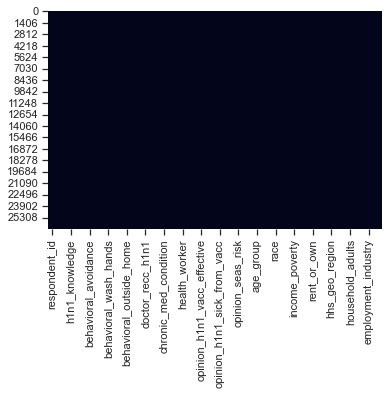

In [214]:
# visuaslisasi data null pada df_features
sns.heatmap(df_features.isnull(), cbar=False)

<AxesSubplot:>

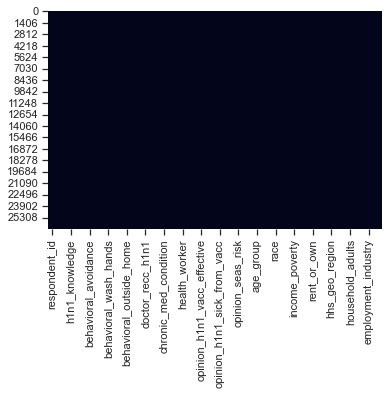

In [215]:
# visuaslisasi data null pada df_test_features
sns.heatmap(df_test_features.isnull(), cbar=False)

### Handling null data (method 2)

Berikut adalah metode data cleaning kedua yang dilakukan

In [8]:
numerical_cols = df_features.select_dtypes('number').columns # mengkategorisasikan kolom numerik

categorical_cols = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'] # mengkategorisasikan kolom kategorikal

ordinal_cols = ['age_group', 'education',  'income_poverty', 
        'employment_status'] # mengkategorisasikan kolom ordinal

Train Data

In [9]:
# setiap data pada kolom berjenis kategorikal dan ordinal akan diisikan dengan nilai "None" yang menandakan bahwa datanya tidak ada
for col in (categorical_cols + ordinal_cols):
    df_features[col] = df_features[col].fillna(value='None')

# setiap data pada kolom berjenis numerik akan diisikan dengan nilai "-1" yang menandakan bahwa datanya tidak ada
for col in numerical_cols:
    df_features[col] = df_features[col].fillna(value=-1)

Test Data

In [10]:
# setiap data pada kolom berjenis kategorikal dan ordinal akan diisikan dengan nilai "None" yang menandakan bahwa datanya tidak ada
for col in (categorical_cols + ordinal_cols):
    df_test_features[col] = df_test_features[col].fillna(value='None')

# setiap data pada kolom berjenis numerik akan diisikan dengan nilai "-1" yang menandakan bahwa datanya tidak ada
for col in numerical_cols:
    df_test_features[col] = df_test_features[col].fillna(value=-1)

### Handling null data (method 3)

Berikut adalah metode ketiga yang dilakukan, yang sebenarnya merupakan gabungan dari metode 1 dan 2

In [9]:
# mengisi kolom "employment_occupation" dan "employment_industry" dengan "xxxxx" pada data test dan train
df_features[["employment_occupation", "employment_industry"]] = df_features[["employment_occupation", "employment_industry"]].fillna("xxxxx")
df_test_features[["employment_occupation", "employment_industry"]] = df_test_features[["employment_occupation", "employment_industry"]].fillna("xxxxx")

# mengisi kolom "employment_status" kosong dengan "Unemployed" pada data test dan train
df_features[["employment_status"]] = df_features[["employment_status"]].fillna("Unemployed")
df_test_features[["employment_status"]] = df_features[["employment_status"]].fillna("Unemployed")

In [10]:
numerical_cols = df_features.select_dtypes('number').columns # mengkategorisasikan kolom numerik

categorical_cols = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'] # mengkategorisasikan kolom kategorikal

ordinal_cols = ['age_group', 'education',  'income_poverty', 
        'employment_status'] # mengkategorisasikan kolom ordinal

Train Data

In [11]:
# setiap data pada kolom berjenis kategorikal dan ordinal akan diisikan dengan nilai "None" yang menandakan bahwa datanya tidak ada
for col in (categorical_cols + ordinal_cols):
    df_features[col] = df_features[col].fillna(value='None')

# setiap data pada kolom berjenis numerik akan diisikan dengan nilai "-1" yang menandakan bahwa datanya tidak ada
for col in numerical_cols:
    df_features[col] = df_features[col].fillna(value=-1)

Test Data

In [12]:
# setiap data pada kolom berjenis kategorikal dan ordinal akan diisikan dengan nilai "None" yang menandakan bahwa datanya tidak ada
for col in (categorical_cols + ordinal_cols):
    df_test_features[col] = df_test_features[col].fillna(value='None')

# setiap data pada kolom berjenis numerik akan diisikan dengan nilai "-1" yang menandakan bahwa datanya tidak ada
for col in numerical_cols:
    df_test_features[col] = df_test_features[col].fillna(value=-1)

## Exploratory Data Analysis (EDA)

In [13]:
# Menggabungkan dataframe feature dengan labels berdasarkan kolom respondent_id
df = pd.merge(df_features, df_labels, on='respondent_id')

In [14]:
# Menampilkan cuplikan data dari dataframe yang telah digabungkan
df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                          -1.0  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
0                             0.0                xxxxx                  xxxxx   
1                             0.0             pxcmvdjn               xgwztkwe   
2                             0.0             rucpziij               xtkaffoo   
3                             0.0                xxxxx                  xxxxx   
4                             0.0             wxleyezf               emcorrxb   

               h1n1_vaccine  seasonal_vaccine  
respondent_id                                  
0                         0                 0  
1                         0                 1  
2                         0                 0  
3                         0                 1  
4                         0                 0  

[5 rows x 37 columns]

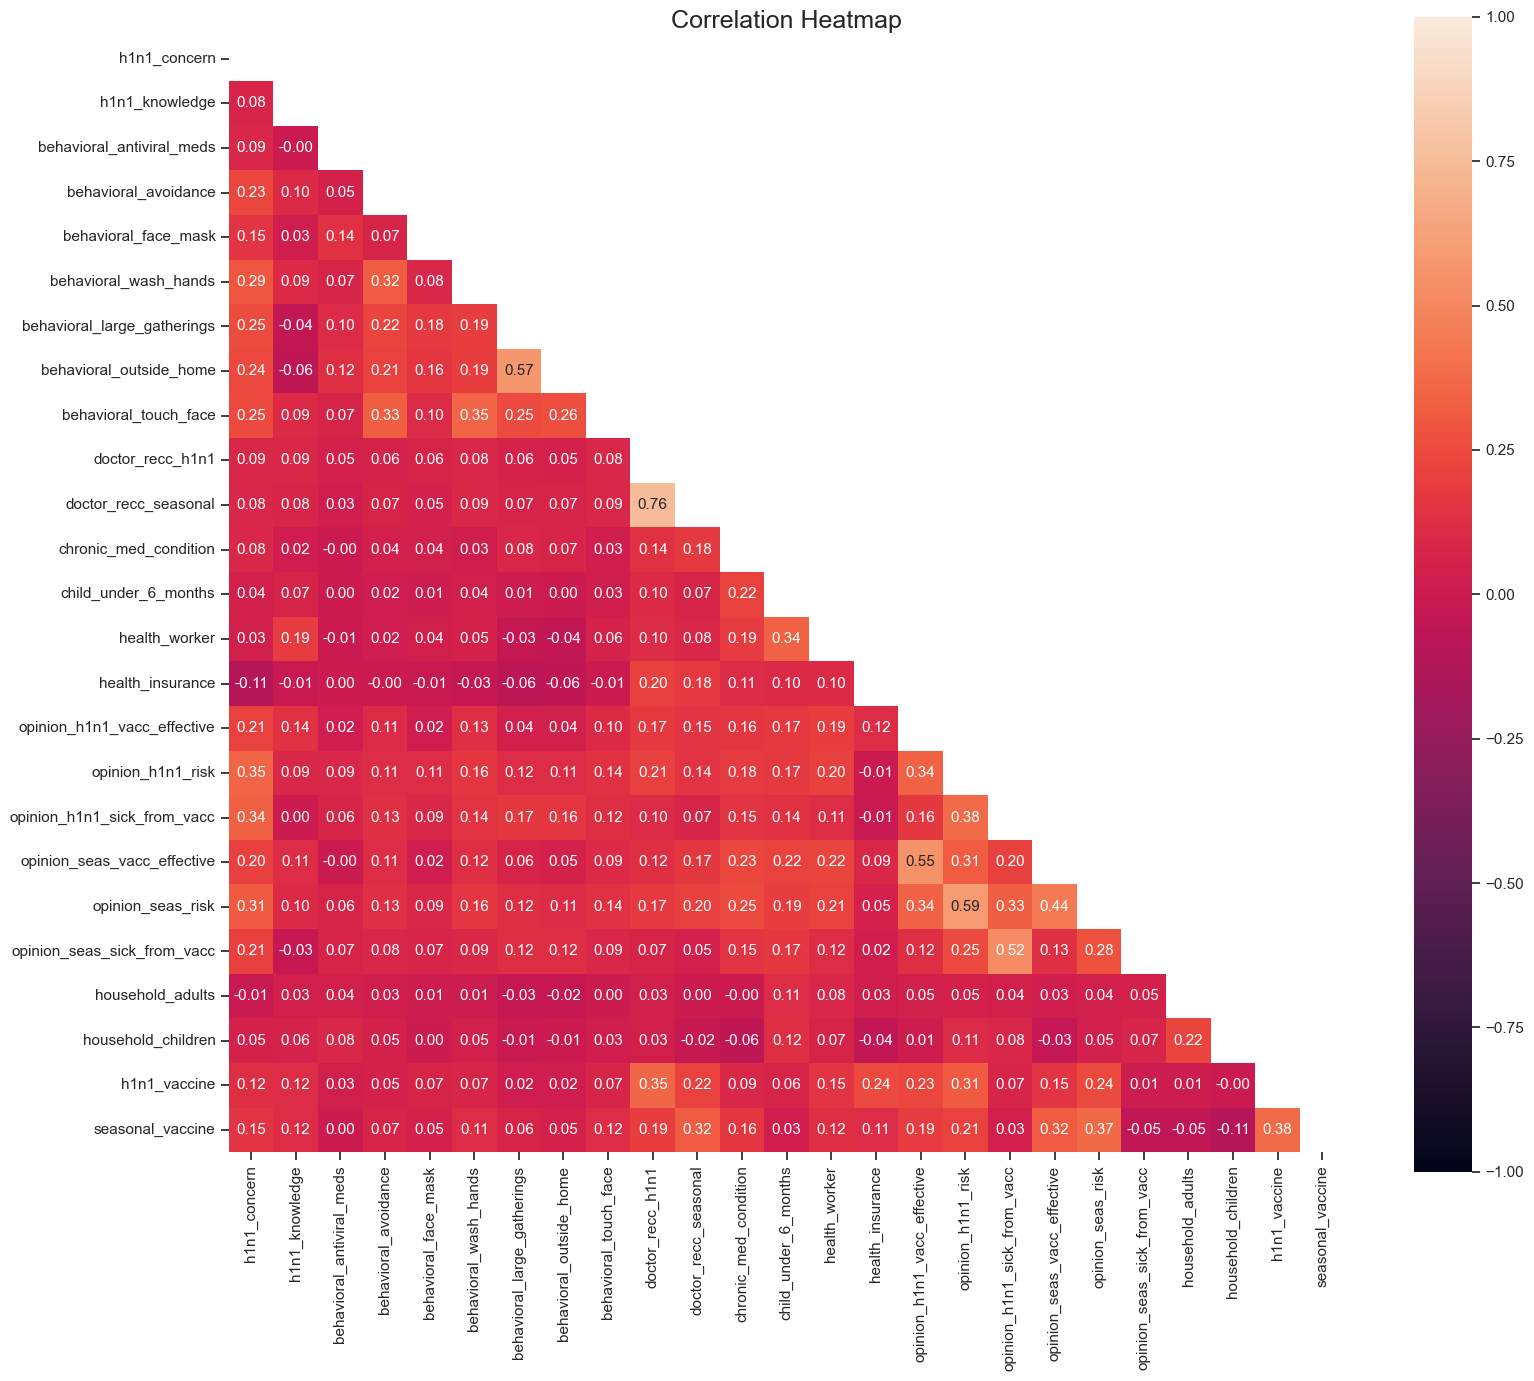

In [15]:
# Menampilkan matriks korelasi antar kolom

plt.figure(figsize=(18,15))

mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, mask=mask, 
            fmt='.2f', annot_kws={'size':11})
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

`doctor_recc_h1n1` has a high positive linear correlation with `doctor_recc_seasonal`

Target Response Distribution

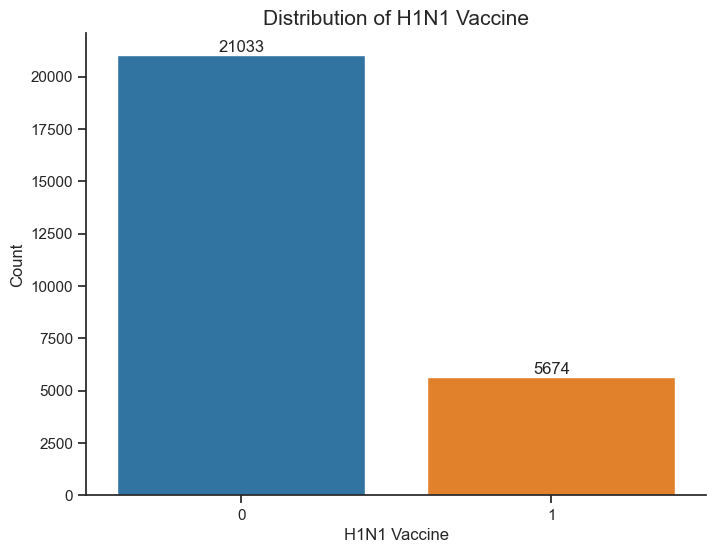

In [19]:
# Column plot of H1N1 Vaccine

ax = sns.countplot(data=df, x="h1n1_vaccine", edgecolor='1')
ax.set_title("Distribution of H1N1 Vaccine", fontsize=15)
ax.set_xlabel('H1N1 Vaccine')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

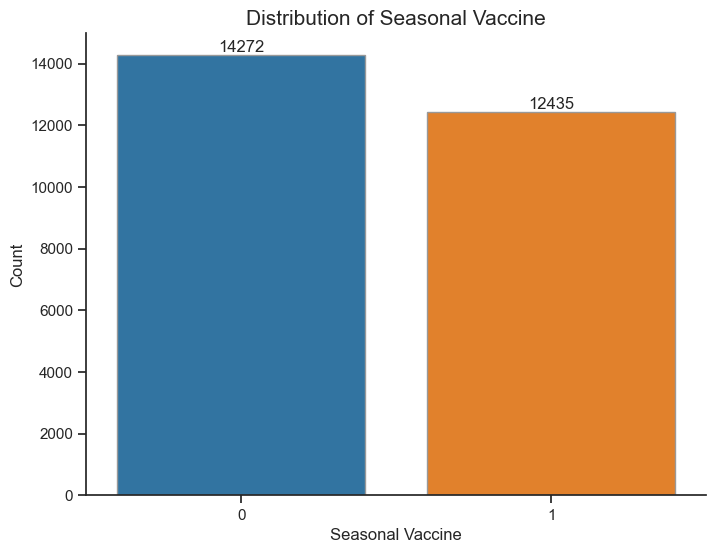

In [20]:
# Column plot of Seasonal Vaccine

ax = sns.countplot(data=df, x="seasonal_vaccine", edgecolor=".6")
ax.set_title("Distribution of Seasonal Vaccine", fontsize=15)
ax.set_xlabel('Seasonal Vaccine')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

The distribution of target variable `h1n1_vaccine` is not balanced meanwhile `seasonal_vaccine` is balanced

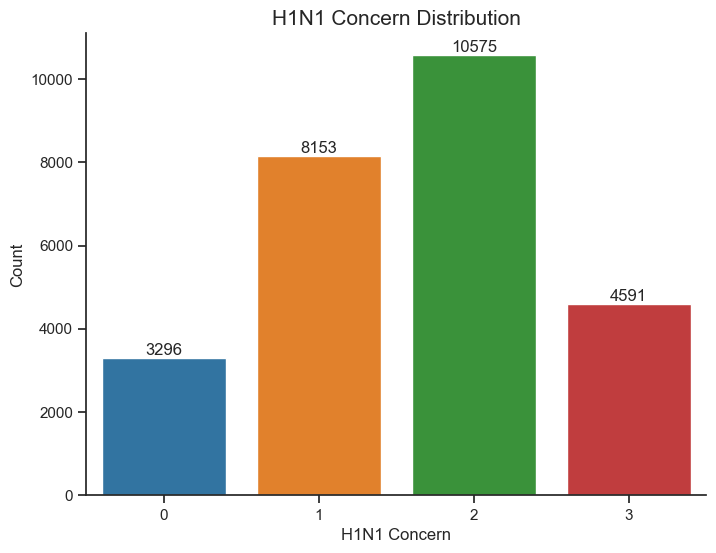

In [21]:
# H1N1 concern distribution

plt.figure()

ax = sns.countplot(data=df[df['h1n1_concern'] > -1], x='h1n1_concern')
ax.set_title("H1N1 Concern Distribution", fontsize=15)
ax.set_xlabel('H1N1 Concern')
ax.set_xticklabels([0,1,2,3])
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

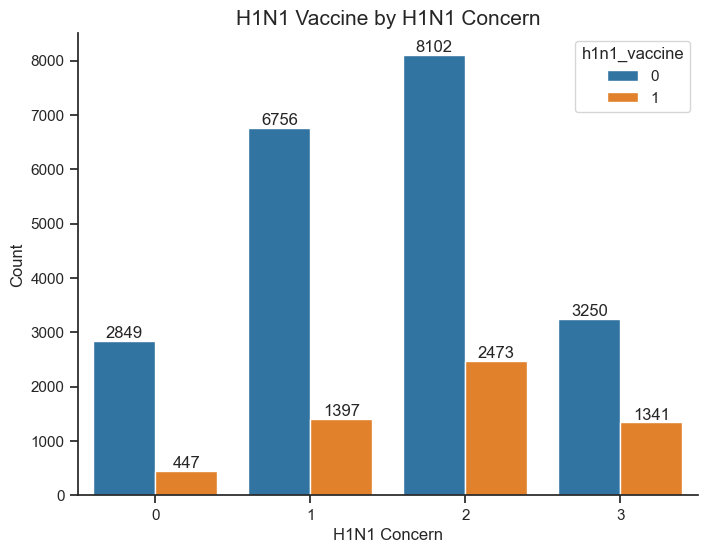

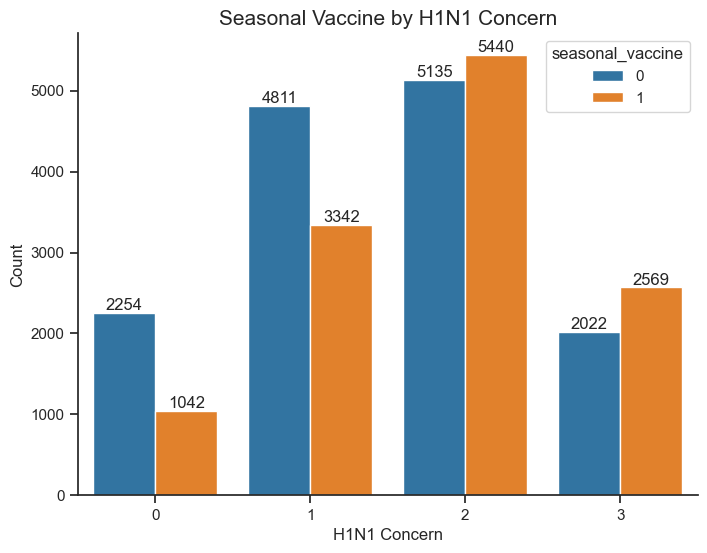

In [23]:
# Column Plot of Target Response by H1N1 Concern

plt.figure()
ax1 = sns.countplot(data=df[df['h1n1_concern'] > -1], x="h1n1_concern", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by H1N1 Concern", fontsize=15)
ax1.set_xlabel('H1N1 Concern')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1,2,3])
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df[df['h1n1_concern'] > -1], x="h1n1_concern", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by H1N1 Concern", fontsize=15)
ax2.set_xlabel('H1N1 Concern')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1,2,3])
for container in ax2.containers:
    ax2.bar_label(container)

plt.show()

Dapat dilihat bahwa orang dengan `h1n1_concern` yang tinggi cenderung mendapatkan `seasonal_vaccine` sehingga variabel ini dijadikan calon prediktor untuk `seasonal_vaccine`. Sementara itu, tidak terlihat pengaruh antara `h1n1_concern` dengan `h1n1_vaccine`

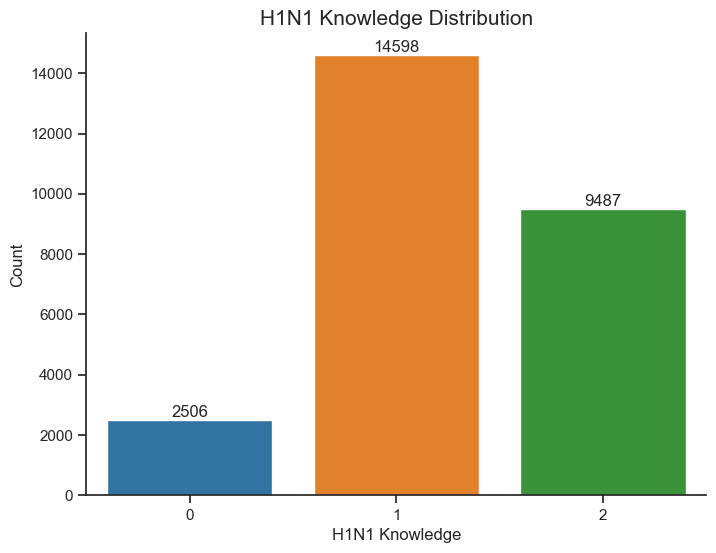

In [25]:
# H1N1 knowledge distribution

plt.figure()

ax = sns.countplot(data=df[df['h1n1_knowledge'] > -1], x='h1n1_knowledge')
ax.set_title("H1N1 Knowledge Distribution", fontsize=15)
ax.set_xlabel('H1N1 Knowledge')
ax.set_xticklabels([0,1,2])
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

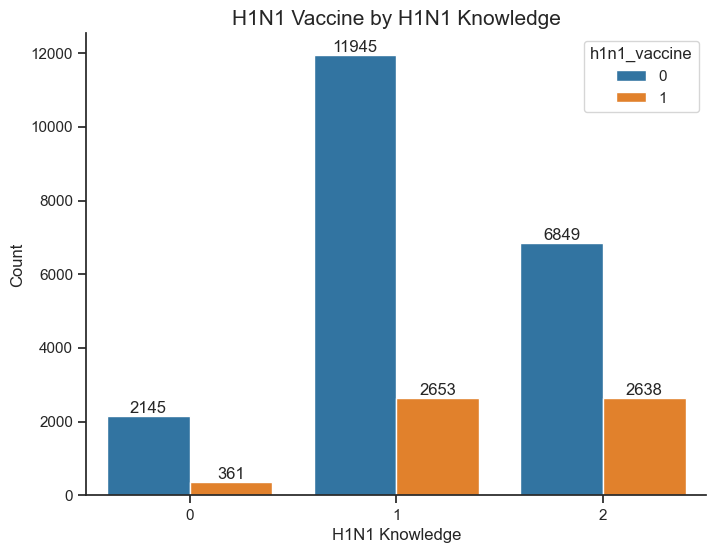

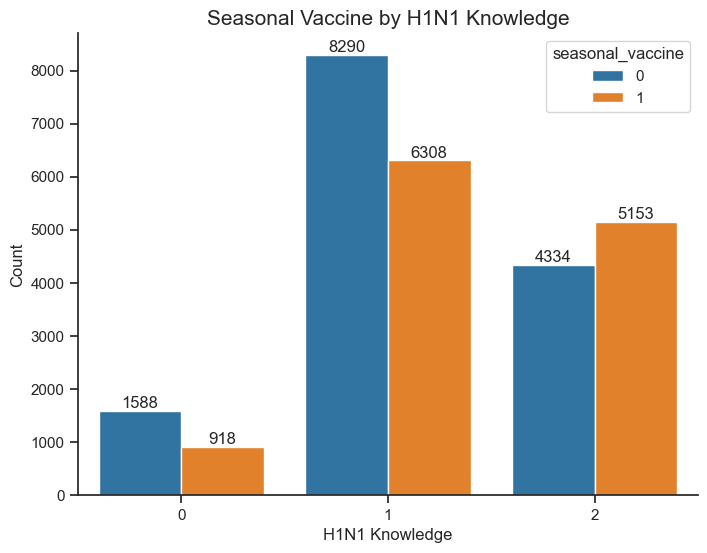

In [24]:
# Column Plot of Target Response by H1N1 Knowledge

plt.figure()
ax1 = sns.countplot(data=df[df['h1n1_knowledge'] > -1], x="h1n1_knowledge", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by H1N1 Knowledge", fontsize=15)
ax1.set_xlabel('H1N1 Knowledge')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1,2])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['h1n1_knowledge'] > -1], x="h1n1_knowledge", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by H1N1 Knowledge", fontsize=15)
ax2.set_xlabel('H1N1 Knowledge')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1,2])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `h1n1_knowledge` cukup memengaruhi `seasonal_vaccine` sehingga layak untuk dijadikan calon prediktor. Sementara itu, `h1n1_knowledge` tidak memengaruhi `h1n1_vaccine`

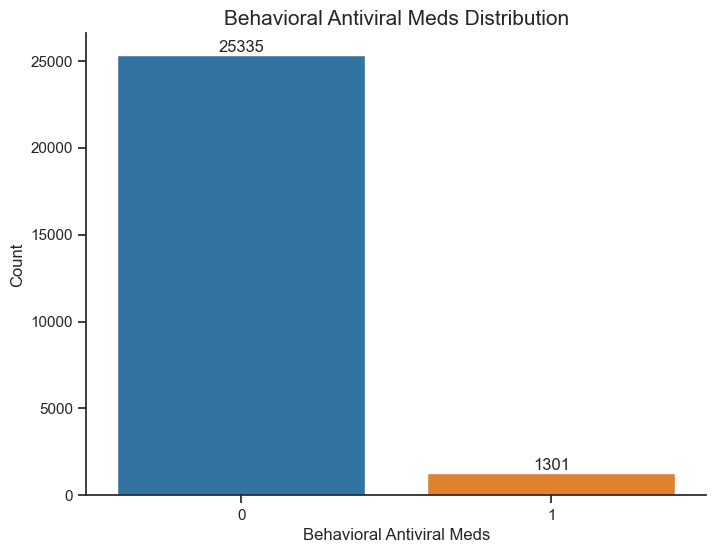

In [26]:
# behavioral antiviral meds distribution

plt.figure()

ax = sns.countplot(data=df[df['behavioral_antiviral_meds'] > -1], x="behavioral_antiviral_meds")
ax.set_title("Behavioral Antiviral Meds Distribution", fontsize=15)
ax.set_xlabel('Behavioral Antiviral Meds')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

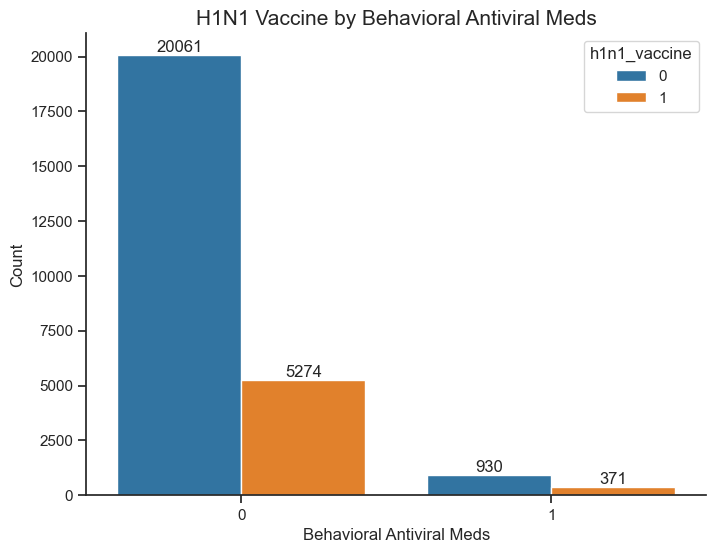

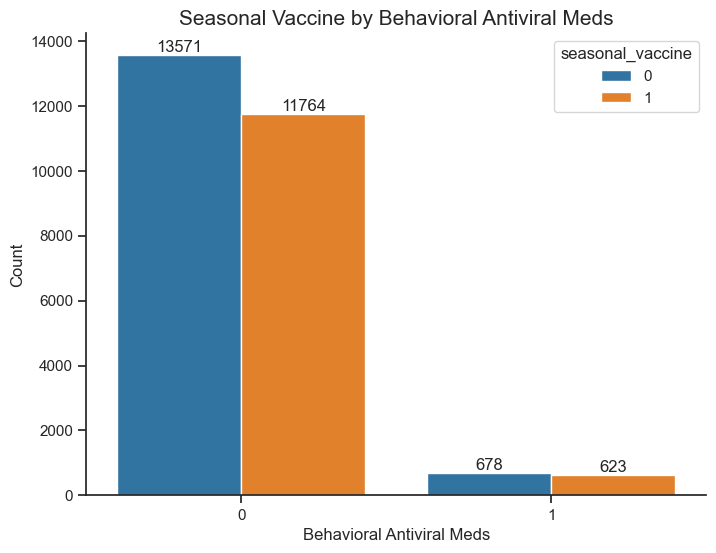

In [28]:
# Column Plot of Target Response by Behavioral Antiviral Meds

plt.figure()
ax1 = sns.countplot(data=df[df['behavioral_antiviral_meds'] > -1], x="behavioral_antiviral_meds", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Behavioral Antiviral Meds", fontsize=15)
ax1.set_xlabel('Behavioral Antiviral Meds')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['behavioral_antiviral_meds'] > -1], x="behavioral_antiviral_meds", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Behavioral Antiviral Meds", fontsize=15)
ax2.set_xlabel('Behavioral Antiviral Meds')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `behavioral_antiviral_meds` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

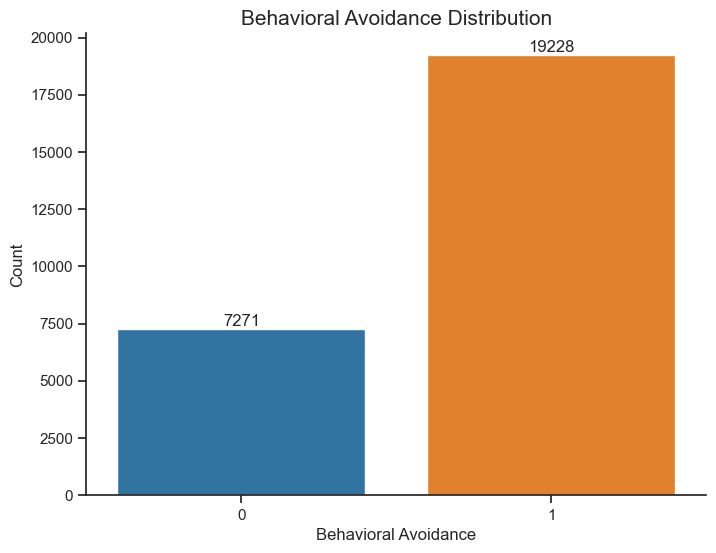

In [27]:
# behavioral avoidance distribution

plt.figure()

ax = sns.countplot(data=df[df['behavioral_avoidance'] > -1], x="behavioral_avoidance")
ax.set_title("Behavioral Avoidance Distribution", fontsize=15)
ax.set_xlabel('Behavioral Avoidance')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

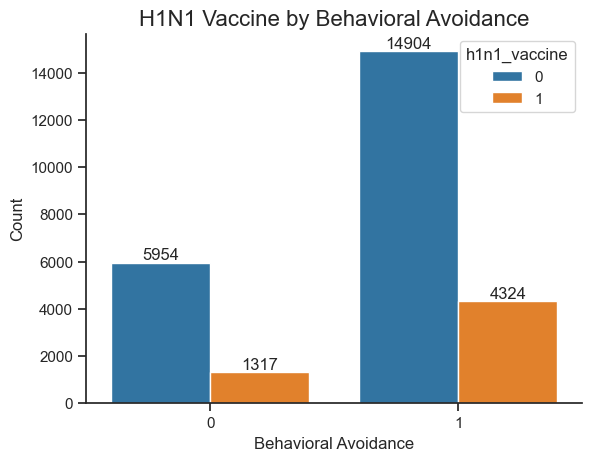

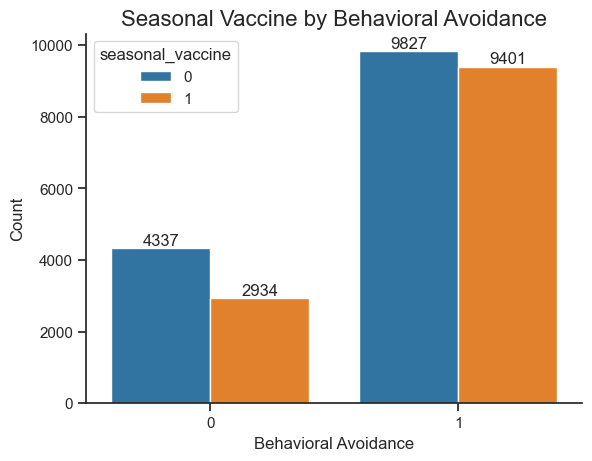

In [64]:
# Column Plot of Target Response by Behavioral Avoidance
plt.figure()
ax1 = sns.countplot(data=df[df['behavioral_avoidance'] > -1], x="behavioral_avoidance", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Behavioral Avoidance", fontsize=16)
ax1.set_xlabel('Behavioral Avoidance')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['behavioral_avoidance'] > -1], x="behavioral_avoidance", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Behavioral Avoidance", fontsize=16)
ax2.set_xlabel('Behavioral Avoidance')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `behavioral_avoidance` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

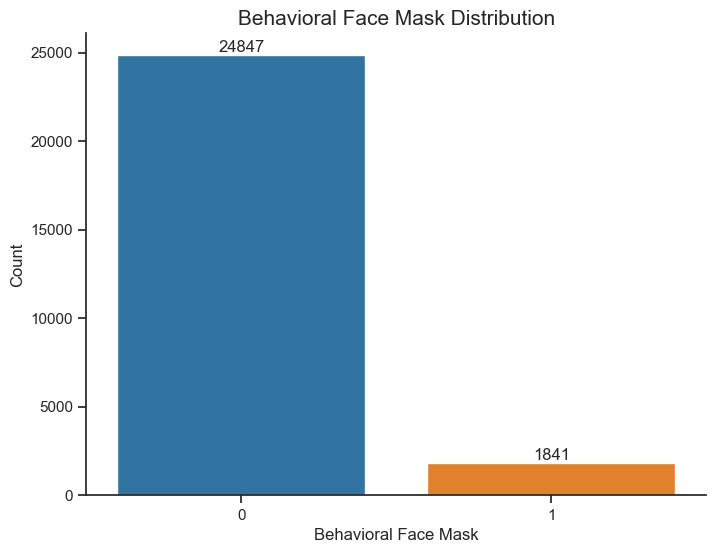

In [29]:
# behavioral face mask distribution

plt.figure()

ax = sns.countplot(data=df[df['behavioral_face_mask'] > -1], x="behavioral_face_mask")
ax.set_title("Behavioral Face Mask Distribution", fontsize=15)
ax.set_xlabel('Behavioral Face Mask')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

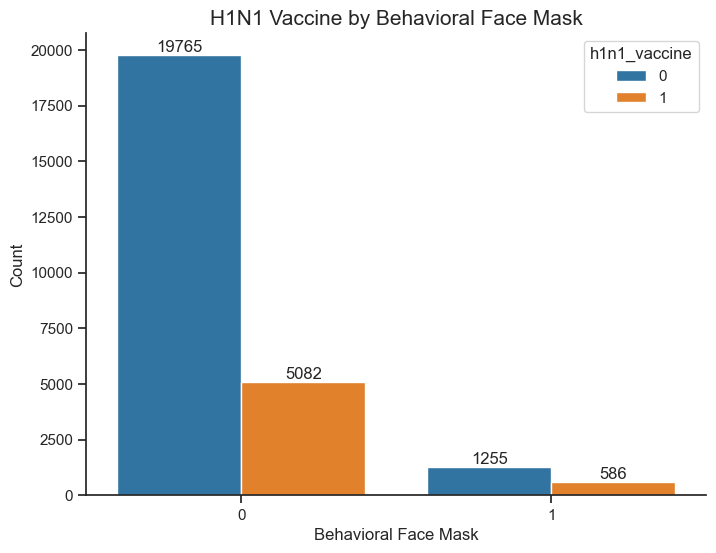

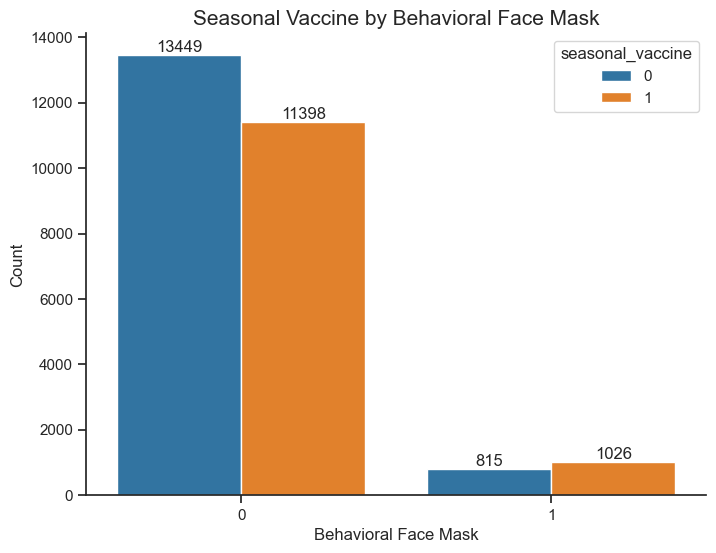

In [30]:
# Column Plot of Target Response by Behavioral Face Mask

plt.figure()
ax1 = sns.countplot(data=df[df['behavioral_face_mask'] > -1], x="behavioral_face_mask", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Behavioral Face Mask", fontsize=15)
ax1.set_xlabel('Behavioral Face Mask')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['behavioral_face_mask'] > -1], x="behavioral_face_mask", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Behavioral Face Mask", fontsize=15)
ax2.set_xlabel('Behavioral Face Mask')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `behavioral_face_mask` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

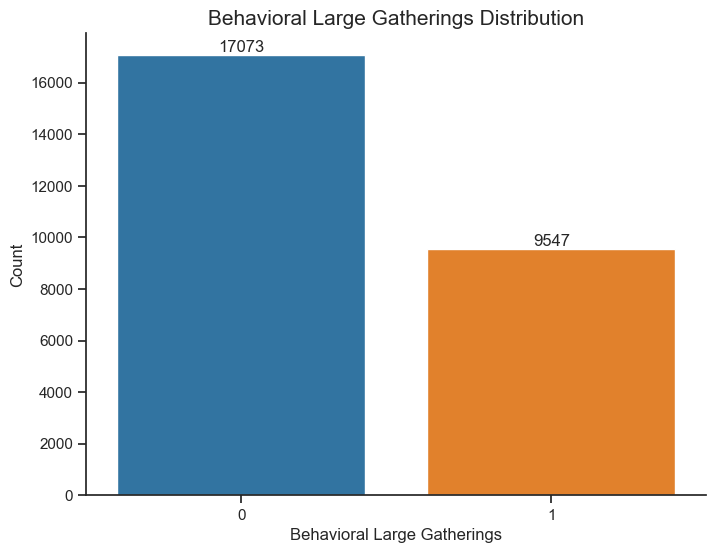

In [31]:
# behavioral large gatherings distribution

plt.figure()

ax = sns.countplot(data=df[df['behavioral_large_gatherings'] > -1], x="behavioral_large_gatherings")
ax.set_title("Behavioral Large Gatherings Distribution", fontsize=15)
ax.set_xlabel('Behavioral Large Gatherings')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

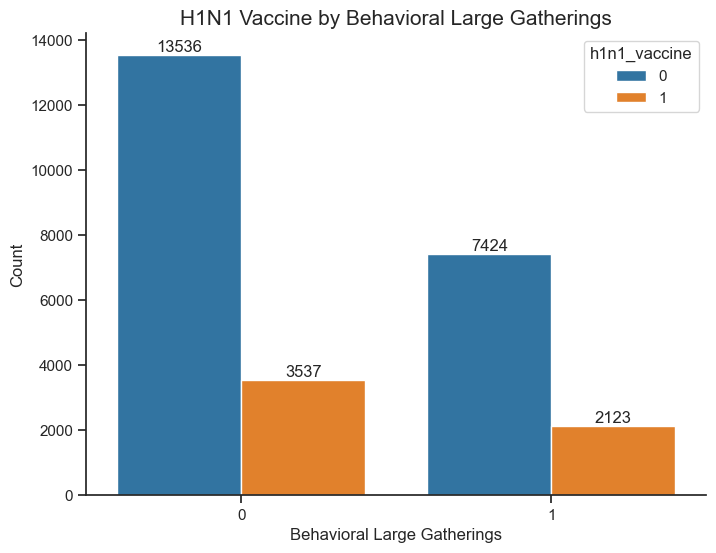

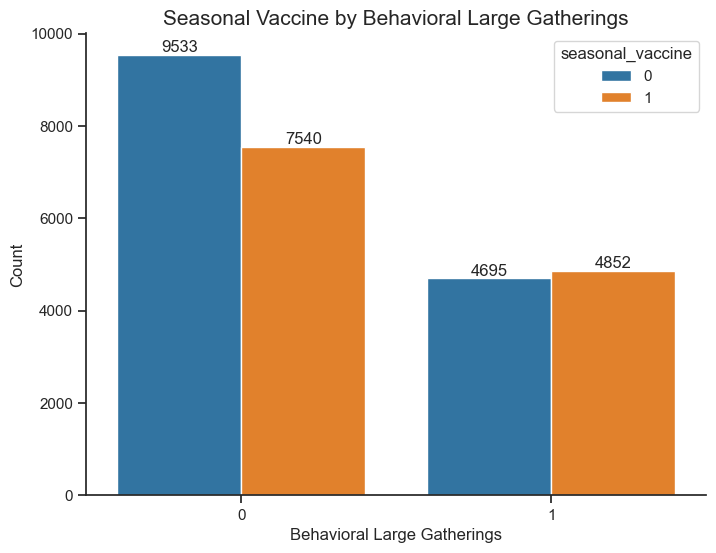

In [32]:
# Column Plot of Target Response by Behavioral Large Gatherings

plt.figure()
ax1 = sns.countplot(data=df[df['behavioral_large_gatherings'] > -1], x="behavioral_large_gatherings", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Behavioral Large Gatherings", fontsize=15)
ax1.set_xlabel('Behavioral Large Gatherings')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['behavioral_large_gatherings'] > -1], x="behavioral_large_gatherings", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Behavioral Large Gatherings", fontsize=15)
ax2.set_xlabel('Behavioral Large Gatherings')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `behavioral_large_gatherings` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

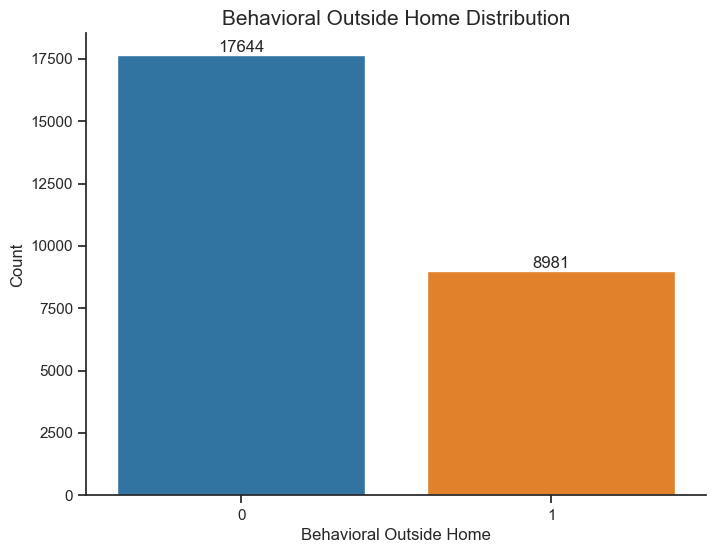

In [33]:
# behavioral outside home distribution

plt.figure()

ax = sns.countplot(data=df[df['behavioral_outside_home'] > -1], x="behavioral_outside_home")
ax.set_title("Behavioral Outside Home Distribution", fontsize=15)
ax.set_xlabel('Behavioral Outside Home')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

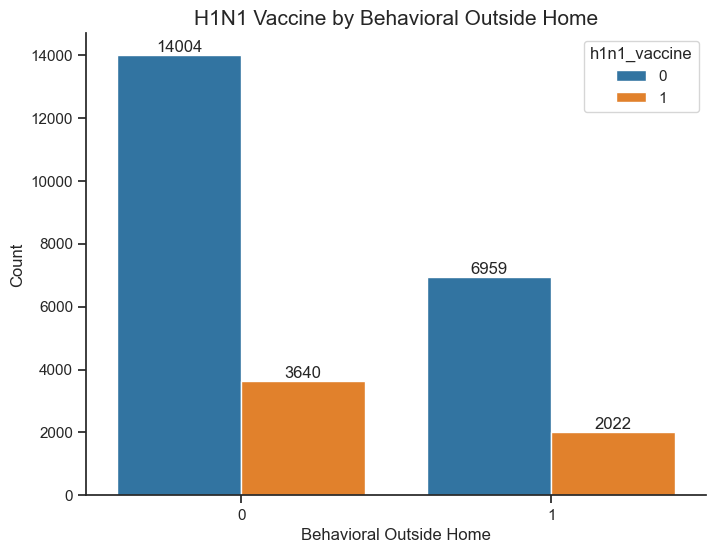

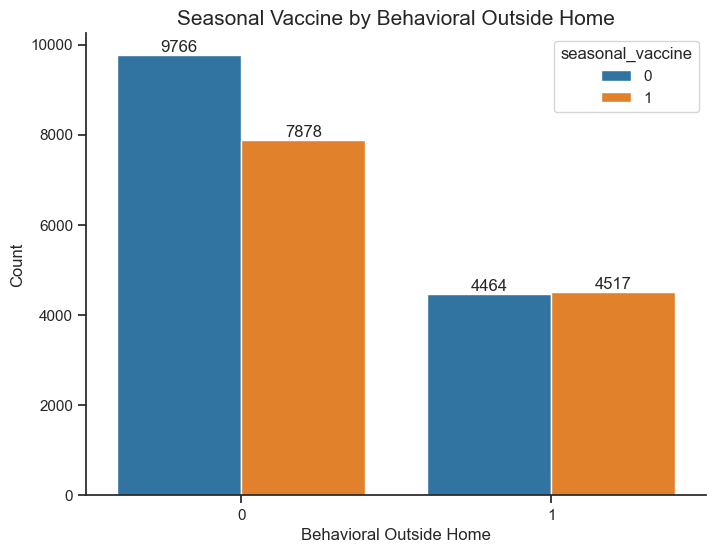

In [34]:
# Column Plot of Target Response by Behavioral Outside Home

plt.figure()
ax1 = sns.countplot(data=df[df['behavioral_outside_home'] > -1], x="behavioral_outside_home", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Behavioral Outside Home", fontsize=15)
ax1.set_xlabel('Behavioral Outside Home')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['behavioral_outside_home'] > -1], x="behavioral_outside_home", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Behavioral Outside Home", fontsize=15)
ax2.set_xlabel('Behavioral Outside Home')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `behavioral_outside_home` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

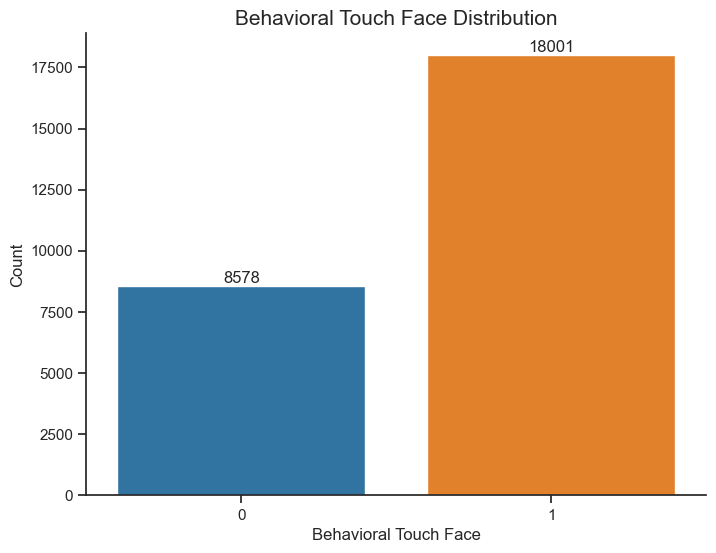

In [35]:
# behavioral touch face distribution

plt.figure()

ax = sns.countplot(data=df[df['behavioral_touch_face'] > -1], x="behavioral_touch_face")
ax.set_title("Behavioral Touch Face Distribution", fontsize=15)
ax.set_xlabel('Behavioral Touch Face')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

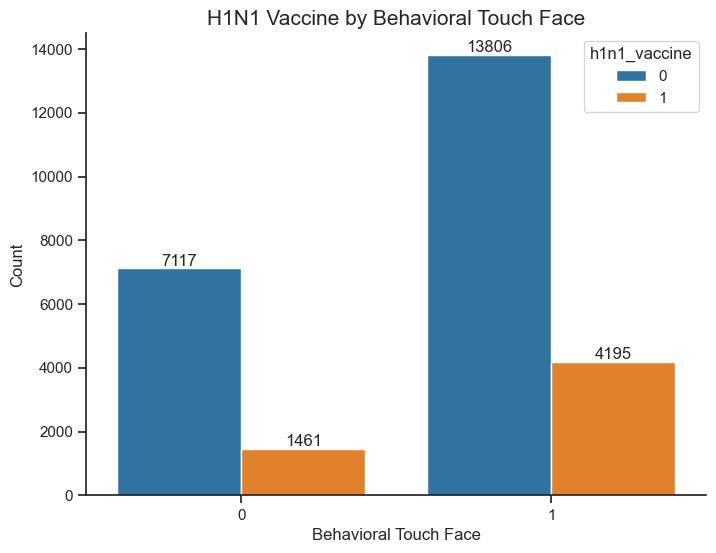

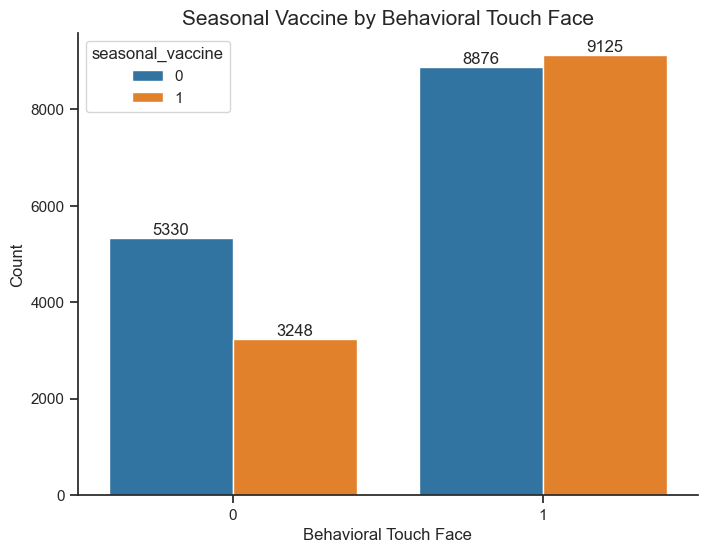

In [36]:
# Column Plot of Target Response by Behavioral Touch Face

plt.figure()
ax1 = sns.countplot(data=df[df['behavioral_touch_face'] > -1], x="behavioral_touch_face", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Behavioral Touch Face", fontsize=15)
ax1.set_xlabel('Behavioral Touch Face')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['behavioral_touch_face'] > -1], x="behavioral_touch_face", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Behavioral Touch Face", fontsize=15)
ax2.set_xlabel('Behavioral Touch Face')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `behavioral_touch_face` memengaruhi `seasonal_vaccine` tetapi tidak memengaruhi `h1n1_vaccine`

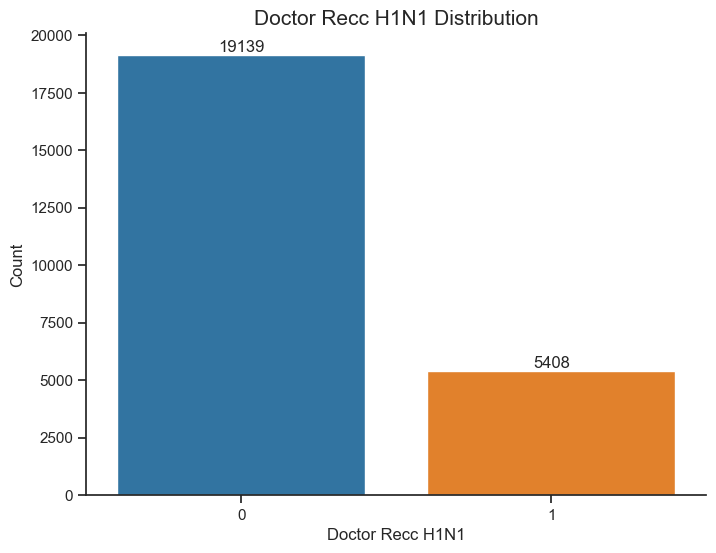

In [37]:
# doctor reccomendation of h1n1 distribution

plt.figure()

ax = sns.countplot(data=df[df['doctor_recc_h1n1'] > -1], x="doctor_recc_h1n1")
ax.set_title("Doctor Recc H1N1 Distribution", fontsize=15)
ax.set_xlabel('Doctor Recc H1N1')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

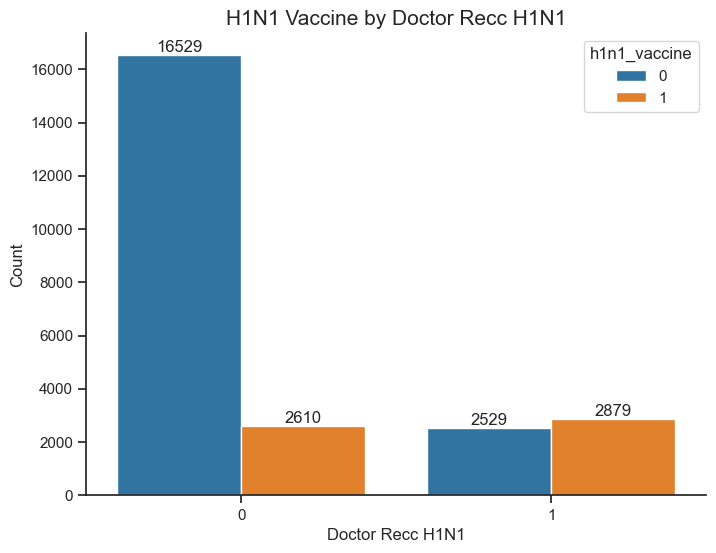

In [38]:
# Column Plot of H1N1 Vaccine by Doctor Reccomendation of H1N1

plt.figure()
ax1 = sns.countplot(data=df[df['doctor_recc_h1n1'] > -1], x="doctor_recc_h1n1", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Doctor Recc H1N1", fontsize=15)
ax1.set_xlabel('Doctor Recc H1N1')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `doctor_recc_h1n1` memengaruhi `h1n1_vaccine` sehingga layak dijadikan calon prediktor

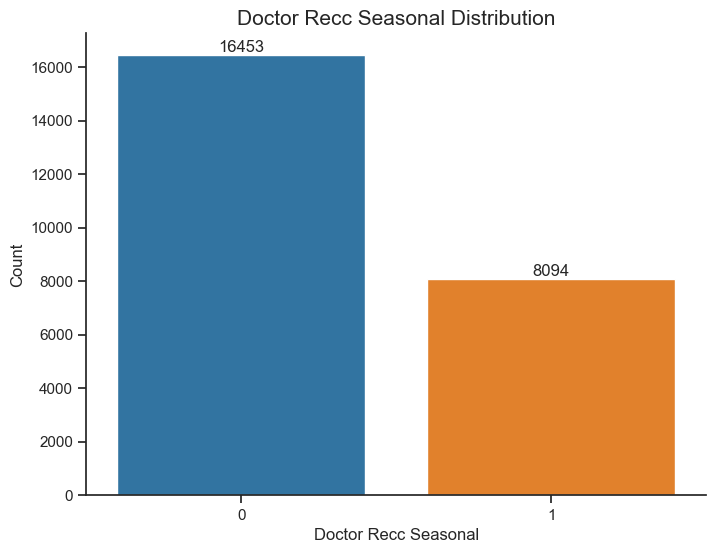

In [39]:
# doctor reccomendation seasonal distribution

plt.figure()

ax = sns.countplot(data=df[df['doctor_recc_seasonal'] > -1], x="doctor_recc_seasonal")
ax.set_title("Doctor Recc Seasonal Distribution", fontsize=15)
ax.set_xlabel('Doctor Recc Seasonal')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

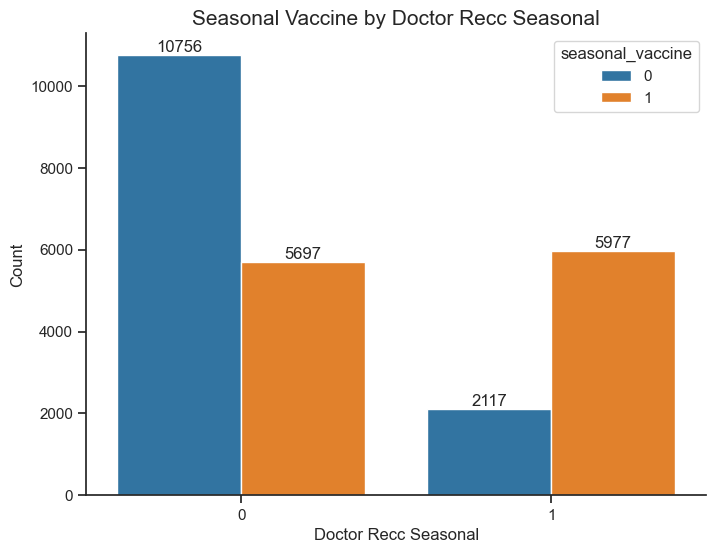

In [40]:
# Column Plot of Seasonal Vaccine by Doctor Recommendation of Seasonal

plt.figure()
ax1 = sns.countplot(data=df[df['doctor_recc_seasonal'] > -1], x="doctor_recc_seasonal", hue="seasonal_vaccine")
ax1.set_title("Seasonal Vaccine by Doctor Recc Seasonal", fontsize=15)
ax1.set_xlabel('Doctor Recc Seasonal')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `doctor_recc_seasonal` memengaruhi `seasonal_vaccine` sehingga layak dijadikan calon prediktor

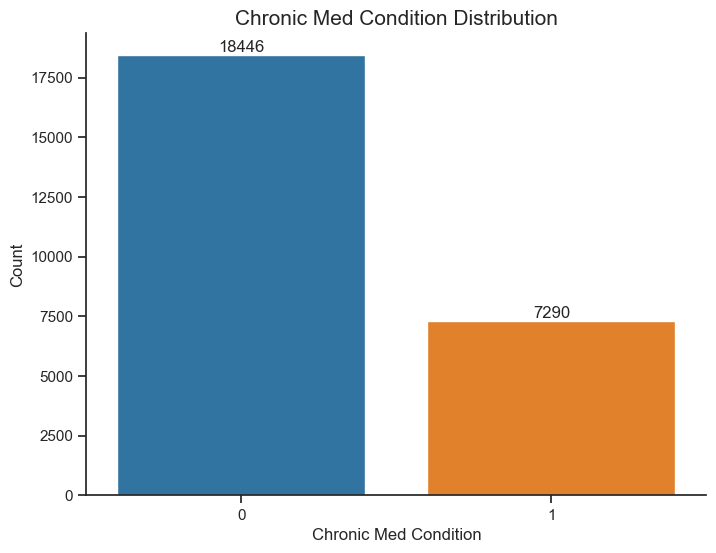

In [41]:
# chronic med condition distribution

plt.figure()

ax = sns.countplot(data=df[df['chronic_med_condition'] > -1], x="chronic_med_condition")
ax.set_title("Chronic Med Condition Distribution", fontsize=15)
ax.set_xlabel('Chronic Med Condition')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

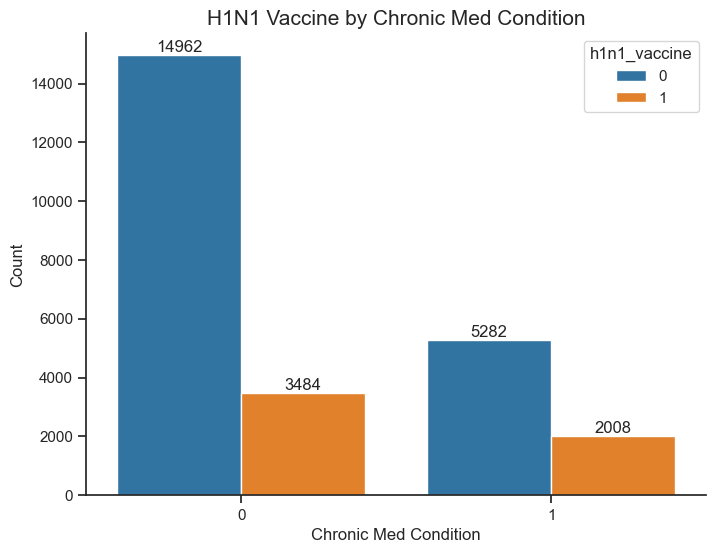

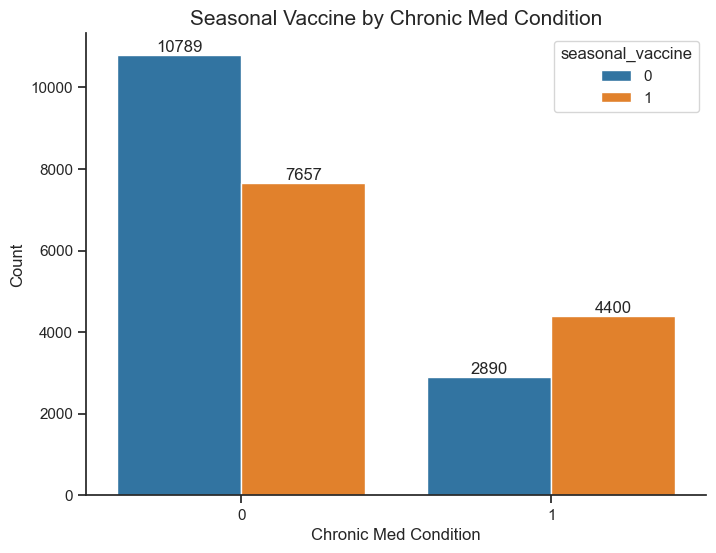

In [42]:
# Column Plot of Target Response by Chronic Med Condition

plt.figure()
ax1 = sns.countplot(data=df[df['chronic_med_condition'] > -1], x="chronic_med_condition", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Chronic Med Condition", fontsize=15)
ax1.set_xlabel('Chronic Med Condition')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['chronic_med_condition'] > -1], x="chronic_med_condition", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Chronic Med Condition", fontsize=15)
ax2.set_xlabel('Chronic Med Condition')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `chronic_med_condition` memengaruhi `seasonal_vaccine` tetapi tidak `h1n1_vaccine`

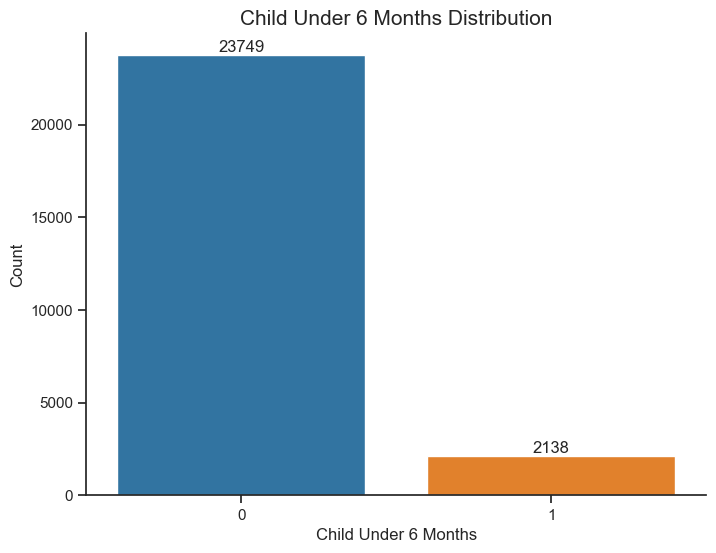

In [43]:
# child under 6 months distribution

plt.figure()

ax = sns.countplot(data=df[df['child_under_6_months'] > -1], x="child_under_6_months")
ax.set_title("Child Under 6 Months Distribution", fontsize=15)
ax.set_xlabel('Child Under 6 Months')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

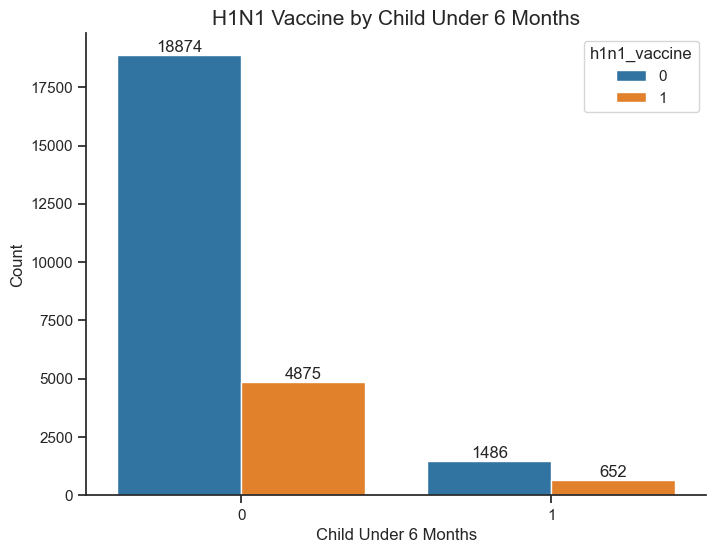

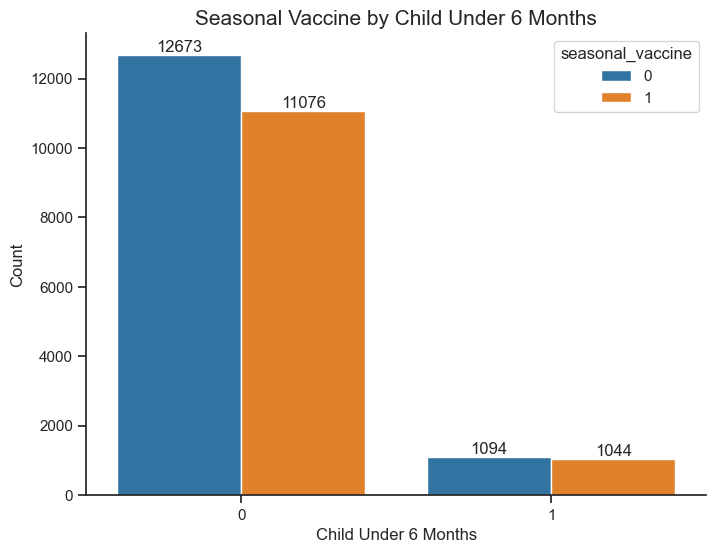

In [44]:
# Column Plot of Target Response by Child Under 6 Months

plt.figure()
ax1 = sns.countplot(data=df[df['child_under_6_months'] > -1], x="child_under_6_months", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Child Under 6 Months", fontsize=15)
ax1.set_xlabel('Child Under 6 Months')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['child_under_6_months'] > -1], x="child_under_6_months", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Child Under 6 Months", fontsize=15)
ax2.set_xlabel('Child Under 6 Months')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `child_under_6_months` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

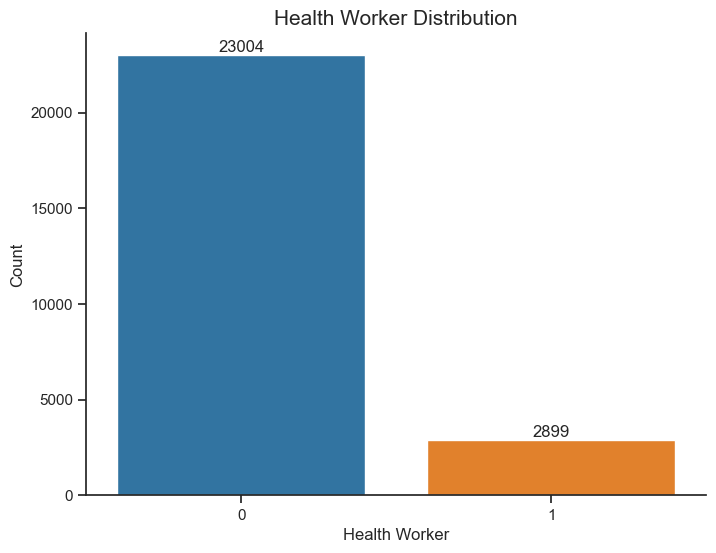

In [100]:
# health worker distribution

plt.figure()

ax = sns.countplot(data=df[df['health_worker'] > -1], x="health_worker")
ax.set_title("Health Worker Distribution", fontsize=15)
ax.set_xlabel('Health Worker')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

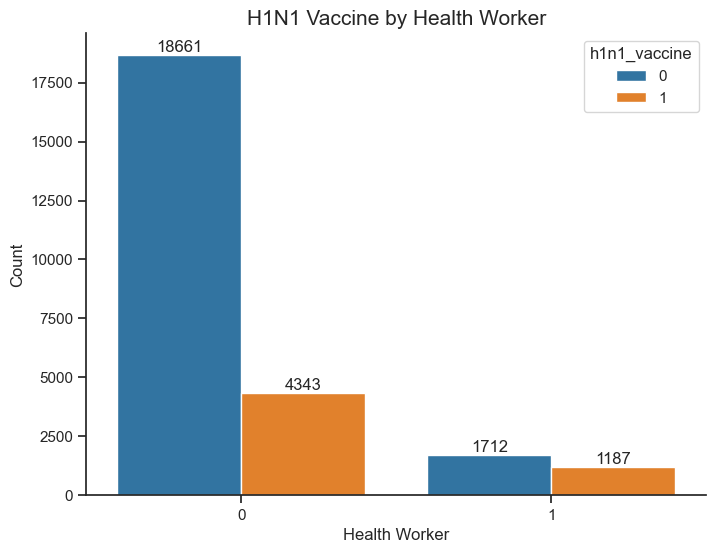

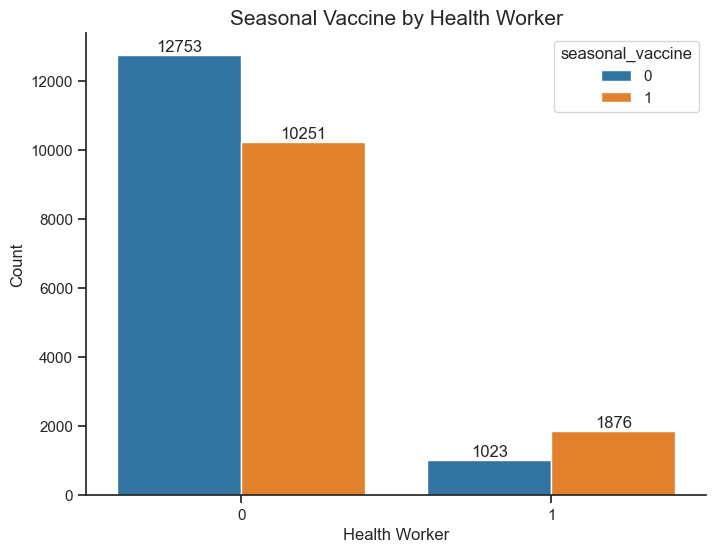

In [102]:
# Column Plot of Target Response by Health Worker

plt.figure()
ax1 = sns.countplot(data=df[df['health_worker'] > -1], x="health_worker", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Health Worker", fontsize=15)
ax1.set_xlabel('Health Worker')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['health_worker'] > -1], x="health_worker", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Health Worker", fontsize=15)
ax2.set_xlabel('Health Worker')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `health_worker` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

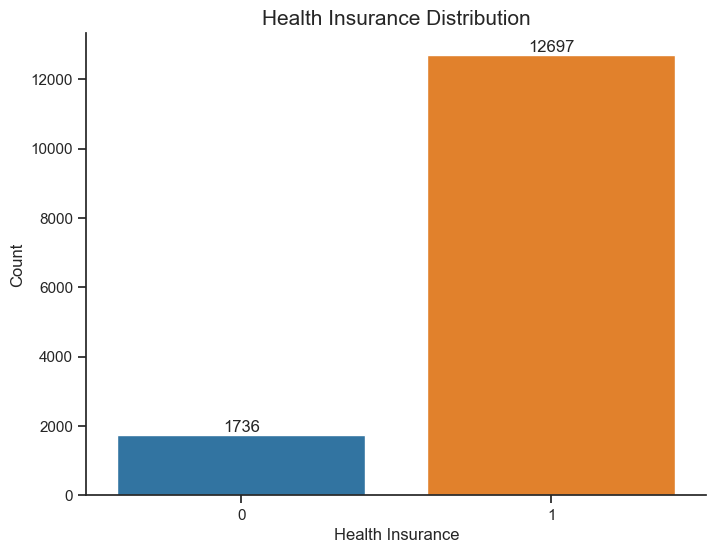

In [101]:
# health insurance distribution

plt.figure()

ax = sns.countplot(data=df[df['health_insurance'] > -1], x="health_insurance")
ax.set_title("Health Insurance Distribution", fontsize=15)
ax.set_xlabel('Health Insurance')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

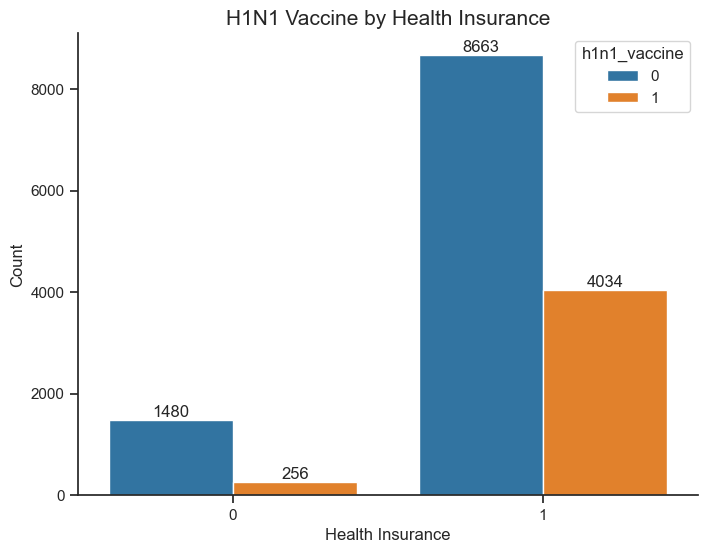

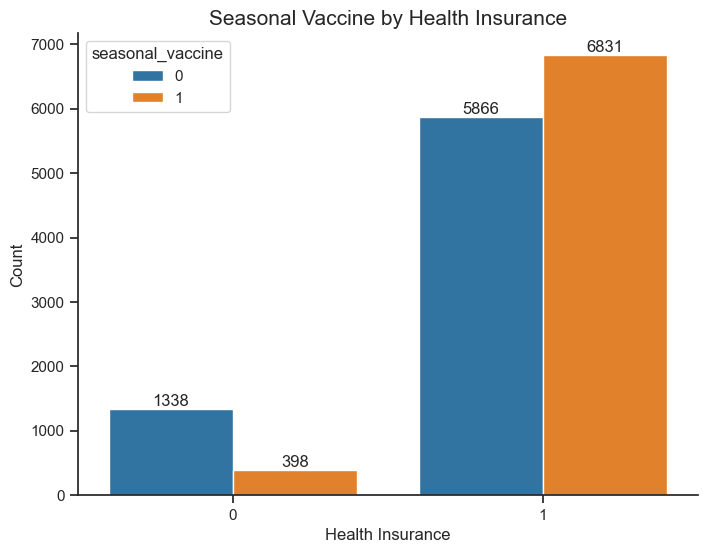

In [103]:
# Column Plot of Target Response by Health Insurance

plt.figure()
ax1 = sns.countplot(data=df[df['health_insurance'] > -1], x="health_insurance", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Health Insurance", fontsize=15)
ax1.set_xlabel('Health Insurance')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.figure()
ax2 = sns.countplot(data=df[df['health_insurance'] > -1], x="health_insurance", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Health Insurance", fontsize=15)
ax2.set_xlabel('Health Insurance')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `health_insurance` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine`

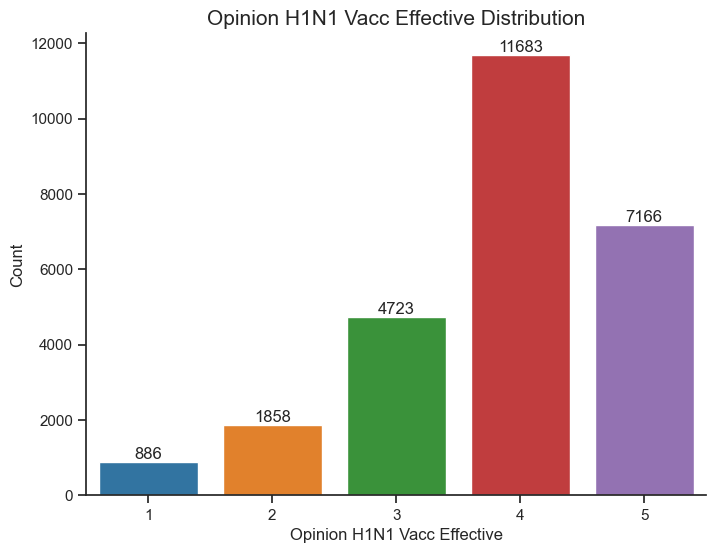

In [45]:
# opinion of effectiveness of H1N1 vaccine distribution

plt.figure()

ax = sns.countplot(data=df[df['opinion_h1n1_vacc_effective'] > -1], x="opinion_h1n1_vacc_effective")
ax.set_title("Opinion H1N1 Vacc Effective Distribution", fontsize=15)
ax.set_xlabel('Opinion H1N1 Vacc Effective')
ax.set_ylabel('Count')
ax.set_xticklabels([1,2,3,4,5])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

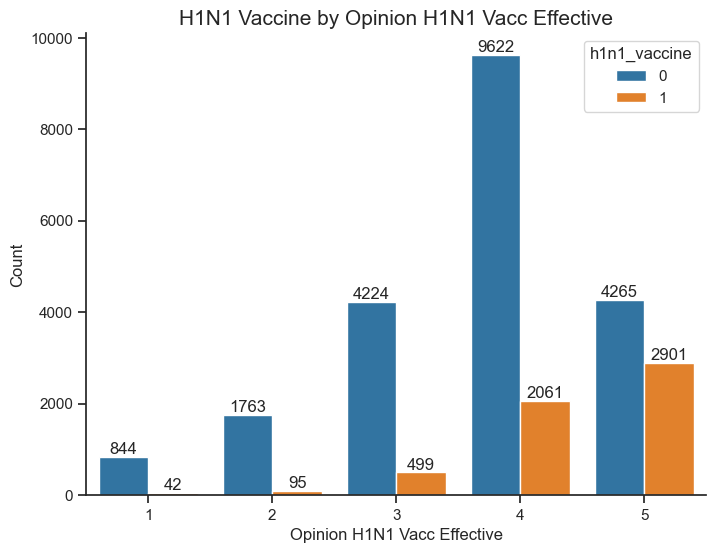

In [46]:
# Column Plot of H1N1 Vaccine by Opinion of Effectiveness of H1N1 Vaccine

plt.figure()
ax1 = sns.countplot(data=df[df['opinion_h1n1_vacc_effective'] > -1], x="opinion_h1n1_vacc_effective", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Opinion H1N1 Vacc Effective", fontsize=15)
ax1.set_xlabel('Opinion H1N1 Vacc Effective')
ax1.set_ylabel('Count')
ax1.set_xticklabels([1,2,3,4,5])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `opinion_h1n1_vacc_effective` tidak memengaruhi `h1n1_vaccine`

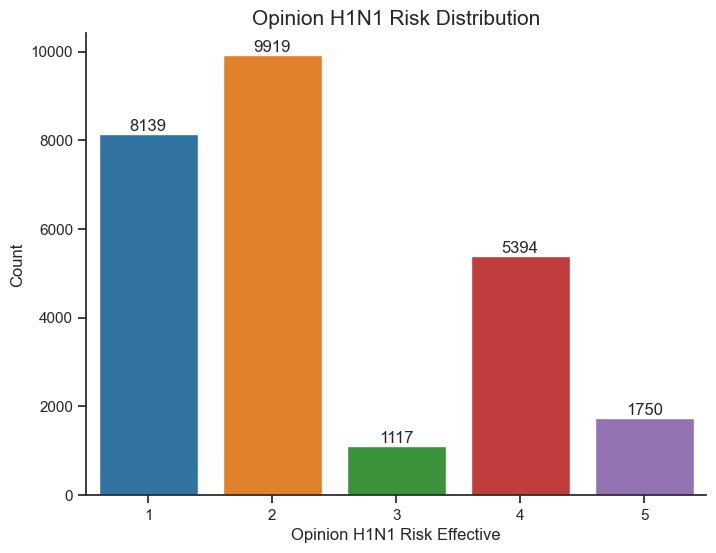

In [47]:
# opinion of H1N1 risk distribution

plt.figure()

ax = sns.countplot(data=df[df['opinion_h1n1_risk'] > -1], x="opinion_h1n1_risk")
ax.set_title("Opinion H1N1 Risk Distribution", fontsize=15)
ax.set_xlabel('Opinion H1N1 Risk Effective')
ax.set_ylabel('Count')
ax.set_xticklabels([1,2,3,4,5])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

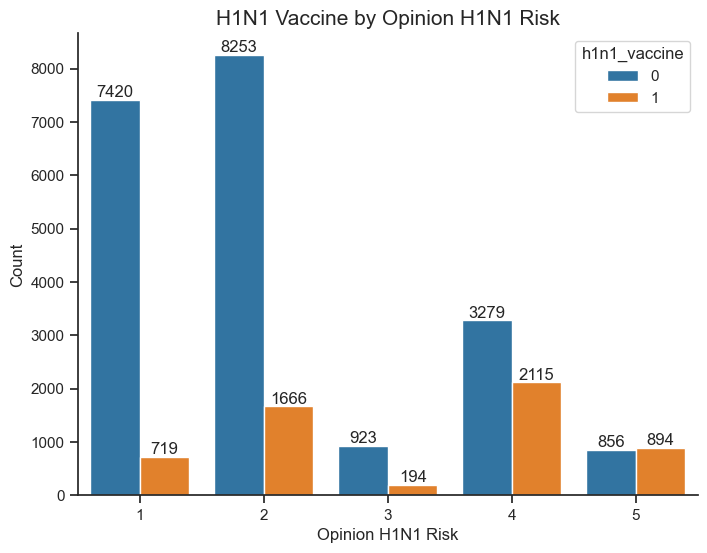

In [48]:
# Column Plot of H1N1 Vaccine by Opinion of H1N1 Risk

plt.figure()
ax1 = sns.countplot(data=df[df['opinion_h1n1_risk'] > -1], x="opinion_h1n1_risk", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Opinion H1N1 Risk", fontsize=15)
ax1.set_xlabel('Opinion H1N1 Risk')
ax1.set_ylabel('Count')
ax1.set_xticklabels([1,2,3,4,5])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `opinion_h1n1_risk` memengaruhi `h1n1_vaccine` karena yang tidak merasa h1n1 berisiko cenderung tidak divaksin. \
Dengan demikian, `opinion_h1n1_risk` layak dijadikan calon prediktor.

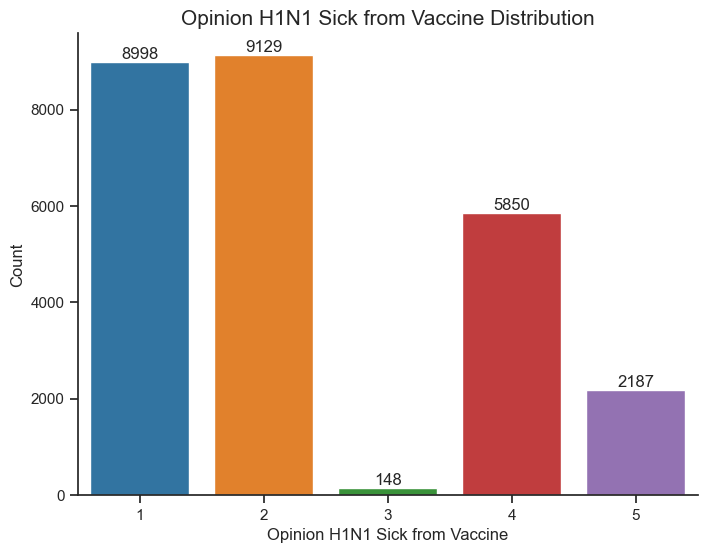

In [49]:
# worry of getting sick from taking H1N1 vaccine distribution

plt.figure()

ax = sns.countplot(data=df[df['opinion_h1n1_sick_from_vacc'] > -1], x="opinion_h1n1_sick_from_vacc")
ax.set_title("Opinion H1N1 Sick from Vaccine Distribution", fontsize=15)
ax.set_xlabel('Opinion H1N1 Sick from Vaccine')
ax.set_ylabel('Count')
ax.set_xticklabels([1,2,3,4,5])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

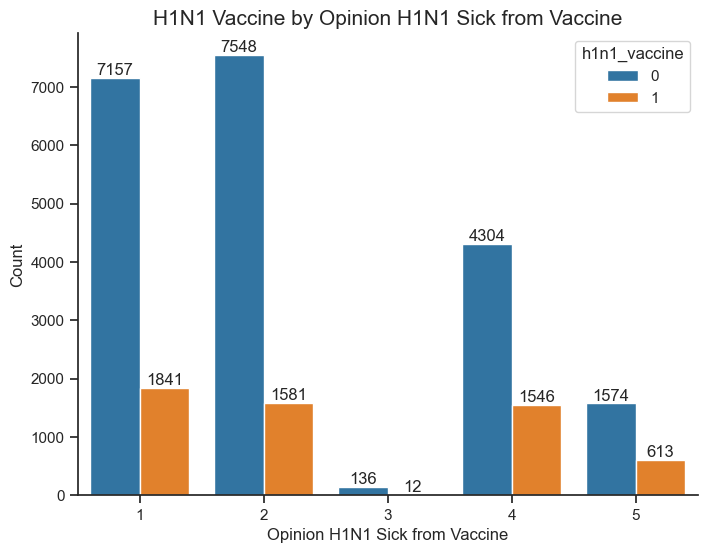

In [50]:
# Column Plot of H1N1 Vaccine by Worry of Getting Sick from taking H1N1 Vaccine

plt.figure()
ax1 = sns.countplot(data=df[df['opinion_h1n1_sick_from_vacc'] > -1], x="opinion_h1n1_sick_from_vacc", hue="h1n1_vaccine")
ax1.set_title("H1N1 Vaccine by Opinion H1N1 Sick from Vaccine", fontsize=15)
ax1.set_xlabel('Opinion H1N1 Sick from Vaccine')
ax1.set_ylabel('Count')
ax1.set_xticklabels([1,2,3,4,5])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `opinion_h1n1_sick_from_vacc` tidak memengaruhi `h1n1_vaccine`

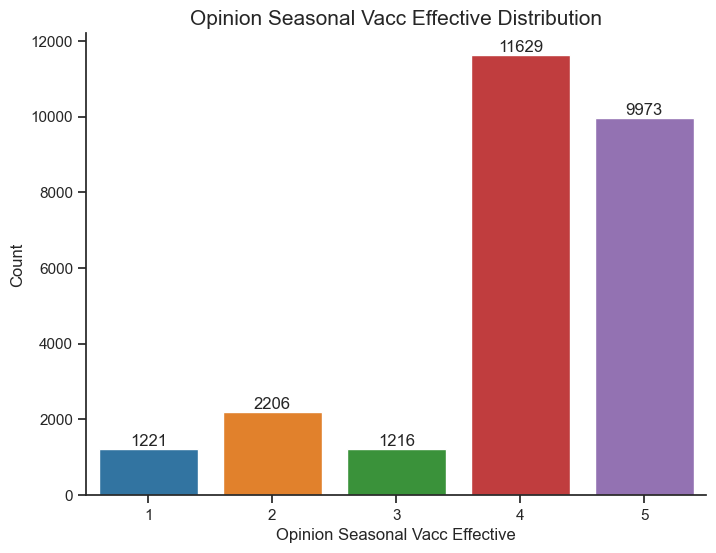

In [51]:
# opinion of effectiveness of seasonal vaccine distribution

plt.figure()

ax = sns.countplot(data=df[df['opinion_seas_vacc_effective'] > -1], x="opinion_seas_vacc_effective")
ax.set_title("Opinion Seasonal Vacc Effective Distribution", fontsize=15)
ax.set_xlabel('Opinion Seasonal Vacc Effective')
ax.set_ylabel('Count')
ax.set_xticklabels([1,2,3,4,5])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

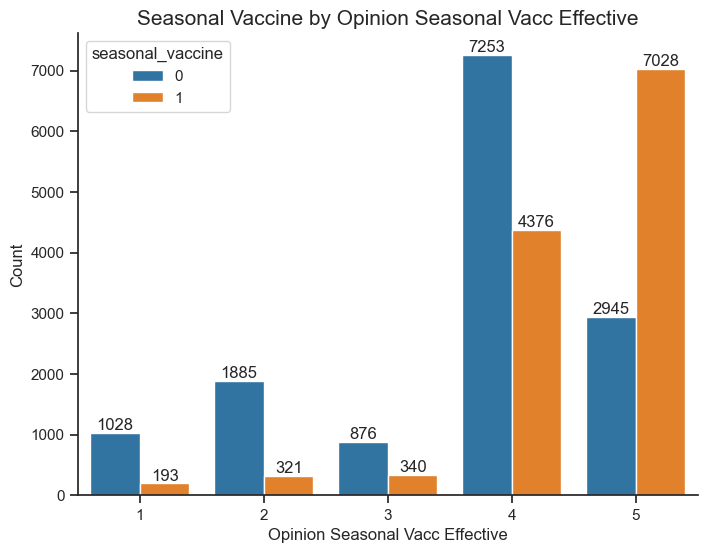

In [53]:
# Column Plot of Seasonal Vaccine by Opinion of Effectiveness of Seasonal Vaccine

plt.figure()
ax1 = sns.countplot(data=df[df['opinion_seas_vacc_effective'] > -1], x="opinion_seas_vacc_effective", hue="seasonal_vaccine")
ax1.set_title("Seasonal Vaccine by Opinion Seasonal Vacc Effective", fontsize=15)
ax1.set_xlabel('Opinion Seasonal Vacc Effective')
ax1.set_ylabel('Count')
ax1.set_xticklabels([1,2,3,4,5])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `opinion_seas_vacc_effective` memengaruhi `seasonal_vaccine` sehingga cocok dijadikan calon prediktor.

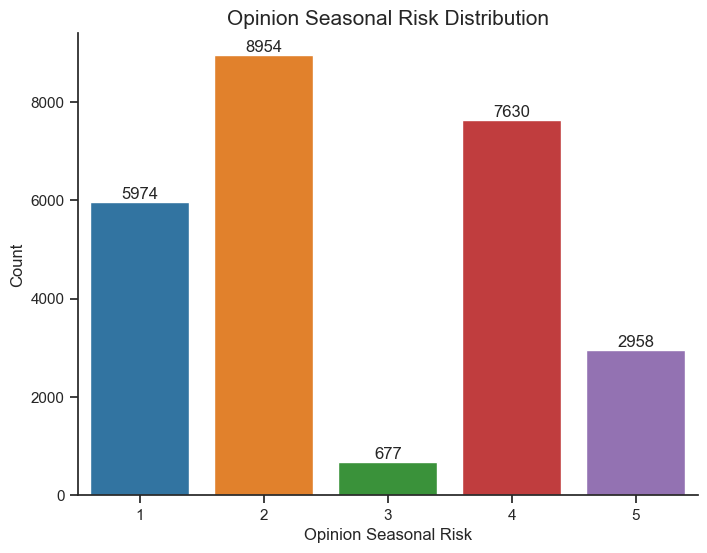

In [54]:
# opinion of seasonal flu Risk distribution

plt.figure()

ax = sns.countplot(data=df[df['opinion_seas_risk'] > -1], x="opinion_seas_risk")
ax.set_title("Opinion Seasonal Risk Distribution", fontsize=15)
ax.set_xlabel('Opinion Seasonal Risk')
ax.set_ylabel('Count')
ax.set_xticklabels([1,2,3,4,5])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

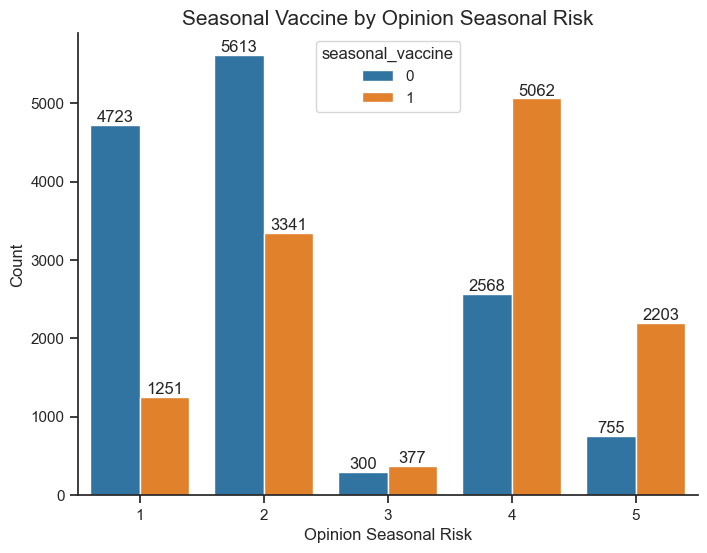

In [55]:
# Column Plot of Seasonal Vaccine by Opinion of Seasonal Flu Risk

plt.figure()
ax1 = sns.countplot(data=df[df['opinion_seas_risk'] > -1], x="opinion_seas_risk", hue="seasonal_vaccine")
ax1.set_title("Seasonal Vaccine by Opinion Seasonal Risk", fontsize=15)
ax1.set_xlabel('Opinion Seasonal Risk')
ax1.set_ylabel('Count')
ax1.set_xticklabels([1,2,3,4,5])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `opinion_seas_risk` memengaruhi `seasonal_vaccine` sehingga cocok dijadikan calon prediktor.

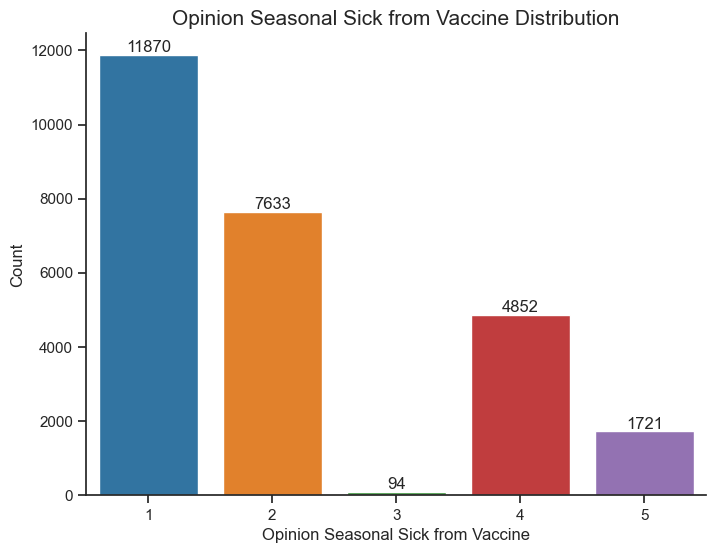

In [56]:
# worry of getting sick from taking seasonal vaccine distribution

plt.figure()

ax = sns.countplot(data=df[df['opinion_seas_sick_from_vacc'] > -1], x="opinion_seas_sick_from_vacc")
ax.set_title("Opinion Seasonal Sick from Vaccine Distribution", fontsize=15)
ax.set_xlabel('Opinion Seasonal Sick from Vaccine')
ax.set_ylabel('Count')
ax.set_xticklabels([1,2,3,4,5])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

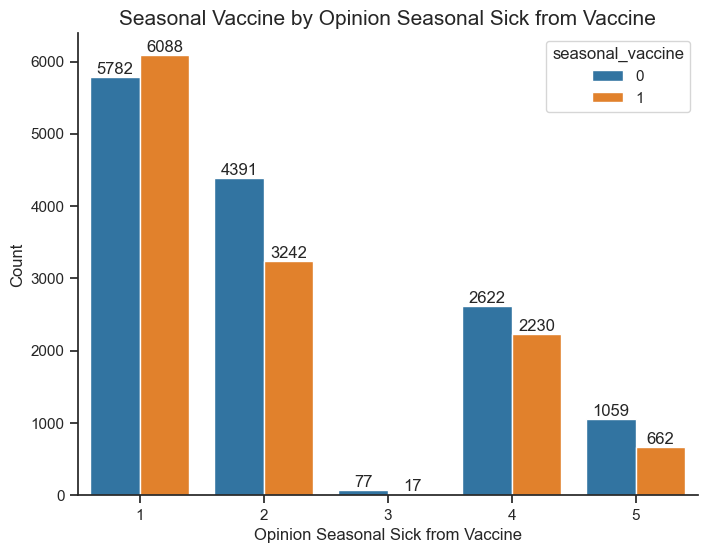

In [57]:
# Column Plot of Seasonal Vaccine by Worry of Getting Sick from taking H1N1 Vaccine

plt.figure()
ax1 = sns.countplot(data=df[df['opinion_seas_sick_from_vacc'] > -1], x="opinion_seas_sick_from_vacc", hue="seasonal_vaccine")
ax1.set_title("Seasonal Vaccine by Opinion Seasonal Sick from Vaccine", fontsize=15)
ax1.set_xlabel('Opinion Seasonal Sick from Vaccine')
ax1.set_ylabel('Count')
ax1.set_xticklabels([1,2,3,4,5])
for container in ax1.containers:
    ax1.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `opinion_seas_sick_from_vacc` memengaruhi `seasonal_vaccine` sehingga cocok dijadikan calon prediktor.

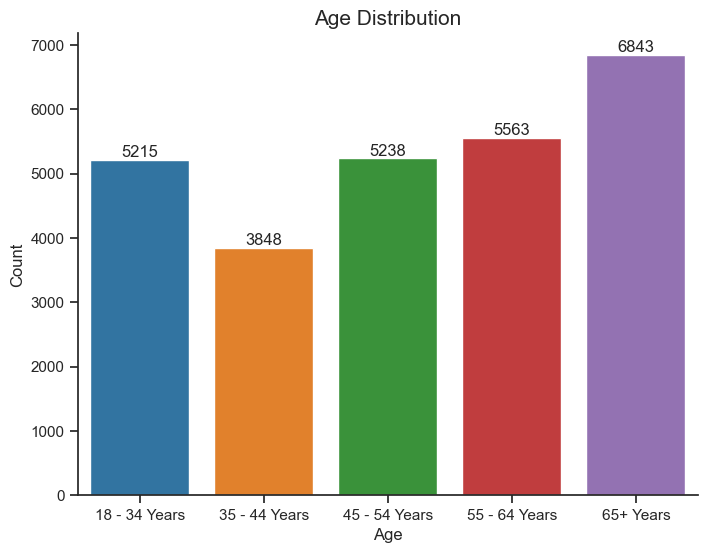

In [58]:
# age distribution

plt.figure()

ax = sns.countplot(data=df, x='age_group', 
                   order=['18 - 34 Years','35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'])
ax.set_title("Age Distribution", fontsize=15)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

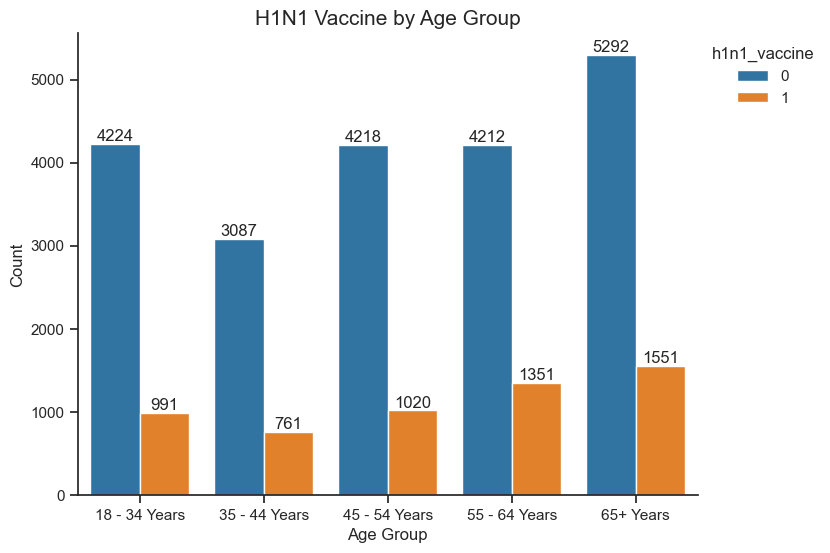

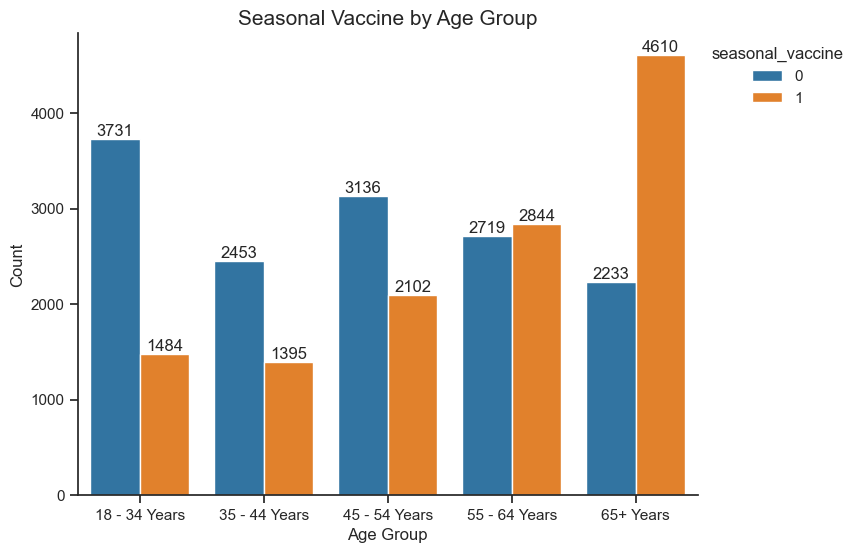

In [59]:
# Column Plot of Target Response by Age Group

plt.figure()
ax1 = sns.countplot(data=df, x='age_group', hue='h1n1_vaccine',
                   order=['18 - 34 Years','35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'])
ax1.set_title("H1N1 Vaccine by Age Group", fontsize=15)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1), frameon=False)
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="age_group", hue="seasonal_vaccine",
                    order=['18 - 34 Years','35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'])
ax2.set_title("Seasonal Vaccine by Age Group", fontsize=15)
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1), frameon=False)
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `age_group` memengaruhi `seasonal_vaccine` sehingga cocok dijadikan calon prediktor.

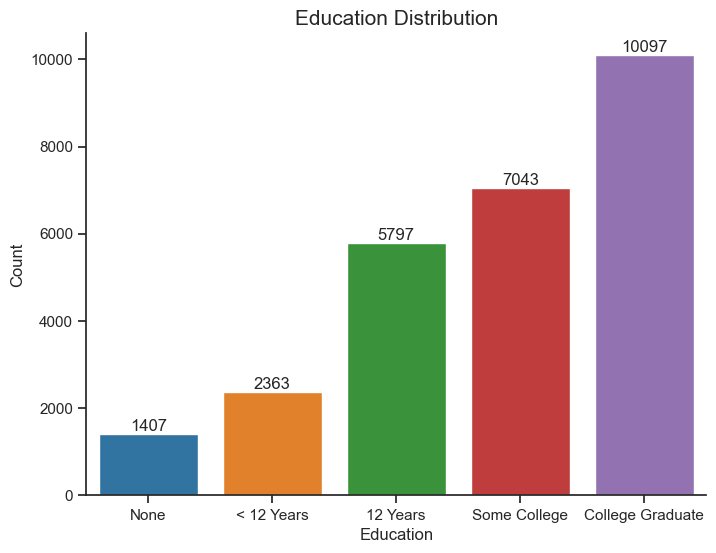

In [60]:
# education distribution

plt.figure()

ax = sns.countplot(data=df, x='education',
                   order=['None', '< 12 Years', '12 Years', 'Some College', 'College Graduate'])
ax.set_title("Education Distribution", fontsize=15)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

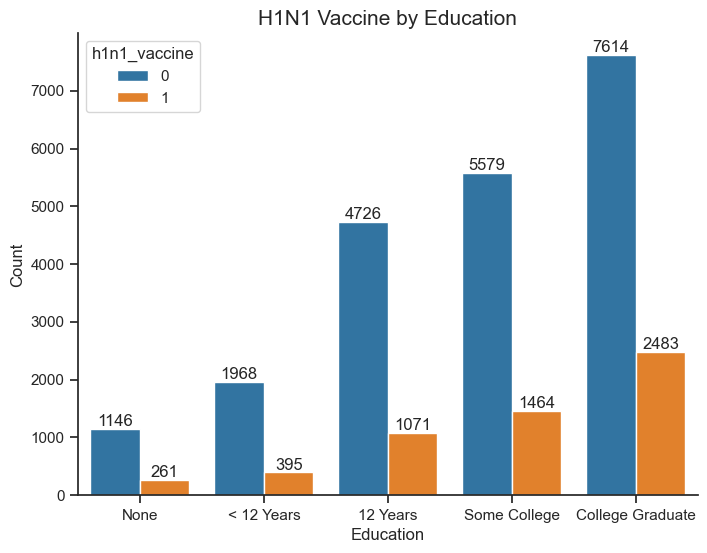

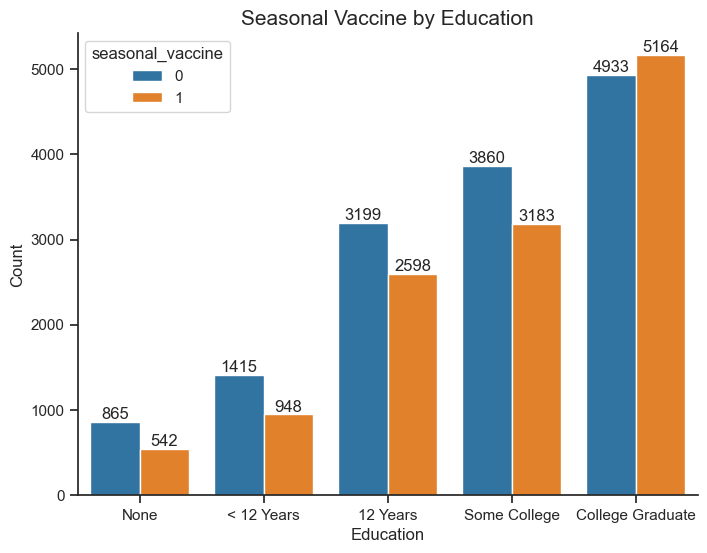

In [62]:
# Column Plot of Target Response by Education

plt.figure(figsize=(8,6))
ax1 = sns.countplot(data=df, x='education', hue='h1n1_vaccine',
                   order=['None', '< 12 Years', '12 Years', 'Some College', 'College Graduate'])
ax1.set_title("H1N1 Vaccine by Education", fontsize=15)
ax1.set_xlabel('Education')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure(figsize=(8,6))
ax2 = sns.countplot(data=df, x="education", hue="seasonal_vaccine",
                    order=['None', '< 12 Years', '12 Years', 'Some College', 'College Graduate'])
ax2.set_title("Seasonal Vaccine by Education", fontsize=15)
ax2.set_xlabel('Education')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `education` memengaruhi `seasonal_vaccine` sehingga cocok dijadikan calon prediktor.

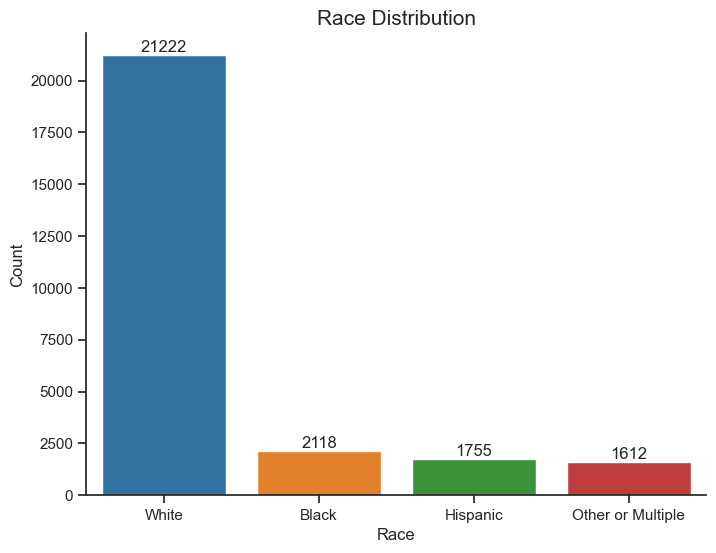

In [63]:
# race distribution

plt.figure()

ax = sns.countplot(data=df, x='race', order=df['race'].value_counts().index)
ax.set_title("Race Distribution", fontsize=15)
ax.set_xlabel('Race')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

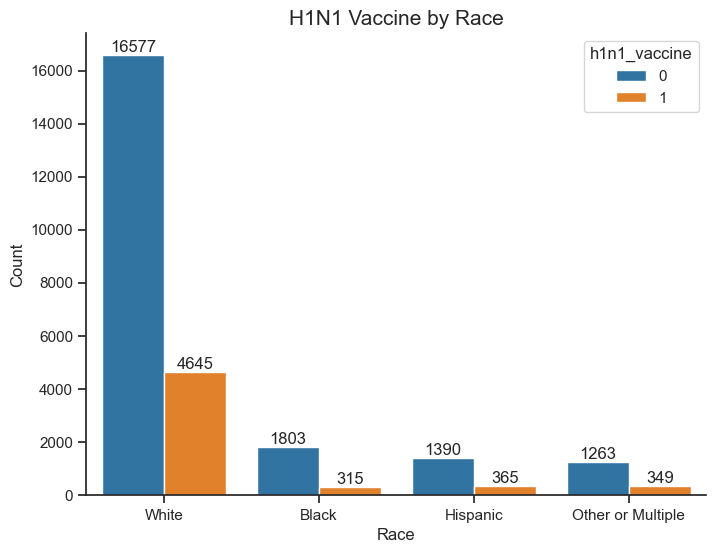

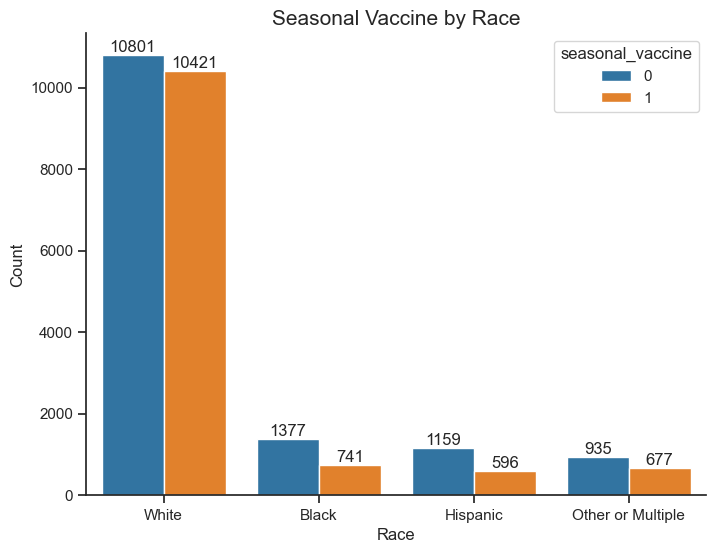

In [64]:
# Column Plot of Target Response by Race

plt.figure()
ax1 = sns.countplot(data=df, x='race', hue='h1n1_vaccine',
                   order=df['race'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Race", fontsize=15)
ax1.set_xlabel('Race')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="race", hue="seasonal_vaccine",
                    order=df['race'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Race", fontsize=15)
ax2.set_xlabel('Race')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `race` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

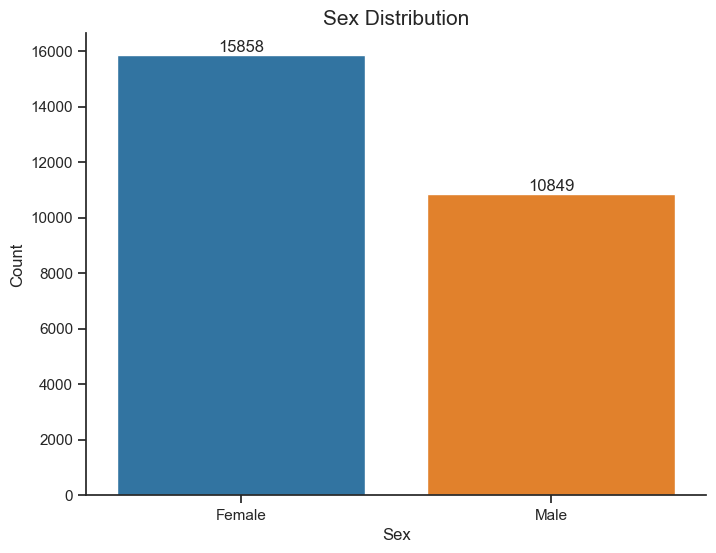

In [65]:
# sex distribution

plt.figure()

ax = sns.countplot(data=df, x='sex', order=df['sex'].value_counts().index)
ax.set_title("Sex Distribution", fontsize=15)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

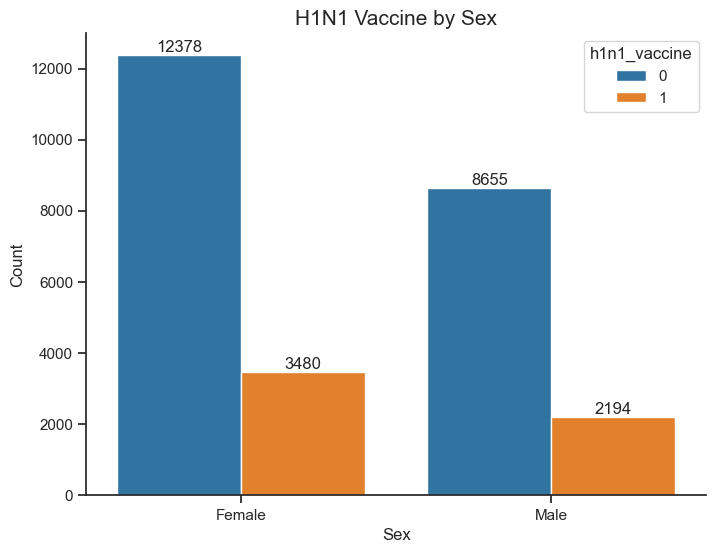

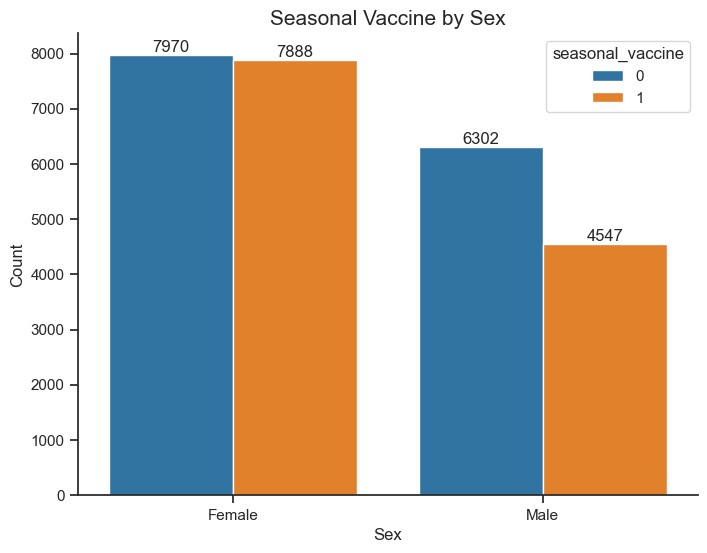

In [66]:
# Column Plot of Target Response by Sex

plt.figure()
ax1 = sns.countplot(data=df, x='sex', hue='h1n1_vaccine',
                   order=df['sex'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Sex", fontsize=15)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="sex", hue="seasonal_vaccine",
                    order=df['sex'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Sex", fontsize=15)
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `gender` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

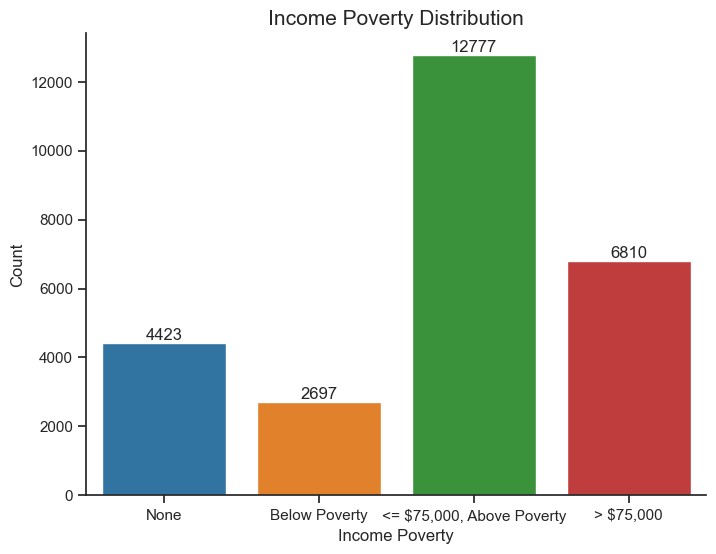

In [67]:
# income poverty distribution

plt.figure()

ax = sns.countplot(data=df, x='income_poverty', order=['None', 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000'])
ax.set_title("Income Poverty Distribution", fontsize=15)
ax.set_xlabel('Income Poverty')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

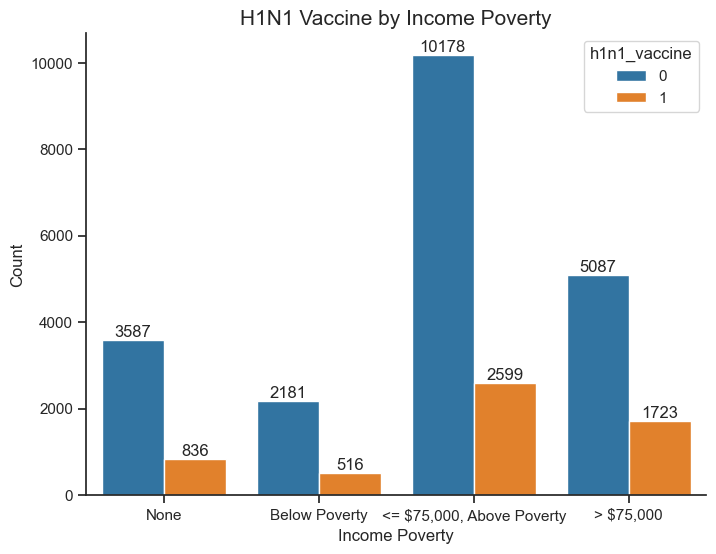

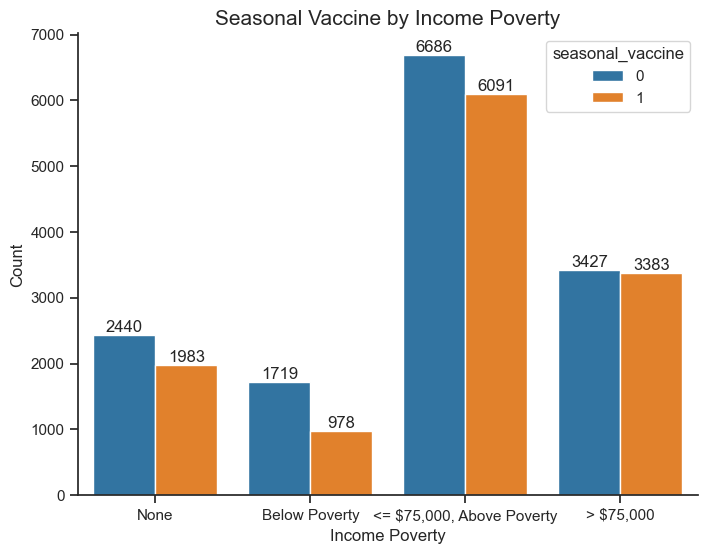

In [68]:
# Column Plot of Target Response by Income Poverty

plt.figure()
ax1 = sns.countplot(data=df, x='income_poverty', hue='h1n1_vaccine',
                   order=['None', 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000'])
ax1.set_title("H1N1 Vaccine by Income Poverty", fontsize=15)
ax1.set_xlabel('Income Poverty')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="income_poverty", hue="seasonal_vaccine",
                    order=['None', 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000'])
ax2.set_title("Seasonal Vaccine by Income Poverty", fontsize=15)
ax2.set_xlabel('Income Poverty')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `income_poverty` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

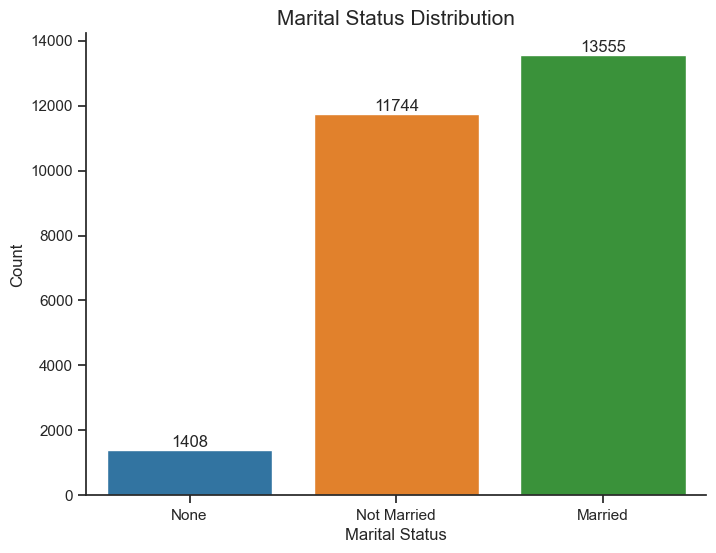

In [70]:
# marital status distribution

plt.figure()

ax = sns.countplot(data=df, x='marital_status', order=['None', 'Not Married', 'Married'])
ax.set_title("Marital Status Distribution", fontsize=15)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

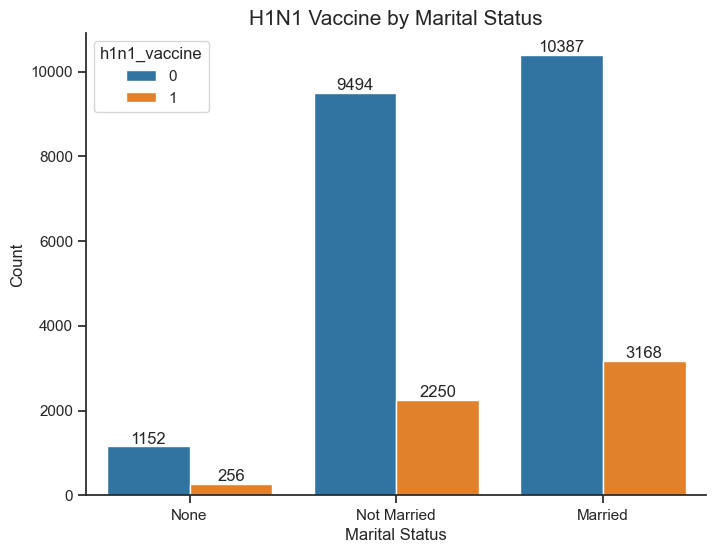

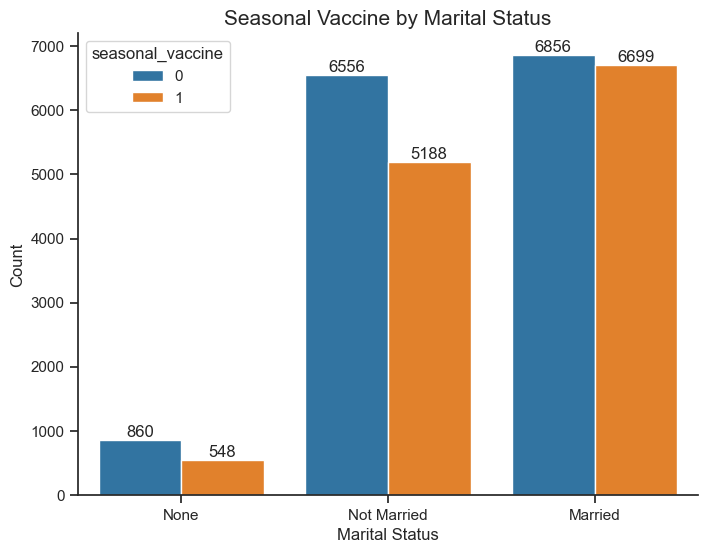

In [71]:
# Column Plot of Target Response by Marital Status

plt.figure()
ax1 = sns.countplot(data=df, x='marital_status', hue='h1n1_vaccine',
                   order=['None', 'Not Married', 'Married'])
ax1.set_title("H1N1 Vaccine by Marital Status", fontsize=15)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="marital_status", hue="seasonal_vaccine",
                    order=['None', 'Not Married', 'Married'])
ax2.set_title("Seasonal Vaccine by Marital Status", fontsize=15)
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `marital_status` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

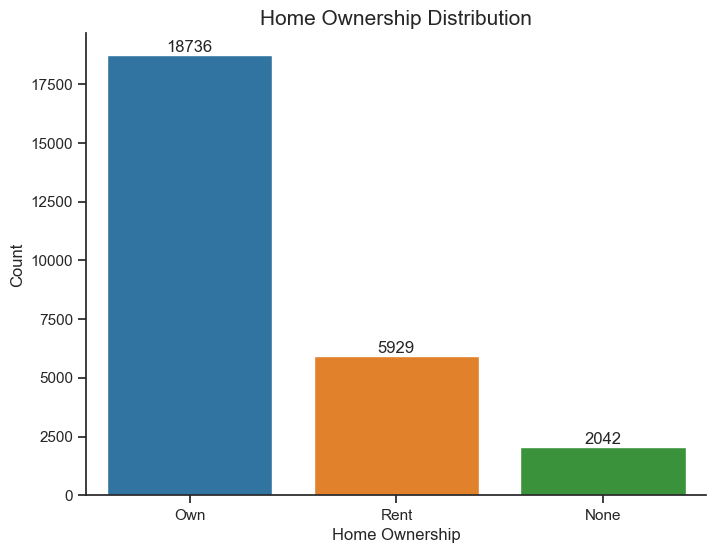

In [72]:
# home ownership distribution

plt.figure()

ax = sns.countplot(data=df, x='rent_or_own', order=df['rent_or_own'].value_counts().index)
ax.set_title("Home Ownership Distribution", fontsize=15)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

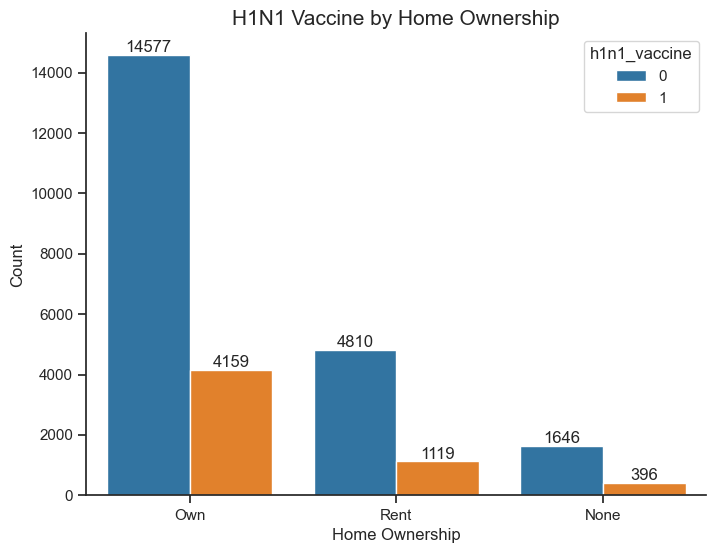

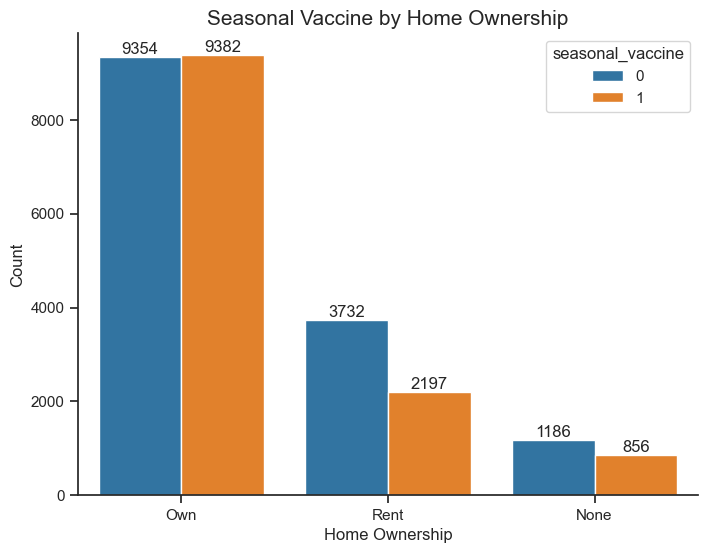

In [73]:
# Column Plot of Target Response by Rent or Own

plt.figure()
ax1 = sns.countplot(data=df, x='rent_or_own', hue='h1n1_vaccine',
                   order=df['rent_or_own'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Home Ownership", fontsize=15)
ax1.set_xlabel('Home Ownership')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="rent_or_own", hue="seasonal_vaccine",
                    order=df['rent_or_own'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Home Ownership", fontsize=15)
ax2.set_xlabel('Home Ownership')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `rent_or_own` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

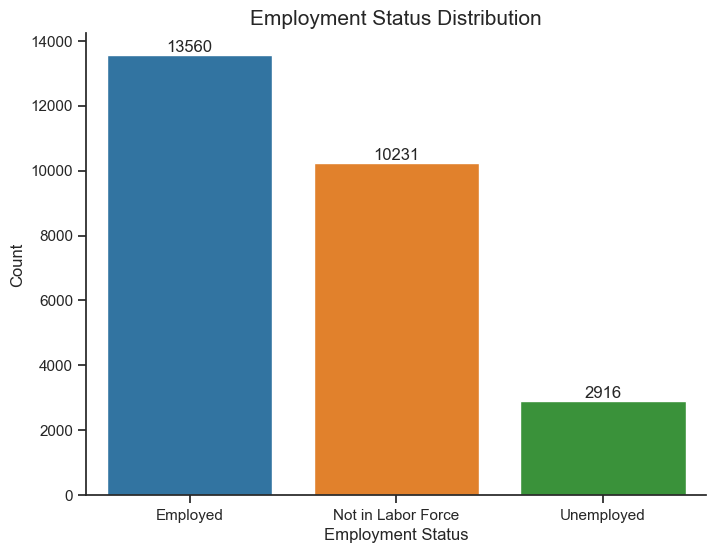

In [74]:
# employment status distribution

plt.figure()

ax = sns.countplot(data=df, x='employment_status', order=df['employment_status'].value_counts().index)
ax.set_title("Employment Status Distribution", fontsize=15)
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

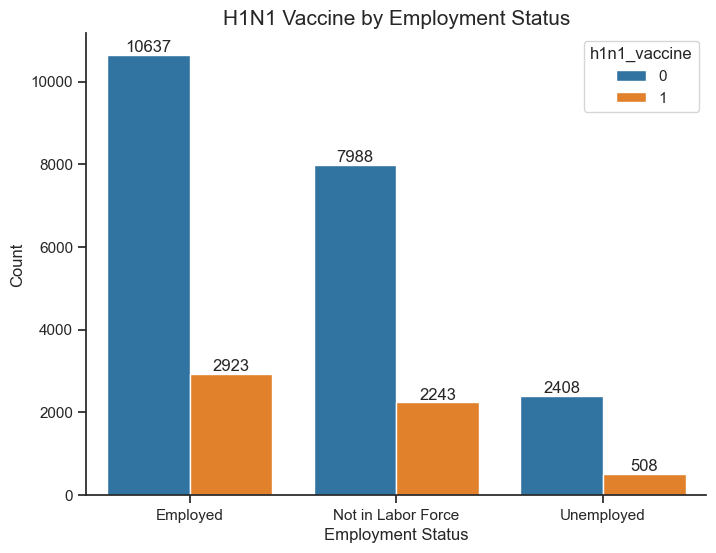

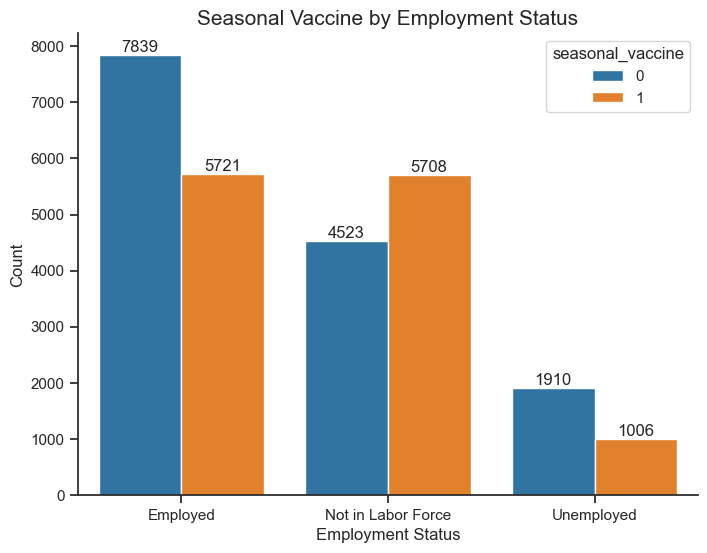

In [76]:
# Column Plot of Target Response by Employment Status

plt.figure()
ax1 = sns.countplot(data=df, x='employment_status', hue='h1n1_vaccine',
                   order=df['employment_status'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Employment Status", fontsize=15)
ax1.set_xlabel('Employment Status')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, x="employment_status", hue="seasonal_vaccine",
                    order=df['employment_status'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Employment Status", fontsize=15)
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `employment_status` memengaruhi `seasonal vaccine` tetapi tidak memengaruhi `h1n1_vaccine`

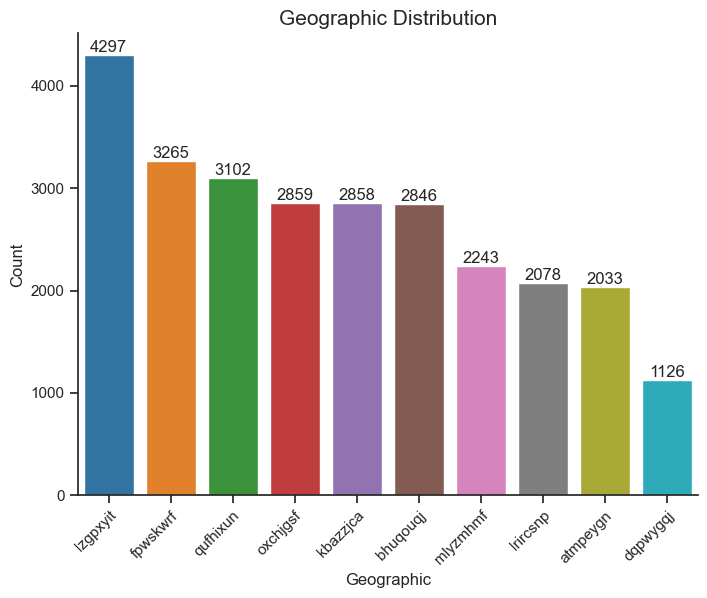

In [78]:
# geographic distribution

plt.figure()

ax = sns.countplot(data=df, x='hhs_geo_region', order=df['hhs_geo_region'].value_counts().index)
ax.set_title("Geographic Distribution", fontsize=15)
ax.set_xlabel('Geographic')
ax.set_ylabel('Count')
ax.set_xticklabels(df_features['hhs_geo_region'].value_counts().index, rotation=45, ha='right', rotation_mode='anchor')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

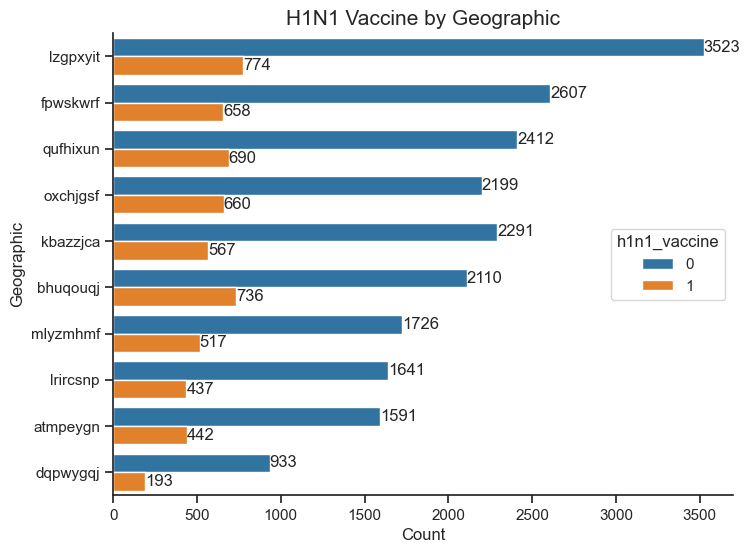

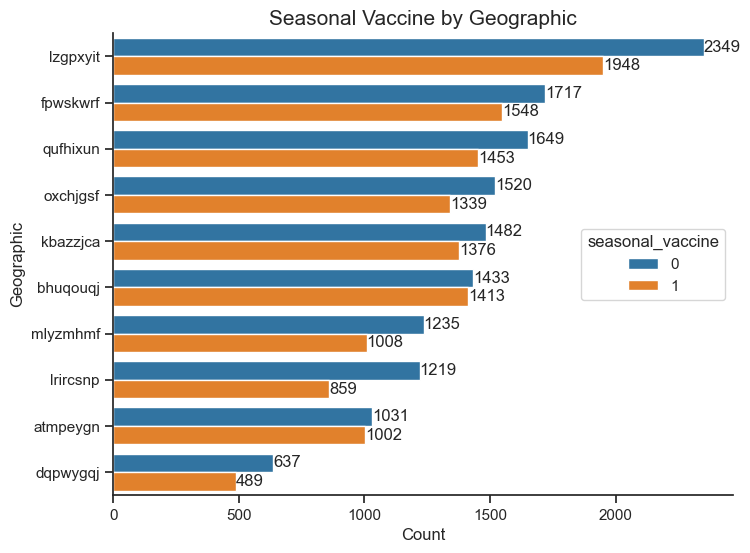

In [85]:
# Column Plot of Target Response by Geographic

plt.figure()
ax1 = sns.countplot(data=df, y='hhs_geo_region', hue='h1n1_vaccine',
                   order=df['hhs_geo_region'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Geographic", fontsize=15)
ax1.set_ylabel('Geographic')
ax1.set_xlabel('Count')
sns.move_legend(ax1, "right")
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, y="hhs_geo_region", hue="seasonal_vaccine",
                    order=df['hhs_geo_region'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Geographic", fontsize=15)
ax2.set_ylabel('Geographic')
ax2.set_xlabel('Count')
sns.move_legend(ax2, "right")
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `hss_geo_region` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

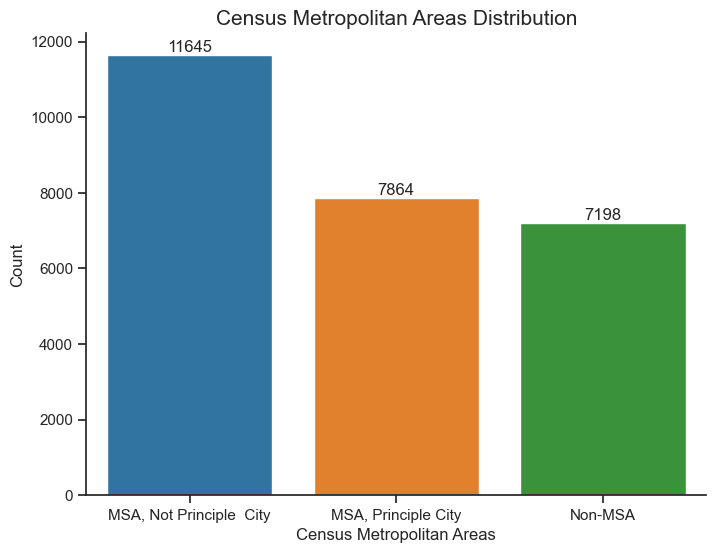

In [82]:
# Census Metropolitan Areas Distribution

plt.figure()

ax = sns.countplot(data=df, x='census_msa', order=df['census_msa'].value_counts().index)
ax.set_title("Census Metropolitan Areas Distribution", fontsize=15)
ax.set_xlabel('Census Metropolitan Areas')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

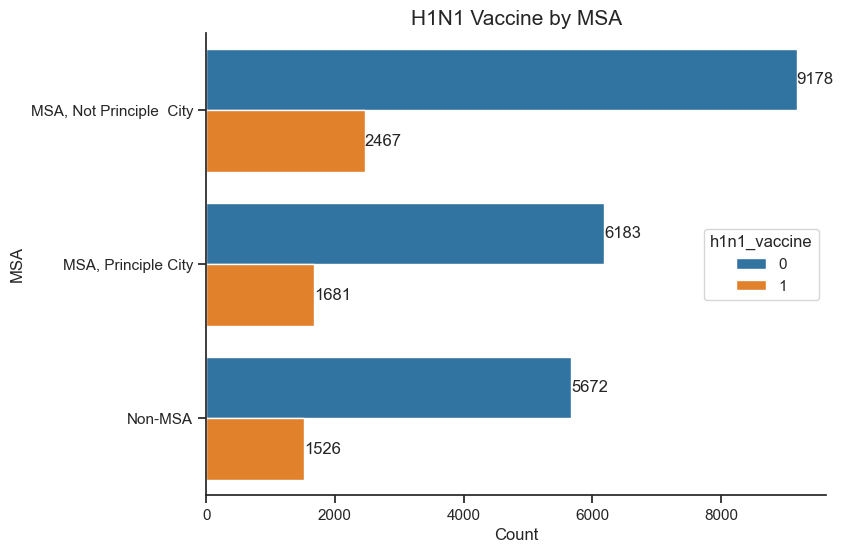

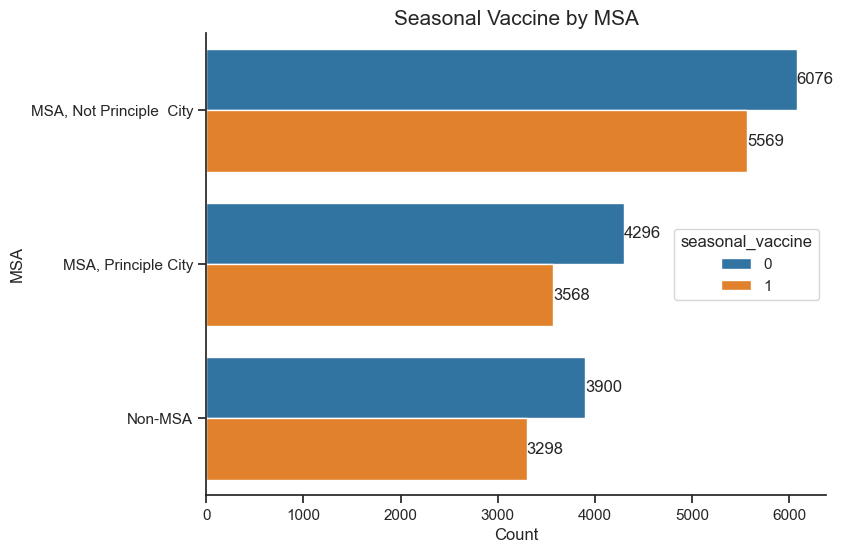

In [86]:
# Column Plot of Target Response by MSA

plt.figure()
ax1 = sns.countplot(data=df, y='census_msa', hue='h1n1_vaccine',
                   order=df['census_msa'].value_counts().index)
ax1.set_title("H1N1 Vaccine by MSA", fontsize=15)
ax1.set_ylabel('MSA')
ax1.set_xlabel('Count')
sns.move_legend(ax1, "right")
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df, y="census_msa", hue="seasonal_vaccine",
                    order=df['census_msa'].value_counts().index)
ax2.set_title("Seasonal Vaccine by MSA", fontsize=15)
ax2.set_ylabel('MSA')
ax2.set_xlabel('Count')
sns.move_legend(ax2, "right")
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `census_msa` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

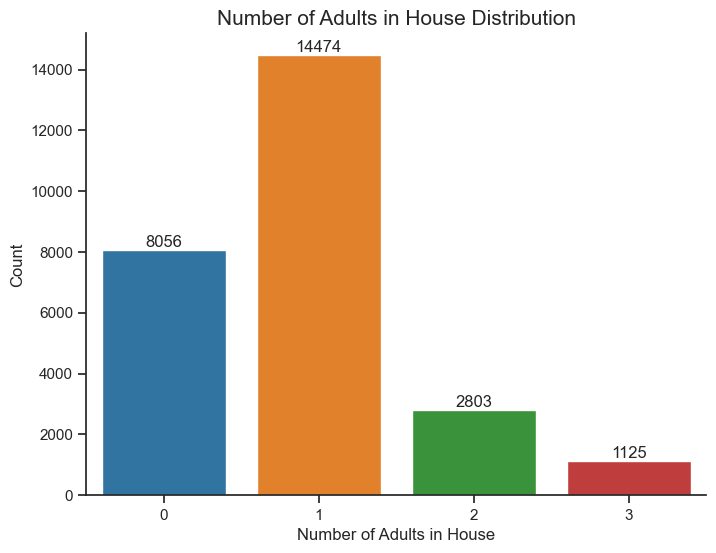

In [87]:
# number of adults in household distribution

plt.figure()

ax = sns.countplot(data=df[df['household_adults'] > -1], x="household_adults")
ax.set_title("Number of Adults in House Distribution", fontsize=15)
ax.set_xlabel('Number of Adults in House')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1,2,3])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

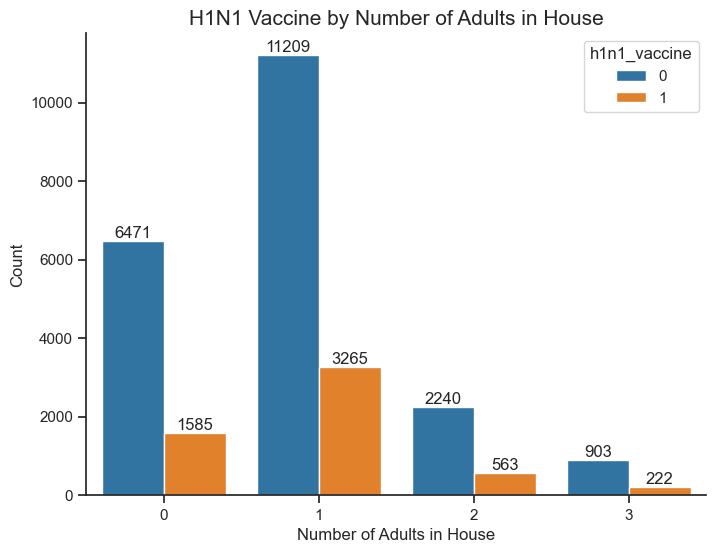

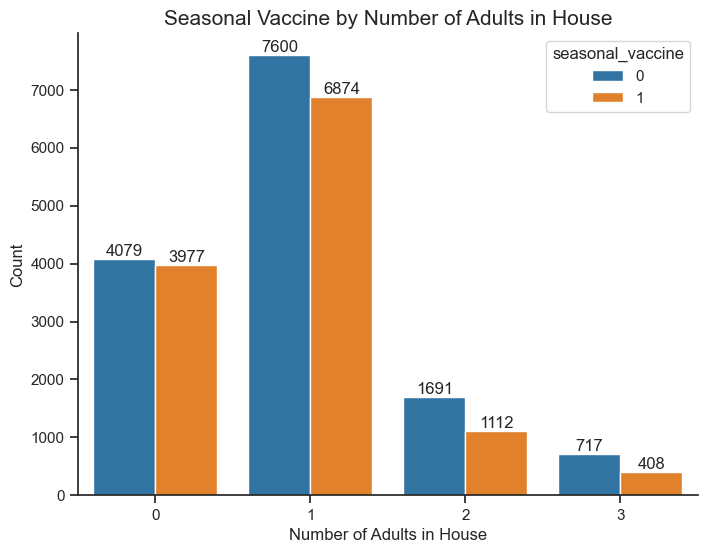

In [88]:
# Column Plot of Target Response by Number of Adults in Household

plt.figure()
ax1 = sns.countplot(data=df[df['household_adults'] > -1], x='household_adults', hue='h1n1_vaccine')
ax1.set_title("H1N1 Vaccine by Number of Adults in House", fontsize=15)
ax1.set_xlabel('Number of Adults in House')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1,2,3])
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df[df['household_adults'] > -1], x="household_adults", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Number of Adults in House", fontsize=15)
ax2.set_xlabel('Number of Adults in House')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1,2,3])
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `household_adults` tidak memengaruhi `h1n1_vaccine` dan `seasonal_vaccine`

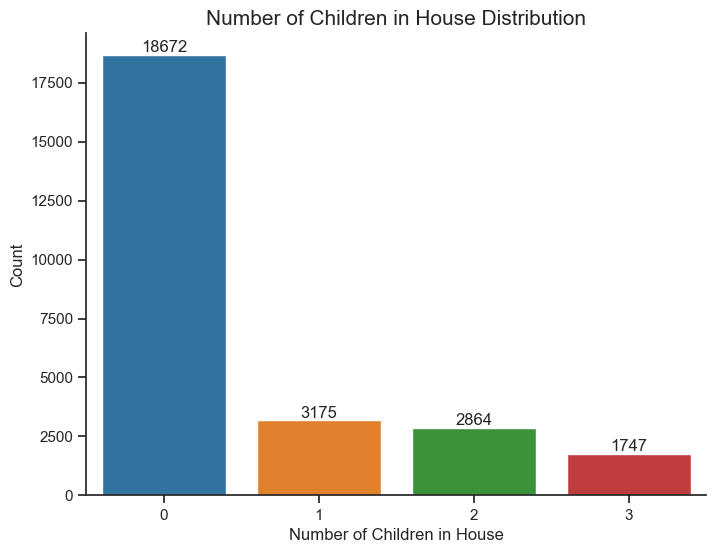

In [89]:
# number of children in household distribution

plt.figure()

ax = sns.countplot(data=df[df['household_children'] > -1], x="household_children")
ax.set_title("Number of Children in House Distribution", fontsize=15)
ax.set_xlabel('Number of Children in House')
ax.set_ylabel('Count')
ax.set_xticklabels([0,1,2,3])
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

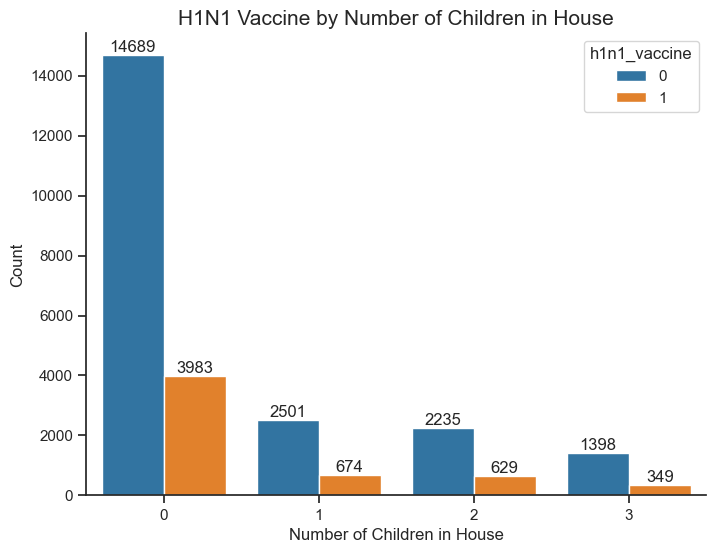

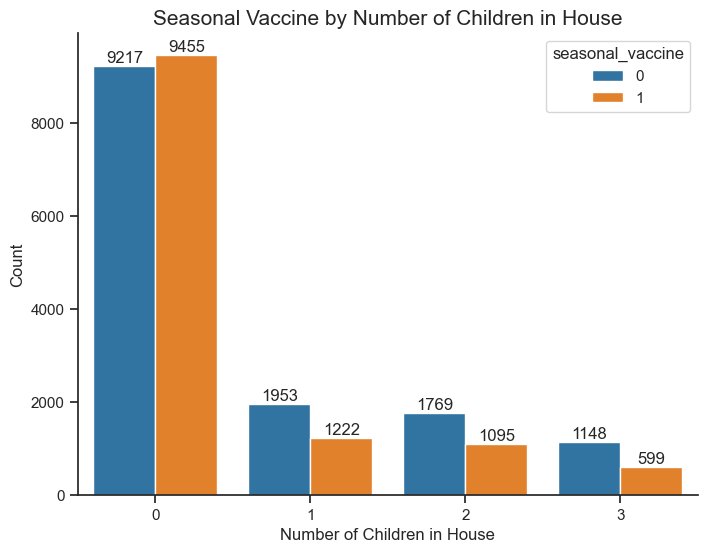

In [90]:
# Column Plot of Target Response by Number of Children in Household

plt.figure()
ax1 = sns.countplot(data=df[df['household_children'] > -1], x='household_children', hue='h1n1_vaccine')
ax1.set_title("H1N1 Vaccine by Number of Children in House", fontsize=15)
ax1.set_xlabel('Number of Children in House')
ax1.set_ylabel('Count')
ax1.set_xticklabels([0,1,2,3])
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure()
ax2 = sns.countplot(data=df[df['household_children'] > -1], x="household_children", hue="seasonal_vaccine")
ax2.set_title("Seasonal Vaccine by Number of Children in House", fontsize=15)
ax2.set_xlabel('Number of Children in House')
ax2.set_ylabel('Count')
ax2.set_xticklabels([0,1,2,3])
for container in ax2.containers:
    ax2.bar_label(container)

Dapat dilihat bahwa `household_children` memengaruhi `seasonal_vaccine` tetapi tidak memengaruhi `h1n1_vaccine` 

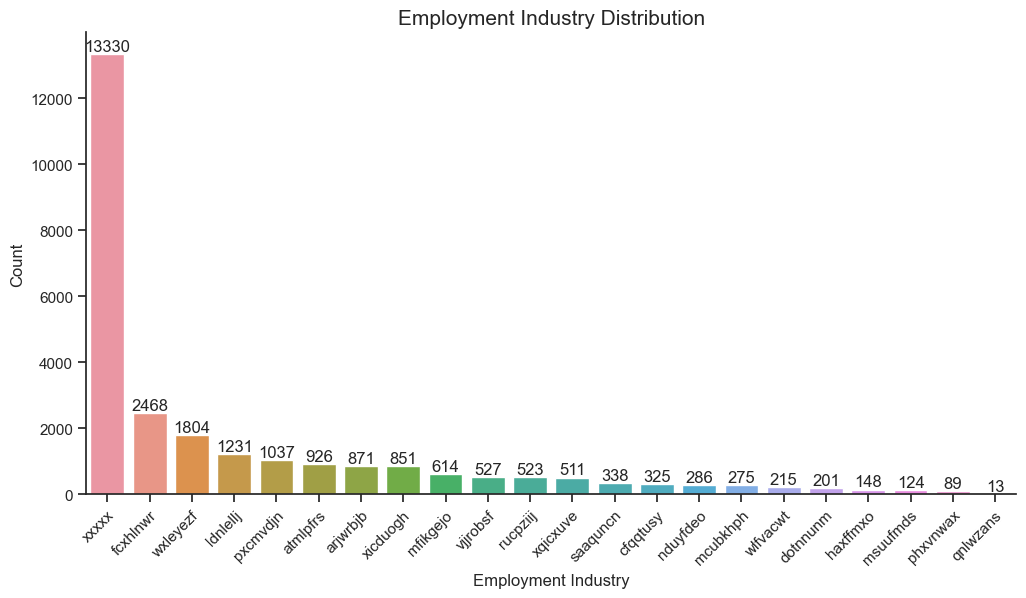

In [93]:
# employment industry distribution

plt.figure(figsize=(12,6))

ax = sns.countplot(data=df, x='employment_industry', order=df['employment_industry'].value_counts().index)
ax.set_title("Employment Industry Distribution", fontsize=15)
ax.set_xlabel('Employment Industry')
ax.set_xticklabels(df_features['employment_industry'].value_counts().index, rotation=45, ha='right', rotation_mode='anchor')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

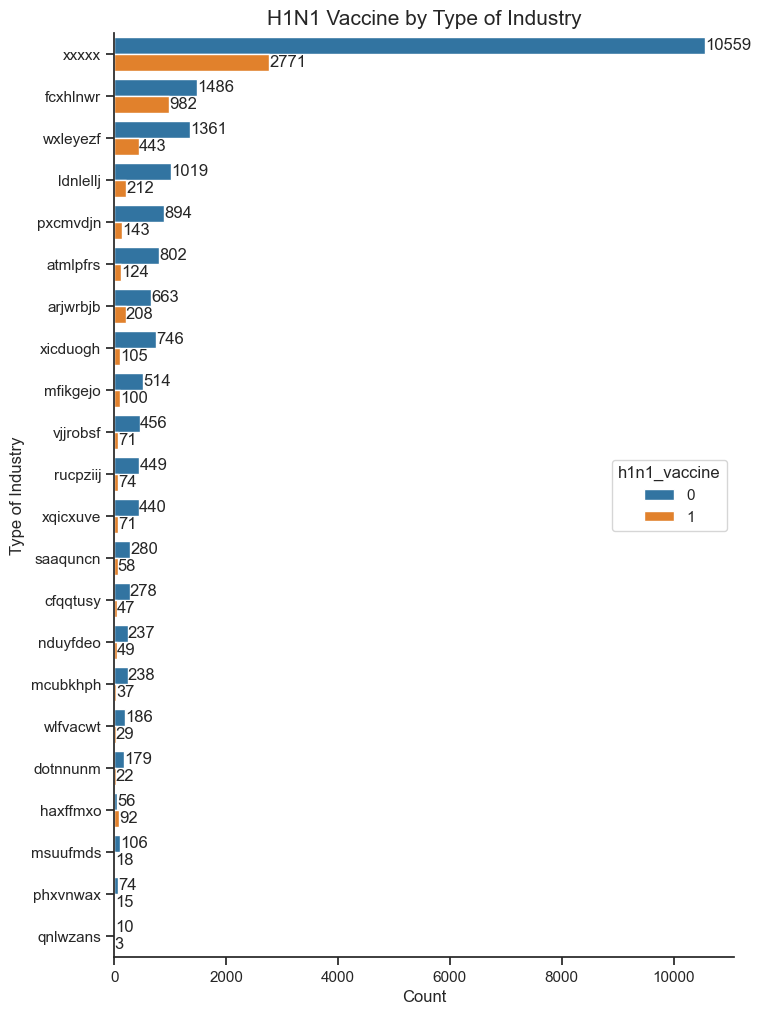

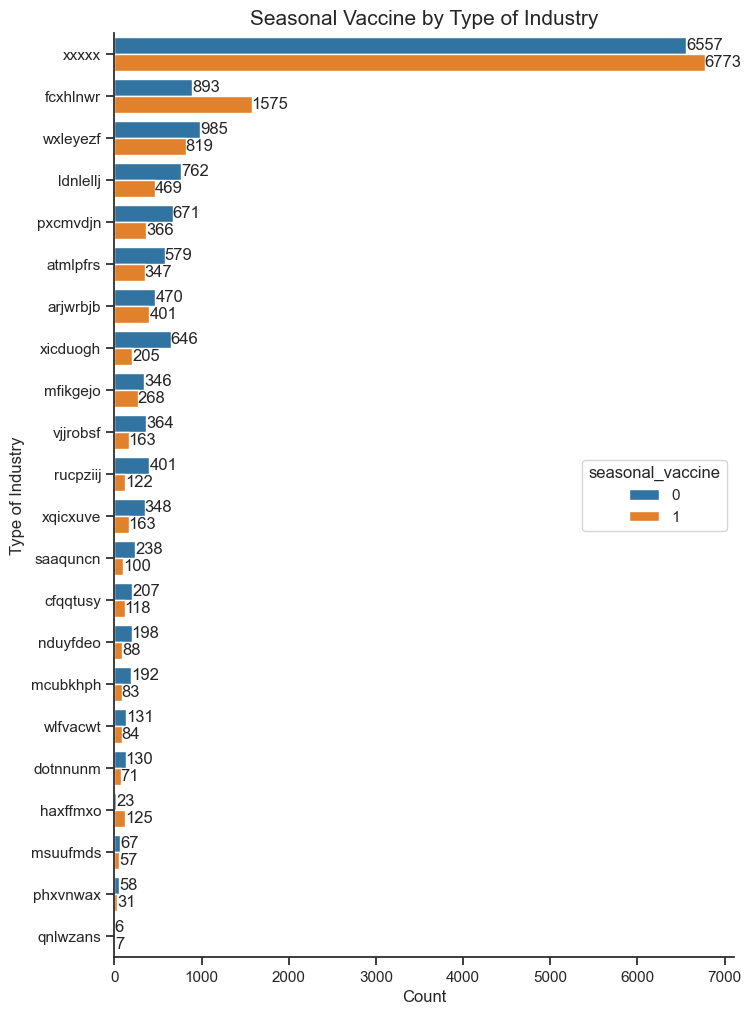

In [94]:
# Column Plot of Target Response by Employment Industry

plt.figure(figsize=(8,12))
ax1 = sns.countplot(data=df, y='employment_industry', hue='h1n1_vaccine',
                   order=df['employment_industry'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Type of Industry", fontsize=15)
ax1.set_ylabel('Type of Industry')
ax1.set_xlabel('Count')
sns.move_legend(ax1, "right")
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure(figsize=(8,12))
ax2 = sns.countplot(data=df, y="employment_industry", hue="seasonal_vaccine",
                    order=df['employment_industry'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Type of Industry", fontsize=15)
ax2.set_ylabel('Type of Industry')
ax2.set_xlabel('Count')
sns.move_legend(ax2, "right")
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `employment_industry` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine` 

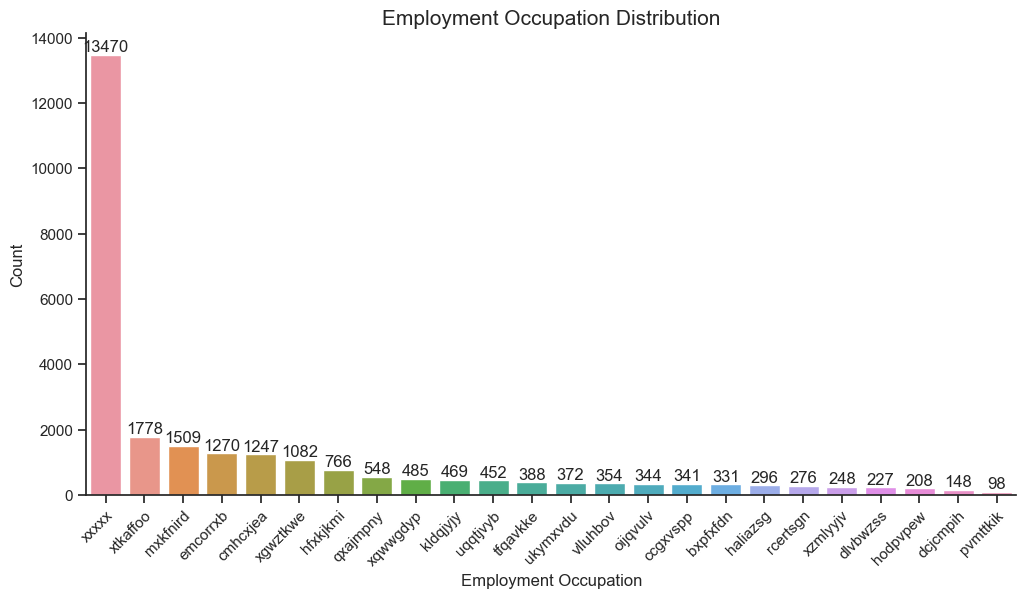

In [95]:
# employment occupation distribution

plt.figure(figsize=(12,6))

ax = sns.countplot(data=df, x='employment_occupation', order=df['employment_occupation'].value_counts().index)
ax.set_title("Employment Occupation Distribution", fontsize=15)
ax.set_xlabel('Employment Occupation')
ax.set_xticklabels(df_features['employment_occupation'].value_counts().index, rotation=45, ha='right', rotation_mode='anchor')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

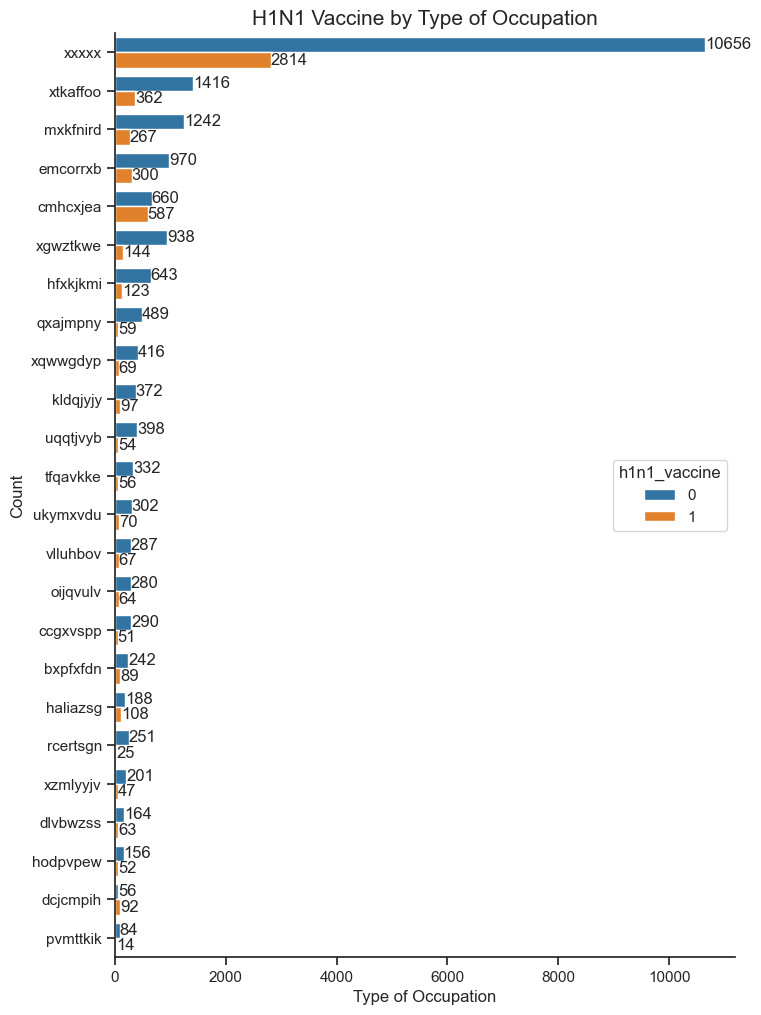

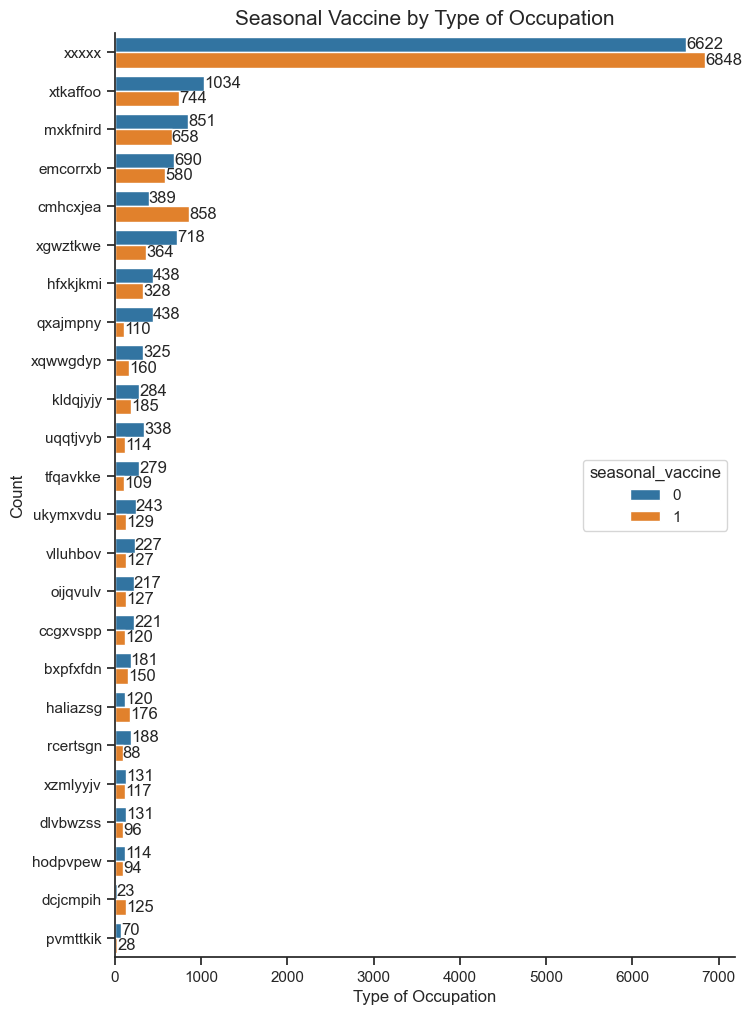

In [96]:
# Column Plot of Target Response by Employment Occupation

plt.figure(figsize=(8,12))
ax1 = sns.countplot(data=df, y='employment_occupation', hue='h1n1_vaccine',
                   order=df['employment_occupation'].value_counts().index)
ax1.set_title("H1N1 Vaccine by Type of Occupation", fontsize=15)
ax1.set_xlabel('Type of Occupation')
ax1.set_ylabel('Count')
sns.move_legend(ax1, "right")
for container in ax1.containers:
    ax1.bar_label(container)

plt.figure(figsize=(8,12))
ax2 = sns.countplot(data=df, y="employment_occupation", hue="seasonal_vaccine",
                    order=df['employment_occupation'].value_counts().index)
ax2.set_title("Seasonal Vaccine by Type of Occupation", fontsize=15)
ax2.set_xlabel('Type of Occupation')
ax2.set_ylabel('Count')
sns.move_legend(ax2, "right")
for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

Dapat dilihat bahwa `employment_occupation` tidak memengaruhi `seasonal_vaccine` dan `h1n1_vaccine` 

## Modelling

Proses modelling akan dicoba dengan menggunakan 4 buah model, yaitu Catboost, XGBoost, LGBM, dan Random Forest

### Catboost

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5) # menyiapkan data train local dengan proporsi 70 train / 30 test 

#### Feature Selection

In [74]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0] # mendefinisikan index dari kolom kategorikal dengan mengecek kolom dengan tipe data bukan float
categorical_cols = X_train.select_dtypes('object').columns # mendefinisikan kolom-kolom kategorikal

# Transformer untuk menyiapkan data ordinal (one-hot encoding)
ct = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough') 

all_cols = X_train.columns

##### h1n1 Vaccines

Sequential Feature Selection model Catboost pada target variable "h1n1_vaccine"

In [75]:
sfs1 = SFS(CatBoostClassifier(n_estimators=100, verbose=False), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [76]:
# proses fitting sequential Feature Selection model Catboost untuk mencari features optimal
sfs1 = sfs1.fit(ct.fit_transform(X_train), np.array(y_train.h1n1_vaccine).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  3.0min finished

[2023-05-02 22:05:17] Features: 1/35 -- score: 0.7057039455284032[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  3.2min finished

[2023-05-02 22:08:30] Features: 2/35 -- score: 0.7855619144955167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  3.2min finished

[2023-05-02 22:11:40] Features: 3/35 -- score: 0.8291998687211235[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [90]:
# dataframe hasil SFS
sfdf1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfdf1

feature_idx  \
1                                               (28,)   
2                                            (21, 28)   
3                                        (21, 26, 28)   
4                                    (21, 26, 27, 28)   
5                                (10, 21, 26, 27, 28)   
6                            (10, 21, 25, 26, 27, 28)   
7                        (10, 21, 22, 25, 26, 27, 28)   
8                    (10, 21, 22, 25, 26, 27, 28, 30)   
9                 (1, 10, 21, 22, 25, 26, 27, 28, 30)   
10            (1, 10, 21, 22, 25, 26, 27, 28, 30, 31)   
11        (1, 10, 13, 21, 22, 25, 26, 27, 28, 30, 31)   
12     (0, 1, 10, 13, 21, 22, 25, 26, 27, 28, 30, 31)   
13  (0, 1, 3, 10, 13, 21, 22, 25, 26, 27, 28, 30, 31)   
14  (0, 1, 3, 10, 11, 13, 21, 22, 25, 26, 27, 28, ...   
15  (0, 1, 3, 10, 11, 13, 21, 22, 25, 26, 27, 28, ...   
16  (0, 1, 3, 10, 11, 13, 21, 22, 25, 26, 27, 28, ...   
17  (0, 1, 3, 7, 10, 11, 13, 21, 22, 25, 26, 27, 2...   
18  (0, 1, 3, 7, 10, 11, 13, 14, 21, 22, 25, 26, 2...   
19  (0, 1, 3, 7, 10, 11, 12, 13, 14, 21, 22, 25, 2...   
20  (0, 1, 3, 7, 10, 11, 12, 13, 14, 20, 21, 22, 2...   
21  (0, 1, 2, 3, 7, 10, 11, 12, 13, 14, 20, 21, 22...   
22  (0, 1, 2, 3, 7, 10, 11, 12, 13, 14, 19, 20, 21...   
23  (0, 1, 2, 3, 7, 10, 11, 12, 13, 14, 18, 19, 20...   
24  (0, 1, 2, 3, 7, 8, 10, 11, 12, 13, 14, 18, 19,...   
25  (0, 1, 2, 3, 7, 8, 10, 11, 12, 13, 14, 15, 18,...   
26  (0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...   
27  (0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...   
28  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...   
29  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...   
30  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...   
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...   
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...   
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7061011369206145, 0.7118158376630549, 0.718...  0.705704   
2   [0.7817477455244676, 0.7842366891563913, 0.791...  0.785562   
3   [0.8217985333484147, 0.8251520218065574, 0.832...    0.8292   
4   [0.8435825852690462, 0.8473829905084287, 0.853...  0.849077   
5   [0.853092556031986, 0.8552019580699758, 0.8590...  0.856325   
6   [0.853809772307397, 0.857762336602776, 0.86417...  0.858863   
7   [0.8548564624871038, 0.8609549443578358, 0.864...    0.8609   
8   [0.8564329244257987, 0.8619371041076493, 0.866...  0.861915   
9   [0.8588095066717395, 0.8627212909290303, 0.868...  0.862985   
10  [0.8585747190260253, 0.8620608104348213, 0.869...   0.86344   
11  [0.8604324548505071, 0.8648822992083651, 0.870...  0.864436   
12  [0.8590974214489655, 0.8636863286958442, 0.873...  0.865011   
13  [0.8611351040092132, 0.8653075664611173, 0.872...  0.866386   
14  [0.8595515727344707, 0.8627225750777552, 0.874...  0.866164   
15  [0.8593647708849609, 0.8654999747450751, 0.874...  0.867132   
16  [0.8612053689250839, 0.8645479924902982, 0.875...  0.867408   
17  [0.8598109959452003, 0.8647817075582426, 0.873...  0.867627   
18  [0.8610974008836242, 0.8688578096360808, 0.873...  0.867908   
19  [0.8614495823521952, 0.8674619399720397, 0.876...  0.868641   
20  [0.859514083831186, 0.8654010952932524, 0.8682...  0.864367   
21  [0.8617752002550103, 0.8674557332532025, 0.868...  0.865079   
22  [0.8609080283664605, 0.8659181791798398, 0.871...  0.865053   
23  [0.8613908854407666, 0.8595847576682942, 0.867...   0.86362   
24  [0.8613716054333631, 0.8628991455274385, 0.872...  0.864112   
25  [0.8587002532964528, 0.860618069342319, 0.8709...   0.86354   
26  [0.8582199668898007, 0.8630151469622606, 0.871...  0.864595   
27  [0.8607893492097768, 0.8637321300003681, 0.871...  0.864874   
28  [0.8578146582897176, 0.8605110569485717, 0.874...  0.864521   
29  [0.8564337813150165, 0.8634556099749249, 0

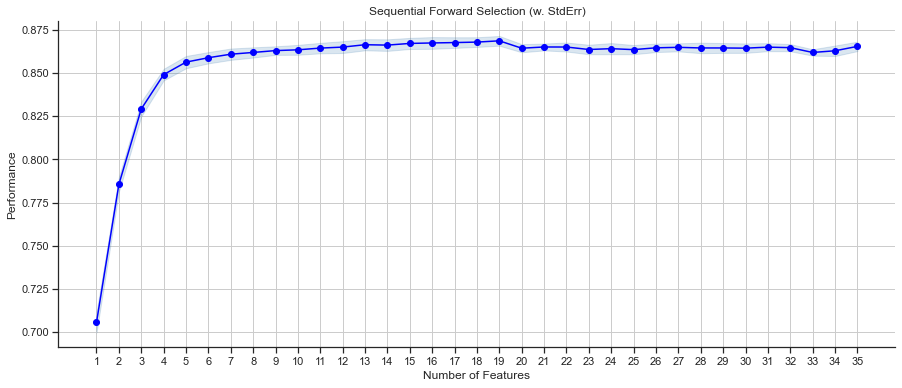

In [91]:
# plotting nilai avg_score dari proses SFS
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [92]:
# proses perhitungan feature dengan features paling optimal
sfdf1['avg_score'] = sfdf1['avg_score'].astype('float')
index = sfdf1['avg_score'].idxmax()
selected_columns_1 = [all_cols[i] for i in 
                     list(sfdf1.loc[index, 'feature_idx'])]

Features yang terpilih

In [93]:
selected_columns_1

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_outside_home',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'age_group',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children']

##### Seasonal Flu Vaccines

Proses dibawah ini sama seperti yang di atas hanya dengan target variable yang berbeda, yaitu pada "seasonal_vaccine"

In [82]:
sfs2 = SFS(CatBoostClassifier(n_estimators=100, verbose=False), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [83]:
sfs2 = sfs2.fit(ct.fit_transform(X_train), np.array(y_train.seasonal_vaccine).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished

[2023-05-02 23:11:36] Features: 1/35 -- score: 0.7183836938438439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  2.6min finished

[2023-05-02 23:14:12] Features: 2/35 -- score: 0.7779178245402318[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  2.4min finished

[2023-05-02 23:16:35] Features: 3/35 -- score: 0.8114257239983178[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [94]:
sfdf2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfdf2

feature_idx  \
1                                               (31,)   
2                                             (0, 31)   
3                                         (0, 22, 31)   
4                                     (0, 22, 30, 31)   
5                                 (0, 10, 22, 30, 31)   
6                             (0, 10, 22, 30, 31, 32)   
7                         (0, 10, 22, 26, 30, 31, 32)   
8                     (0, 10, 13, 22, 26, 30, 31, 32)   
9                 (0, 10, 13, 22, 25, 26, 30, 31, 32)   
10            (0, 10, 13, 22, 23, 25, 26, 30, 31, 32)   
11         (0, 1, 10, 13, 22, 23, 25, 26, 30, 31, 32)   
12     (0, 1, 10, 13, 20, 22, 23, 25, 26, 30, 31, 32)   
13  (0, 1, 10, 13, 20, 22, 23, 25, 26, 28, 30, 31,...   
14  (0, 1, 10, 13, 20, 22, 23, 25, 26, 27, 28, 30,...   
15  (0, 1, 10, 13, 20, 21, 22, 23, 25, 26, 27, 28,...   
16  (0, 1, 10, 13, 20, 21, 22, 23, 24, 25, 26, 27,...   
17  (0, 1, 7, 10, 13, 20, 21, 22, 23, 24, 25, 26, ...   
18  (0, 1, 5, 7, 10, 13, 20, 21, 22, 23, 24, 25, 2...   
19  (0, 1, 5, 7, 10, 13, 20, 21, 22, 23, 24, 25, 2...   
20  (0, 1, 5, 7, 10, 13, 20, 21, 22, 23, 24, 25, 2...   
21  (0, 1, 2, 5, 7, 10, 13, 20, 21, 22, 23, 24, 25...   
22  (0, 1, 2, 5, 7, 9, 10, 13, 20, 21, 22, 23, 24,...   
23  (0, 1, 2, 5, 7, 9, 10, 13, 14, 20, 21, 22, 23,...   
24  (0, 1, 2, 5, 6, 7, 9, 10, 13, 14, 20, 21, 22, ...   
25  (0, 1, 2, 5, 6, 7, 9, 10, 13, 14, 20, 21, 22, ...   
26  (0, 1, 2, 5, 6, 7, 8, 9, 10, 13, 14, 20, 21, 2...   
27  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 13, 14, 20, 21...   
28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 20,...   
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16,...   
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16,...   
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16,...   
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7266282156510848, 0.7165140310424655, 0.724...  0.718384   
2   [0.7885046409441441, 0.7809378529057273, 0.788...  0.777918   
3   [0.8249092589799938, 0.8134191377502213, 0.812...  0.811426   
4   [0.8482991742653516, 0.8318889500288369, 0.838...  0.834616   
5   [0.858806051933909, 0.8407863473473002, 0.8481...  0.844697   
6   [0.8622886306941213, 0.8474972400685636, 0.852...  0.849493   
7   [0.8636639917299906, 0.8503951680766588, 0.856...  0.852153   
8   [0.865592202431042, 0.8520423492628479, 0.8594...  0.853806   
9   [0.866819925841592, 0.8515428851327471, 0.8612...  0.855309   
10  [0.8672024022627409, 0.8530847342119835, 0.861...  0.856469   
11  [0.8692703362914579, 0.8540606390608289, 0.862...  0.857062   
12  [0.8690588086996262, 0.8535413172384337, 0.864...  0.857653   
13  [0.871515262794973, 0.8560972036915738, 0.8647...    0.8587   
14  [0.8702704157222271, 0.8545819754317179, 0.864...  0.858649   
15  [0.869862037963303, 0.8569683520187503, 0.8652...  0.859507   
16  [0.8709199637151037, 0.8573924144766606, 0.865...  0.859779   
17  [0.8701268071938951, 0.8583621317837042, 0.865...  0.860645   
18  [0.8714230252532287, 0.8569461919853203, 0.865...   0.86003   
19  [0.8705418041835842, 0.8586715088737983, 0.865...  0.860051   
20  [0.8697886508396062, 0.8540722946628279, 0.863...  0.857639   
21  [0.8697836144683722, 0.854082799094259, 0.8628...  0.857601   
22  [0.8699385908060613, 0.8551733893109208, 0.863...  0.857998   
23  [0.8678918095365272, 0.8577557526871199, 0.862...  0.857889   
24  [0.8648288324482749, 0.8593938684050877, 0.864...  0.858594   
25  [0.8673983890519075, 0.8575833648945931, 0.860...  0.858331   
26  [0.8661453398888661, 0.8534977166531788, 0.864...  0.858015   
27  [0.863473760793663, 0.8541515815356846, 0.8651...  0.857005   
28  [0.8656362347052601, 0.8530021377237444, 0.864...  0.857271   
29  [0.8649567562776209, 0.8530637253491213, 0

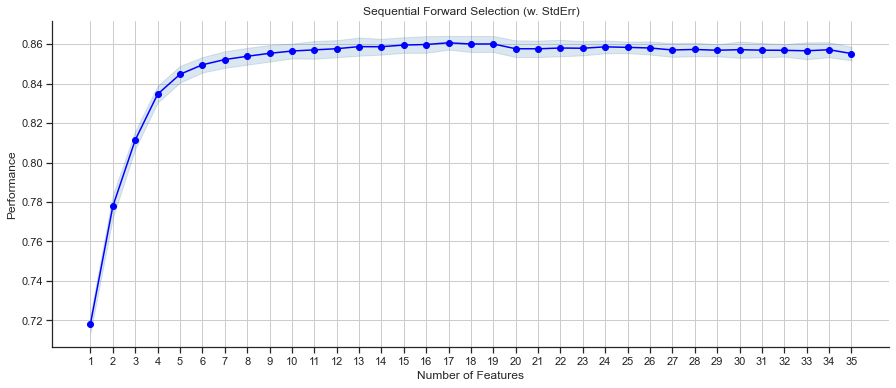

In [95]:
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [96]:
sfdf2['avg_score'] = sfdf1['avg_score'].astype('float')
index = sfdf2['avg_score'].idxmax()
selected_columns_2 = [all_cols[i] for i in 
                     list(sfdf2.loc[index, 'feature_idx'])]

Features yang terpilih

In [97]:
selected_columns_2

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_wash_hands',
 'behavioral_outside_home',
 'doctor_recc_seasonal',
 'health_worker',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_occupation']

#### Model Optimization

Persiapan data train kembali (untuk mengantisipasi problem pada data, maka dilakukan pendefinisian kembali)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

##### h1n1 Vaccines

In [ ]:
categorical_features_indices = np.where(X_train[selected_columns_1].dtypes != float)[0] # mendefinisikan kembali index dari kolom kategorikal

# menyiapkan pool untuk model Catboost dengan data train menggunakan kolom-kolom yang didapatkan dari SFS dengan target variable "h1n1_vaccine"
train_dataset = Pool(data = X_train[selected_columns_1],
                     label = y_train.h1n1_vaccine,
                     cat_features = categorical_features_indices)

In [100]:
# mendefinisikan fungsi objektif dari tuning
def objective(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
    }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

In [ ]:
# dengan menggunakan optuna akan dilakukan hyperparameter tuning pada model ini
sampler = optuna.samplers.TPESampler(seed=5) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [117]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7721669453698692
  Params: 
    iterations=200,
    learning_rate=0.1933773551934663,
    random_strength=1,
    bagging_temperature=4,
    max_bin=30,
    grow_policy=Depthwise,
    min_data_in_leaf=1,
    max_depth=2,
    l2_leaf_reg=6.172494631961106e-08,
    one_hot_max_size=1024,
    auto_class_weights=SqrtBalanced,


##### Seasonal Flu Vaccines

Proses yang dilakukan sama seperti yang diatas hanya saja dengan target variable "seasonal_vaccine" dan kolom yang didapatkan dari SFS pada "seasonal_vaccine"

In [103]:
categorical_features_indices = np.where(X_train[selected_columns_2].dtypes != float)[0]

train_dataset_se = Pool(data = X_train[selected_columns_2],
                     label = y_train.seasonal_vaccine,
                     cat_features = categorical_features_indices)

In [104]:
def objective2(trial):
    param = {
        'iterations' : trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'learning_rate' : trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength' : trial.suggest_int("random_strength", 1,10),
        'bagging_temperature' : trial.suggest_int("bagging_temperature", 0,10),
        'max_bin' : trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy' : trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf' : trial.suggest_int("min_data_in_leaf", 1,10),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg" : trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function" : "Logloss",
        'auto_class_weights' : trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset_se,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False) 

    return scores['test-AUC-mean'].max()

In [ ]:
study2 = optuna.create_study(direction="maximize", sampler=sampler)
study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [118]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial2.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7921368195574383
  Params: 
    iterations=1000,
    learning_rate=0.0495571281798243,
    random_strength=3,
    bagging_temperature=8,
    max_bin=8,
    grow_policy=Depthwise,
    min_data_in_leaf=3,
    max_depth=5,
    l2_leaf_reg=58.386263935379176,
    one_hot_max_size=1024,
    auto_class_weights=Balanced,


#### Model Optimization (using all features)

Proses yang dilakukan sama persis dengan yang sebelumnya, hanya saja kali ini kolom yang digunakan adalah semua kolom pada data_train

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

##### h1n1 Vaccines

In [13]:
categorical_features_indices = np.where(X_train.dtypes != float)[0]

train_dataset = Pool(data = X_train,
                     label = y_train.h1n1_vaccine,
                     cat_features = categorical_features_indices)

In [14]:
def objective(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1, 10),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2, 16),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        'use_best_model': True,
    }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

In [ ]:
sampler = optuna.samplers.TPESampler(seed=10) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [16]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8718629554409547
  Params: 
    iterations=1500,
    learning_rate=0.04404109103819451,
    random_strength=5,
    bagging_temperature=6,
    max_bin=10,
    grow_policy=Lossguide,
    min_data_in_leaf=6,
    max_depth=9,
    l2_leaf_reg=93.67348525776094,
    one_hot_max_size=500,
    auto_class_weights=SqrtBalanced,


##### Seasonal Flu Vaccines

In [17]:
categorical_features_indices = np.where(X_train.dtypes != float)[0]

train_dataset_se = Pool(data = X_train,
                     label = y_train.seasonal_vaccine,
                     cat_features = categorical_features_indices)

In [18]:
def objective2(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1, 10),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2, 16),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        'use_best_model': True,
    }

    scores = cv(train_dataset_se,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False) 

    return scores['test-AUC-mean'].max()

In [ ]:
sampler = optuna.samplers.TPESampler(seed=10) 

study2 = optuna.create_study(direction="maximize", sampler=sampler)
study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [20]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial2.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8644092153920738
  Params: 
    iterations=500,
    learning_rate=0.03145645445811421,
    random_strength=2,
    bagging_temperature=9,
    max_bin=20,
    grow_policy=Lossguide,
    min_data_in_leaf=10,
    max_depth=12,
    l2_leaf_reg=19.387817968510728,
    one_hot_max_size=10,
    auto_class_weights=SqrtBalanced,


#### Final Model

Pengecekan hasil model pada data test

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5) # pendefinisian kembali data train yang digunakan

In [120]:
categorical_features_indices_h1n1 = np.where(X_train[selected_columns_1].dtypes == object)[0]
categorical_features_indices_flu = np.where(X_train[selected_columns_2].dtypes == object)[0]

model_h1n1 = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_h1n1, 
                                    **trial.params)
model_flu = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_flu, 
                                    **trial2.params)

In [121]:
model_h1n1.fit(X_train[selected_columns_1], y_train.h1n1_vaccine)
model_flu.fit(X_train[selected_columns_2], y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(X_test[selected_columns_1])
pred_flu = model_flu.predict_proba(X_test[selected_columns_2])

In [122]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

Hasil Score ROC dan AUC

In [123]:
roc_auc_score(y_test, np.hstack((pred_h1n1, pred_flu)))

0.7741938070892513

#### Final Model (using all features)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [ ]:
categorical_features_indices_h1n1 = np.where(X_train.dtypes == object)[0]
categorical_features_indices_flu = np.where(X_train.dtypes == object)[0]

model_h1n1 = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_h1n1, 
                                **trial.params)
model_flu = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_flu, 
                                **trial2.params)

In [24]:
model_h1n1.fit(X_train, y_train.h1n1_vaccine)
model_flu.fit(X_train, y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(X_test)
pred_flu = model_flu.predict_proba(X_test)

In [25]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

Hasil Score ROC dan AUC

In [26]:
roc_auc_score(y_test, np.hstack((pred_h1n1, pred_flu)))

0.8618124425359406

Dengan menggunakan kedua proses ini, didapatkan bahwa dengan menggunakan semua feature dari data train, hasil score ROC dan AUC yang didapatkan lebih baik dibandingkan hasil SFS.

#### For Submission

Setup untuk submisi kaggle

In [ ]:
categorical_features_indices_h1n1 = np.where(df_features[selected_columns_1].dtypes == object)[0]
categorical_features_indices_flu = np.where(df_features[selected_columns_2].dtypes == object)[0]

f_model_h1n1 = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_h1n1, 
                                    **trial.params)
f_model_flu = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_flu, 
                                    **trial2.params)

f_model_h1n1.fit(df_features[selected_columns_1], df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(df_test_features[selected_columns_1])
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(df_features[selected_columns_2], df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(df_test_features[selected_columns_2])
predictions_flu = predictions_flu[:,1].reshape(-1,1)

#### For Submission (using all features)

setup untuk submisi kaggle

In [29]:
categorical_features_indices_h1n1 = np.where(df_features.dtypes == object)[0]
categorical_features_indices_flu = np.where(df_features.dtypes == object)[0]

f_model_h1n1 = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_h1n1, **trial.params)
f_model_flu = CatBoostClassifier(verbose=False, cat_features=categorical_features_indices_flu, 
                                    **trial2.params)

f_model_h1n1.fit(df_features, df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(df_test_features)
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(df_features, df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(df_test_features)
predictions_flu = predictions_flu[:,1].reshape(-1,1)

### XGBoost

Proses yang sama dilakukan seperti model catboost sebelumnya, yaitu akan dilakukan feature selection dengan SFS dan kemudian dilakukan tuning dengan menggunakan optuna

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

#### Feature Selection

In [13]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_cols = X_train.select_dtypes('object').columns

ct = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

all_cols = X_train.columns

##### h1n1 Vaccines

In [15]:
sfs1 = SFS(xgb.XGBClassifier(n_estimators=100), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [ ]:
sfs1 = sfs1.fit(ct.fit_transform(X_train), np.array(y_train.h1n1_vaccine).ravel())

In [ ]:
sfdf1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfdf1

feature_idx  \
1                                               (28,)   
2                                            (21, 28)   
3                                        (21, 26, 28)   
4                                    (21, 26, 27, 28)   
5                                (21, 25, 26, 27, 28)   
6                            (21, 24, 25, 26, 27, 28)   
7                        (21, 22, 24, 25, 26, 27, 28)   
8                    (14, 21, 22, 24, 25, 26, 27, 28)   
9                (14, 20, 21, 22, 24, 25, 26, 27, 28)   
10           (14, 19, 20, 21, 22, 24, 25, 26, 27, 28)   
11       (14, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30)   
12    (5, 14, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30)   
13  (5, 14, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28...   
14  (5, 11, 14, 18, 19, 20, 21, 22, 24, 25, 26, 27...   
15  (5, 11, 13, 14, 18, 19, 20, 21, 22, 24, 25, 26...   
16  (5, 8, 11, 13, 14, 18, 19, 20, 21, 22, 24, 25,...   
17  (2, 5, 8, 11, 13, 14, 18, 19, 20, 21, 22, 24, ...   
18  (0, 2, 5, 8, 11, 13, 14, 18, 19, 20, 21, 22, 2...   
19  (0, 2, 5, 8, 11, 13, 14, 17, 18, 19, 20, 21, 2...   
20  (0, 2, 3, 5, 8, 11, 13, 14, 17, 18, 19, 20, 21...   
21  (0, 2, 3, 5, 8, 11, 13, 14, 17, 18, 19, 20, 21...   
22  (0, 2, 3, 5, 8, 11, 13, 14, 16, 17, 18, 19, 20...   
23  (0, 2, 3, 5, 8, 11, 13, 14, 15, 16, 17, 18, 19...   
24  (0, 2, 3, 5, 8, 11, 13, 14, 15, 16, 17, 18, 19...   
25  (0, 2, 3, 4, 5, 8, 11, 13, 14, 15, 16, 17, 18,...   
26  (0, 2, 3, 4, 5, 7, 8, 11, 13, 14, 15, 16, 17, ...   
27  (0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 1...   
28  (0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 1...   
29  (0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 1...   
30  (0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 1...   
31  (0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 1...   
32  (0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
33  (0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
34  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7061011369206145, 0.7118158376630549, 0.718...  0.705704   
2   [0.7817477455244676, 0.7842366891563913, 0.791...  0.785562   
3   [0.8218430915877473, 0.8251777047810569, 0.832...   0.82903   
4   [0.8408482517746176, 0.8444863790344743, 0.852...  0.846899   
5   [0.845980375523131, 0.8502183908931598, 0.8579...  0.852063   
6   [0.8473128382570189, 0.8494416949393411, 0.859...  0.852836   
7   [0.8468432629655909, 0.8514655133298918, 0.858...   0.85333   
8   [0.8465210726196475, 0.8543482131926591, 0.856...   0.85331   
9   [0.8457479443227662, 0.8547000699433006, 0.854...  0.853083   
10  [0.8452438792403163, 0.857472118990933, 0.8546...  0.853516   
11  [0.8461682484841628, 0.8572762863103753, 0.852...  0.852864   
12  [0.8484096564559747, 0.8557280309976381, 0.853...  0.853147   
13  [0.8494169297316567, 0.857017958391869, 0.8527...  0.853167   
14  [0.8521962499100266, 0.8547169779015127, 0.854...  0.853699   
15  [0.851730316397775, 0.8534176334166318, 0.8573...  0.854606   
16  [0.8514344753952829, 0.8546482759447269, 0.860...  0.854693   
17  [0.851583788341508, 0.855855589770985, 0.85849...   0.85436   
18  [0.8509798956651689, 0.856082242020942, 0.8538...  0.853953   
19  [0.8553669542386882, 0.8524808469217671, 0.859...   0.85484   
20  [0.8543823885272817, 0.8570132498465443, 0.862...   0.85644   
21  [0.8544766463412543, 0.8542615331537237, 0.861...  0.856835   
22  [0.8517472399598291, 0.8546489180190893, 0.860...  0.855161   
23  [0.8561120194136821, 0.8521167907582384, 0.860...  0.855254   
24  [0.8536908789284086, 0.8525467665563156, 0.862...  0.855521   
25  [0.8544269467666142, 0.8546245191933148, 0.863...  0.857278   
26  [0.8548198304730371, 0.8581178317748048, 0.862...  0.857682   
27  [0.8530807738052395, 0.8551638616578019, 0.862...  0.855925   
28  [0.8537885642992532, 0.8551056469156032, 0.860...  0.856581   
29  [0.8506566342077033, 0.8553423583305725, 0

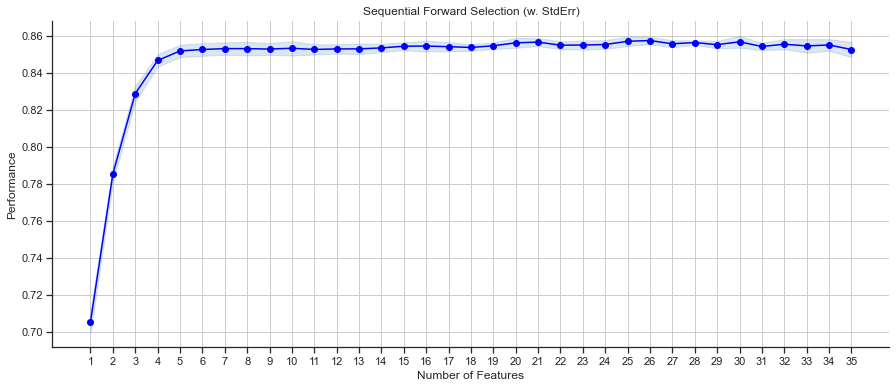

In [ ]:
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
sfdf1['avg_score'] = sfdf1['avg_score'].astype('float')
index = sfdf1['avg_score'].idxmax()
selected_columns_1 = [all_cols[i] for i in 
                     list(sfdf1.loc[index, 'feature_idx'])]

Features yang terpilih

In [11]:
selected_columns_1 = ['h1n1_concern',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'census_msa',
 'household_adults',
 'employment_industry']

##### Seasonal Flu Vaccines

In [408]:
sfs2 = SFS(xgb.XGBClassifier(n_estimators=100), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [ ]:
sfs2 = sfs2.fit(ct.fit_transform(X_train), np.array(y_train.seasonal_vaccine).ravel())

In [450]:
sfdf2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfdf2

feature_idx  \
1                                               (31,)   
2                                             (0, 31)   
3                                         (0, 22, 31)   
4                                     (0, 22, 30, 31)   
5                                 (0, 22, 25, 30, 31)   
6                             (0, 22, 25, 26, 30, 31)   
7                         (0, 22, 25, 26, 30, 31, 32)   
8                     (0, 13, 22, 25, 26, 30, 31, 32)   
9                 (0, 10, 13, 22, 25, 26, 30, 31, 32)   
10            (0, 10, 13, 22, 23, 25, 26, 30, 31, 32)   
11        (0, 10, 13, 16, 22, 23, 25, 26, 30, 31, 32)   
12     (0, 6, 10, 13, 16, 22, 23, 25, 26, 30, 31, 32)   
13  (0, 6, 10, 13, 14, 16, 22, 23, 25, 26, 30, 31,...   
14  (0, 6, 10, 13, 14, 16, 21, 22, 23, 25, 26, 30,...   
15  (0, 2, 6, 10, 13, 14, 16, 21, 22, 23, 25, 26, ...   
16  (0, 2, 6, 10, 13, 14, 16, 20, 21, 22, 23, 25, ...   
17  (0, 2, 6, 10, 13, 14, 16, 20, 21, 22, 23, 25, ...   
18  (0, 2, 6, 10, 13, 14, 16, 20, 21, 22, 23, 25, ...   
19  (0, 2, 6, 10, 13, 14, 16, 20, 21, 22, 23, 25, ...   
20  (0, 2, 4, 6, 10, 13, 14, 16, 20, 21, 22, 23, 2...   
21  (0, 2, 4, 6, 10, 13, 14, 16, 17, 20, 21, 22, 2...   
22  (0, 2, 4, 6, 10, 13, 14, 16, 17, 19, 20, 21, 2...   
23  (0, 2, 4, 6, 10, 13, 14, 16, 17, 18, 19, 20, 2...   
24  (0, 1, 2, 4, 6, 10, 13, 14, 16, 17, 18, 19, 20...   
25  (0, 1, 2, 4, 6, 7, 10, 13, 14, 16, 17, 18, 19,...   
26  (0, 1, 2, 3, 4, 6, 7, 10, 13, 14, 16, 17, 18, ...   
27  (0, 1, 2, 3, 4, 6, 7, 10, 13, 14, 16, 17, 18, ...   
28  (0, 1, 2, 3, 4, 6, 7, 10, 13, 14, 16, 17, 18, ...   
29  (0, 1, 2, 3, 4, 6, 7, 8, 10, 13, 14, 16, 17, 1...   
30  (0, 1, 2, 3, 4, 6, 7, 8, 10, 13, 14, 15, 16, 1...   
31  (0, 1, 2, 3, 4, 6, 7, 8, 10, 13, 14, 15, 16, 1...   
32  (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 15, 16...   
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...   
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7266282156510848, 0.7165140310424655, 0.724...  0.718384   
2   [0.7885046409441441, 0.7809179952134329, 0.788...  0.777892   
3   [0.8250652425919296, 0.8133020061449484, 0.812...  0.811267   
4   [0.8463885189154591, 0.8283160043790528, 0.835...  0.831558   
5   [0.8476592673259805, 0.833663191666446, 0.8421...  0.835758   
6   [0.8506990771065558, 0.8370095006106961, 0.845...   0.83813   
7   [0.8487937459205392, 0.8406939659092348, 0.849...   0.84027   
8   [0.8518749978415552, 0.8405610057086549, 0.852...  0.841761   
9   [0.8553423235917443, 0.8417733322128607, 0.851...  0.844526   
10  [0.8557252317018561, 0.8431679753557405, 0.850...  0.846023   
11  [0.85898793688362, 0.8439730752715899, 0.85208...  0.847107   
12  [0.8571329694099445, 0.8439192580475458, 0.853...  0.847951   
13  [0.8567025755139114, 0.8439920695859584, 0.854...  0.847837   
14  [0.856925183122458, 0.8423769772793465, 0.8535...  0.848056   
15  [0.8572049175704315, 0.8471534717577569, 0.853...  0.849035   
16  [0.8569234563666063, 0.8469518730120722, 0.851...  0.848986   
17  [0.8589008796094308, 0.8490198070407895, 0.855...  0.850676   
18  [0.8574076674866838, 0.8519142815371812, 0.852...  0.850347   
19  [0.8582293154794453, 0.8467849532797427, 0.854...  0.850688   
20  [0.8600008230869558, 0.8459399940829833, 0.856...   0.85112   
21  [0.8626913964965275, 0.8477243084630607, 0.855...  0.851171   
22  [0.8613697087883816, 0.8476655987641033, 0.856...  0.850809   
23  [0.8588110883051431, 0.8461100795343744, 0.855...  0.850588   
24  [0.8617359249252603, 0.843984155288305, 0.8546...    0.8501   
25  [0.8621553827008994, 0.8469642480956762, 0.858...   0.85079   
26  [0.8618717630522597, 0.8464997507715721, 0.855...  0.850461   
27  [0.8623756879683107, 0.8471494426607695, 0.856...  0.850109   
28  [0.8603761046920562, 0.8490409597999726, 0.857...  0.850676   
29  [0.8617002386376587, 0.8466229260223259, 0

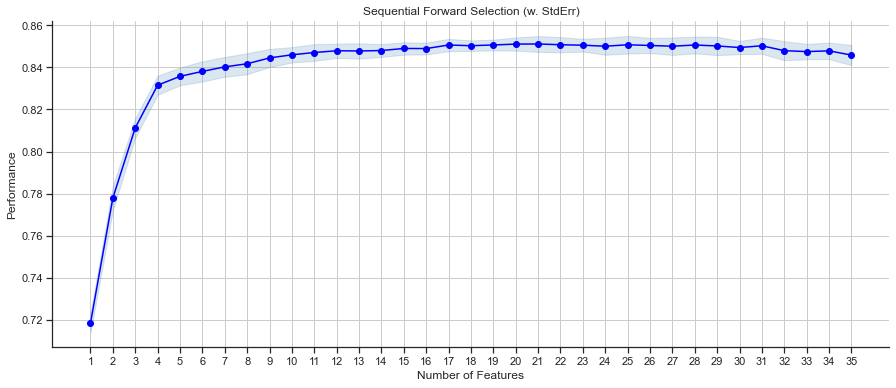

In [451]:
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [488]:
sfdf2['avg_score'] = sfdf2['avg_score'].astype('float')
index = sfdf2['avg_score'].idxmax()

selected_columns_2 = [all_cols[i] for i in 
                     list(sfdf2.loc[index, 'feature_idx'])]

Features yang terpilih

In [12]:
selected_columns_2 = ['h1n1_concern',
 'behavioral_antiviral_meds',
 'behavioral_face_mask',
 'behavioral_large_gatherings',
 'doctor_recc_seasonal',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'income_poverty',
 'marital_status',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_occupation']

#### Model Optimization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [60]:
categorical_features_indices = np.where(X_train[selected_columns_1].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_1].select_dtypes('object').columns
col = []
ct = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

##### h1n1 Vaccines

In [ ]:
categorical_features_indices = np.where(X_train[selected_columns_1].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_1].select_dtypes('object').columns
ct1 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [47]:
def objective(trial):
    # persiapan data train dan test dengan menggunakan fungsi DMatrix, proses ini agar kolom-kolom kategorikal ataupun ordinal dapat disipakan dengan baik untuk model XGBoost
    dtrain = xgb.DMatrix(ct.fit_transform(X_train[selected_columns_1]), label=y_train.h1n1_vaccine)
    dtest = xgb.DMatrix(ct.fit_transform(X_test[selected_columns_1]), label=y_test.h1n1_vaccine)
    
    param = {
        "silent": 1,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    # berbeda dengan catboost, pada model XGBoost kami menggunakan pruning callback untuk melakukan "early stopping" apabila dirasa model sudah baik
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)

    return roc_auc_score(y_test.h1n1_vaccine, pred_labels)    

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [54]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.6975230836888867
  Params: 
    booster=dart,
    lambda=6.227375966727043e-06,
    alpha=0.0013009943951840916,
    max_depth=4,
    eta=0.48963301939403747,
    gamma=0.00677056244687695,
    grow_policy=depthwise,
    sample_type=weighted,
    normalize_type=forest,
    rate_drop=8.829340538393375e-07,
    skip_drop=8.518372994885679e-06,


##### Seasonal Flu Vaccines

In [ ]:
categorical_features_indices = np.where(X_train[selected_columns_2].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_2].select_dtypes('object').columns
ct2 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [51]:
def objective2(trial):
    dtrain = xgb.DMatrix(ct.fit_transform(X_train[selected_columns_2]), label=y_train.seasonal_vaccine, enable_categorical=True)
    dtest = xgb.DMatrix(ct.fit_transform(X_test[selected_columns_2]), label=y_test.seasonal_vaccine, enable_categorical=True)

    param = {
        "silent": 1,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)

    return roc_auc_score(y_test.seasonal_vaccine, pred_labels)    

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study2 = optuna.create_study(direction="maximize", sampler=sampler)

study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [55]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.6975230836888867
  Params: 
    booster=gblinear,
    lambda=5.5733661662182675e-05,
    alpha=5.073550463632246e-06,


#### Model Optimization (using all features)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [85]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_cols = X_train.select_dtypes('object').columns
col = []
ct = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

##### h1n1 Vaccines

In [ ]:
categorical_features_indices = np.where(X_train[selected_columns_1].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_1].select_dtypes('object').columns
ct1 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [86]:
def objective(trial):
    dtrain = xgb.DMatrix(ct.fit_transform(X_train), label=y_train.h1n1_vaccine)
    dtest = xgb.DMatrix(ct.fit_transform(X_test), label=y_test.h1n1_vaccine)
    
    param = {
        "silent": 1,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc") 
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)

    return roc_auc_score(y_test.h1n1_vaccine, pred_labels)    

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [88]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.724975150059512
  Params: 
    booster=gbtree,
    lambda=9.36255580795658e-06,
    alpha=0.09403763787416182,
    max_depth=7,
    eta=0.4662410961117156,
    gamma=0.0012504901430155663,
    grow_policy=lossguide,


##### Seasonal Flu Vaccines

In [ ]:
categorical_features_indices = np.where(X_train[selected_columns_2].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_2].select_dtypes('object').columns
ct2 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [89]:
def objective2(trial):
    dtrain = xgb.DMatrix(ct.fit_transform(X_train), label=y_train.seasonal_vaccine, enable_categorical=True)
    dtest = xgb.DMatrix(ct.fit_transform(X_test), label=y_test.seasonal_vaccine, enable_categorical=True)

    param = {
        "silent": 1,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)

    return roc_auc_score(y_test.seasonal_vaccine, pred_labels)    

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study2 = optuna.create_study(direction="maximize", sampler=sampler)

study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [91]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.724975150059512
  Params: 
    booster=gbtree,
    lambda=5.685163028734862e-06,
    alpha=8.827987756978924e-07,
    max_depth=3,
    eta=0.28108914782976546,
    gamma=0.017569860694916273,
    grow_policy=lossguide,


#### Final Model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [57]:
model_h1n1 = xgb.XGBClassifier(**trial.params)
model_flu = xgb.XGBClassifier(**trial2.params)

In [62]:
model_h1n1.fit(ct1.fit_transform(X_train[selected_columns_1]), y_train.h1n1_vaccine)
model_flu.fit(ct2.fit_transform(X_train[selected_columns_2]), y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(ct1.fit_transform(X_test[selected_columns_1]))
pred_flu = model_flu.predict_proba(ct2.fit_transform(X_test[selected_columns_2]))

In [63]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

Hasil Score ROC dan AUC

In [64]:
roc_auc_score(y_test, np.hstack((pred_h1n1, pred_flu)))

0.77046914366326

#### Final Model (using all features)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [93]:
model_h1n1 = xgb.XGBClassifier(**trial.params)
model_flu = xgb.XGBClassifier(**trial2.params)

In [94]:
model_h1n1.fit(ct.fit_transform(X_train), y_train.h1n1_vaccine)
model_flu.fit(ct.fit_transform(X_train), y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(ct.fit_transform(X_test))
pred_flu = model_flu.predict_proba(ct.fit_transform(X_test))

In [95]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

In [96]:
roc_auc_score(y_test, np.hstack((pred_h1n1, pred_flu)))

0.8137108654033496

Dengan menggunakan kedua proses ini, didapatkan bahwa dengan menggunakan semua feature dari data train, hasil score ROC dan AUC yang didapatkan lebih baik dibandingkan hasil SFS.

#### For Submission

Setup untuk submisi kaggle

In [ ]:
f_model_h1n1 = xgb.XGBClassifier(**trial.params)
f_model_flu = xgb.XGBClassifier(**trial2.params)

f_model_h1n1.fit(ct1.fit_transform(df_features[selected_columns_1]), df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(ct1.fit_transform(df_test_features[selected_columns_1]))
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(ct2.fit_transform(df_features[selected_columns_2]), df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(ct2.fit_transform(df_test_features[selected_columns_2]))
predictions_flu = predictions_flu[:,1].reshape(-1,1)

#### For Submission (using all features)

Setup untuk submisi kaggle

In [ ]:
f_model_h1n1 = xgb.XGBClassifier(**trial.params)
f_model_flu = xgb.XGBClassifier(**trial2.params)

f_model_h1n1.fit(ct.fit_transform(df_features), df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(ct.fit_transform(df_test_features))
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(ct.fit_transform(df_features), df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(ct.fit_transform(df_test_features))
predictions_flu = predictions_flu[:,1].reshape(-1,1)

### LGBM

Proses yang sama juga dilakukan pada model LGBM

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

#### Feature Selection

In [127]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_cols = X_train.select_dtypes('object').columns

ct = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

all_cols = X_train.columns

##### h1n1 Vaccines

In [128]:
sfs1 = SFS(LGBMClassifier(n_estimators=100), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [ ]:
sfs1 = sfs1.fit(ct.fit_transform(X_train), np.array(y_train.h1n1_vaccine).ravel())

In [ ]:
sfdf1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfdf1

feature_idx  \
1                                               (28,)   
2                                            (21, 28)   
3                                        (21, 26, 28)   
4                                    (21, 26, 27, 28)   
5                                (21, 25, 26, 27, 28)   
6                            (21, 22, 25, 26, 27, 28)   
7                        (10, 21, 22, 25, 26, 27, 28)   
8                     (1, 10, 21, 22, 25, 26, 27, 28)   
9                  (0, 1, 10, 21, 22, 25, 26, 27, 28)   
10             (0, 1, 10, 14, 21, 22, 25, 26, 27, 28)   
11         (0, 1, 10, 14, 15, 21, 22, 25, 26, 27, 28)   
12     (0, 1, 10, 14, 15, 21, 22, 25, 26, 27, 28, 30)   
13  (0, 1, 10, 14, 15, 21, 22, 25, 26, 27, 28, 30,...   
14  (0, 1, 2, 10, 14, 15, 21, 22, 25, 26, 27, 28, ...   
15  (0, 1, 2, 10, 13, 14, 15, 21, 22, 25, 26, 27, ...   
16  (0, 1, 2, 3, 10, 13, 14, 15, 21, 22, 25, 26, 2...   
17  (0, 1, 2, 3, 10, 13, 14, 15, 21, 22, 25, 26, 2...   
18  (0, 1, 2, 3, 7, 10, 13, 14, 15, 21, 22, 25, 26...   
19  (0, 1, 2, 3, 7, 10, 12, 13, 14, 15, 21, 22, 25...   
20  (0, 1, 2, 3, 7, 8, 10, 12, 13, 14, 15, 21, 22,...   
21  (0, 1, 2, 3, 7, 8, 10, 12, 13, 14, 15, 21, 22,...   
22  (0, 1, 2, 3, 4, 7, 8, 10, 12, 13, 14, 15, 21, ...   
23  (0, 1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 2...   
24  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15...   
25  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
26  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7113835010038536, 0.7050972322778137, 0.717...  0.705494   
2   [0.7847583745616897, 0.7815650310982399, 0.790...  0.785555   
3   [0.8246112722680583, 0.8247723202377777, 0.828...  0.829201   
4   [0.8434496857364199, 0.8449978195243599, 0.849...  0.847803   
5   [0.8509566666094155, 0.851631334493431, 0.8564...  0.854292   
6   [0.8515010797867003, 0.8554435680202551, 0.858...  0.856444   
7   [0.8556864397050542, 0.8555794772785971, 0.860...  0.858274   
8   [0.8583990139545143, 0.857396893139758, 0.8607...  0.859807   
9   [0.8590720162135239, 0.857490886458611, 0.8629...  0.861466   
10  [0.8604634449941558, 0.8591133296921507, 0.862...   0.86258   
11  [0.8610808533795199, 0.8616312498147654, 0.861...  0.863231   
12  [0.8610229995923117, 0.8595995969295516, 0.865...  0.863064   
13  [0.8615091069996754, 0.861940115247664, 0.8661...  0.863982   
14  [0.860764239489368, 0.8616992044439363, 0.8654...  0.864034   
15  [0.8619818809170187, 0.8632774030746823, 0.867...  0.864739   
16  [0.8624108125112431, 0.8652402545440689, 0.869...  0.866075   
17  [0.8639821304114761, 0.8648528496487953, 0.868...  0.866742   
18  [0.8630069777091166, 0.8625824029264947, 0.867...  0.866859   
19  [0.8638494734853382, 0.8659898724315902, 0.871...  0.867485   
20  [0.8629326265528996, 0.8630204033244844, 0.873...   0.86729   
21  [0.8648784121304928, 0.8641961665968069, 0.872...  0.867906   
22  [0.866365887237545, 0.8634835956255001, 0.8725...  0.868926   
23  [0.866936063429446, 0.8654125756286333, 0.8713...  0.868641   
24  [0.8645760356957867, 0.8657320258947357, 0.874...  0.868222   
25  [0.863691957510009, 0.8636904232663102, 0.8733...  0.867604   
26  [0.8643093658953733, 0.8624371790149331, 0.873...  0.867347   
27  [0.8646564886186233, 0.8635428706914436, 0.871...  0.867458   
28  [0.8654705094839532, 0.8643026500188409, 0.870...  0.868075   
29  [0.8622040304202445, 0.8636131539839194, 0

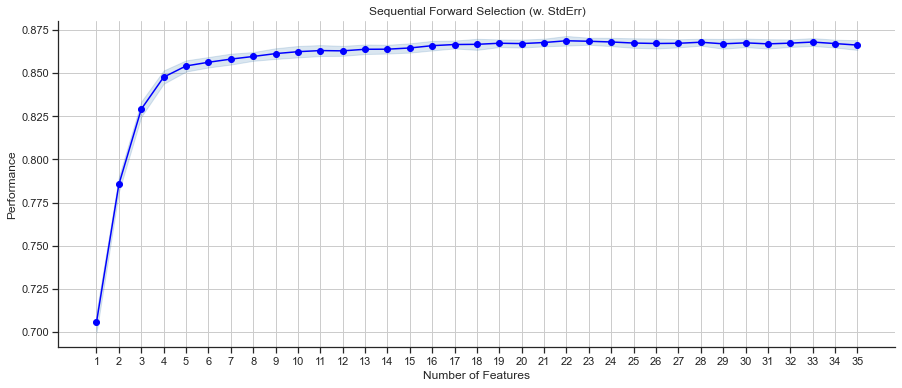

In [82]:
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [83]:
sfdf1['avg_score'] = sfdf1['avg_score'].astype('float')
index = sfdf1['avg_score'].idxmax()
selected_columns_1 = [all_cols[i] for i in 
                     list(sfdf1.loc[index, 'feature_idx'])]

Features yang terpilih

In [15]:
selected_columns_1 = ['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_seasonal',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'age_group',
 'education',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults']

##### Seasonal Flu Vaccines

In [85]:
sfs2 = SFS(LGBMClassifier(n_estimators=100), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [ ]:
sfs2 = sfs2.fit(ct.fit_transform(X_train), np.array(y_train.seasonal_vaccine).ravel())

In [87]:
sfdf2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfdf2

feature_idx  \
1                                               (31,)   
2                                             (0, 31)   
3                                         (0, 22, 31)   
4                                     (0, 22, 30, 31)   
5                                 (0, 10, 22, 30, 31)   
6                             (0, 10, 22, 30, 31, 32)   
7                         (0, 10, 22, 25, 30, 31, 32)   
8                     (0, 10, 22, 25, 26, 30, 31, 32)   
9                 (0, 10, 13, 22, 25, 26, 30, 31, 32)   
10            (0, 10, 13, 22, 25, 26, 27, 30, 31, 32)   
11        (0, 10, 13, 22, 25, 26, 27, 28, 30, 31, 32)   
12    (0, 10, 13, 21, 22, 25, 26, 27, 28, 30, 31, 32)   
13  (0, 4, 10, 13, 21, 22, 25, 26, 27, 28, 30, 31,...   
14  (0, 4, 10, 13, 14, 21, 22, 25, 26, 27, 28, 30,...   
15  (0, 4, 10, 13, 14, 21, 22, 25, 26, 27, 28, 29,...   
16  (0, 4, 10, 13, 14, 20, 21, 22, 25, 26, 27, 28,...   
17  (0, 2, 4, 10, 13, 14, 20, 21, 22, 25, 26, 27, ...   
18  (0, 2, 4, 10, 13, 14, 20, 21, 22, 23, 25, 26, ...   
19  (0, 2, 4, 6, 10, 13, 14, 20, 21, 22, 23, 25, 2...   
20  (0, 2, 4, 6, 10, 13, 14, 20, 21, 22, 23, 25, 2...   
21  (0, 2, 4, 6, 10, 12, 13, 14, 20, 21, 22, 23, 2...   
22  (0, 2, 4, 6, 10, 12, 13, 14, 19, 20, 21, 22, 2...   
23  (0, 2, 4, 6, 10, 12, 13, 14, 18, 19, 20, 21, 2...   
24  (0, 2, 4, 6, 10, 12, 13, 14, 16, 18, 19, 20, 2...   
25  (0, 2, 4, 6, 10, 12, 13, 14, 16, 18, 19, 20, 2...   
26  (0, 2, 4, 6, 7, 10, 12, 13, 14, 16, 18, 19, 20...   
27  (0, 1, 2, 4, 6, 7, 10, 12, 13, 14, 16, 18, 19,...   
28  (0, 1, 2, 4, 6, 7, 10, 12, 13, 14, 16, 17, 18,...   
29  (0, 1, 2, 4, 6, 7, 10, 12, 13, 14, 16, 17, 18,...   
30  (0, 1, 2, 4, 6, 7, 9, 10, 12, 13, 14, 16, 17, ...   
31  (0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13, 14, 16, 1...   
32  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16...   
33  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...   
34  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7268855078661294, 0.7157342536619893, 0.723...  0.718349   
2   [0.790595212744163, 0.7781306375644856, 0.7882...  0.777959   
3   [0.8255655989783063, 0.8127822198948663, 0.812...  0.811565   
4   [0.8481963390079346, 0.8297169960610777, 0.836...  0.833677   
5   [0.8573933999650278, 0.8399443832234712, 0.843...  0.842552   
6   [0.8603367422491458, 0.8453788874918359, 0.848...  0.847457   
7   [0.8608189073348533, 0.8472423228420086, 0.852...  0.849648   
8   [0.862515430148389, 0.8496718523868028, 0.8555...  0.851649   
9   [0.8652052822902006, 0.8500247441426875, 0.858...  0.853378   
10  [0.8654362656241973, 0.8518712038600863, 0.859...  0.854666   
11  [0.8673023108721156, 0.8529770656323998, 0.861...  0.855875   
12  [0.8683129531298603, 0.8541286752964262, 0.862...  0.856692   
13  [0.8698359138254708, 0.8552172737133765, 0.862...  0.857465   
14  [0.8708149599869346, 0.8565449696021084, 0.862...  0.857667   
15  [0.8698011436921207, 0.8555995131733787, 0.863...  0.857689   
16  [0.8702727767457348, 0.8572639883529896, 0.863...  0.858186   
17  [0.8716067379613102, 0.8575058191893704, 0.864...  0.858763   
18  [0.8714203354206955, 0.8600940277422121, 0.862...  0.859166   
19  [0.8729884540073374, 0.8577898013850966, 0.864...  0.859368   
20  [0.8702874927357833, 0.8603066547357698, 0.864...  0.860135   
21  [0.871273608343447, 0.8585347151690227, 0.8636...  0.859872   
22  [0.8703309193338677, 0.8600527395506349, 0.863...  0.860036   
23  [0.8701611083506607, 0.8595689340165786, 0.863...  0.860017   
24  [0.8707806226768213, 0.8600477044053205, 0.863...  0.860125   
25  [0.8716087578030816, 0.858861855753157, 0.8627...  0.859842   
26  [0.8720718786663735, 0.8579355328766217, 0.862...  0.859727   
27  [0.8718266121655647, 0.8572426968813748, 0.865...  0.860046   
28  [0.8710406051676786, 0.8592771833109387, 0.865...  0.860475   
29  [0.87195703623423, 0.8588188412260435, 0.8

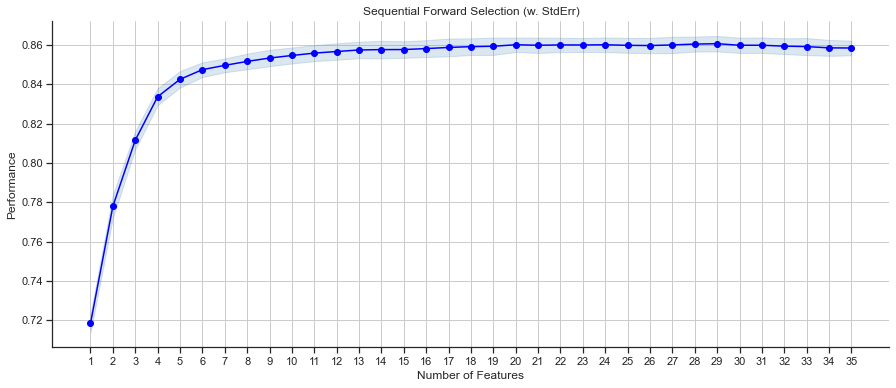

In [88]:
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [89]:
sfdf2['avg_score'] = sfdf2['avg_score'].astype('float')
index = sfdf2['avg_score'].idxmax()
selected_columns_2 = [all_cols[i] for i in 
                     list(sfdf2.loc[index, 'feature_idx'])]

Features yang terpilih

In [16]:
selected_columns_2 = ['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_face_mask',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'doctor_recc_seasonal',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation']

#### Model Optimization

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

##### h1n1 Vaccines

In [45]:
categorical_features_indices = np.where(X_train[selected_columns_1].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_1].select_dtypes('object').columns
ct1 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [51]:
def objective(trial):
    param = {
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    model = lgb.LGBMClassifier(**param)  
    model.fit(ct1.fit_transform(X_train[selected_columns_1]), y_train.h1n1_vaccine)
    
    preds = model.predict(ct1.fit_transform(X_test[selected_columns_1]))
    
    return roc_auc_score(y_test.h1n1_vaccine, preds)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [100]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7912389839968053
  Params: 
    reg_alpha=0.01936878421476343,
    reg_lambda=1.4998893098207997,
    colsample_bytree=0.7,
    subsample=0.7,
    learning_rate=0.006,
    max_depth=100,
    num_leaves=7,
    min_child_samples=171,
    min_data_per_groups=20,


##### Seasonal Flu Vaccines

In [101]:
categorical_features_indices = np.where(X_train[selected_columns_2].dtypes != np.float)[0]
categorical_cols = X_train[selected_columns_2].select_dtypes('object').columns
col = []
ct2 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [102]:
def objective2(trial):
    param = {
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    model = LGBMClassifier(**param)  
    
    model.fit(ct2.fit_transform(X_train[selected_columns_2]), y_train.seasonal_vaccine, eval_set=[(ct2.fit_transform(X_test[selected_columns_2]), y_test.seasonal_vaccine)], early_stopping_rounds=100, verbose=False)
    
    preds = model.predict(ct2.fit_transform(X_test[selected_columns_2]))
    
    return roc_auc_score(y_test.seasonal_vaccine, preds)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study2 = optuna.create_study(direction="maximize", sampler=sampler)

study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [104]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7912389839968053
  Params: 
    reg_alpha=0.08383858523911697,
    reg_lambda=0.012326453465371623,
    colsample_bytree=1.0,
    subsample=0.8,
    learning_rate=0.017,
    max_depth=20,
    num_leaves=868,
    min_child_samples=253,
    min_data_per_groups=93,


#### Model Optimization (using all features)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

##### h1n1 Vaccines

In [60]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_cols = X_train.select_dtypes('object').columns
ct1 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [71]:
def objective(trial):
    param = {
        "metric": 'auc',
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    model = lgb.LGBMClassifier(**param)  
    model.fit(ct1.fit_transform(X_train), y_train.h1n1_vaccine)
    
    preds = model.predict(ct1.fit_transform(X_test))
    
    return roc_auc_score(y_test.h1n1_vaccine, preds)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [73]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7443320898007015
  Params: 
    lambda_l1=0.00011245837595618146,
    lambda_l2=0.07441878376171743,
    num_leaves=31,
    feature_fraction=0.9743616454898388,
    bagging_fraction=0.4902389581804133,
    bagging_freq=3,
    min_child_samples=18,


##### Seasonal Flu Vaccines

In [64]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_cols = X_train.select_dtypes('object').columns
col = []
ct2 = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

In [68]:
def objective2(trial):
    param = {
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    model = lgb.LGBMClassifier(**param)  
    model.fit(ct1.fit_transform(X_train), y_train.seasonal_vaccine)
    
    preds = model.predict(ct1.fit_transform(X_test))
    
    return roc_auc_score(y_test.seasonal_vaccine, preds)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study2 = optuna.create_study(direction="maximize", sampler=sampler)

study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [70]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7443320898007015
  Params: 
    lambda_l1=0.00020474362632378208,
    lambda_l2=1.8442097517533176e-06,
    num_leaves=17,
    feature_fraction=0.5253233106677825,
    bagging_fraction=0.9118567900538517,
    bagging_freq=3,
    min_child_samples=29,


#### Final Model

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [116]:
model_h1n1 = lgb.LGBMClassifier(**trial.params)
model_flu = lgb.LGBMClassifier(**trial2.params)

In [117]:
model_h1n1.fit(ct1.fit_transform(X_train[selected_columns_1]), y_train.h1n1_vaccine)
model_flu.fit(ct2.fit_transform(X_train[selected_columns_2]), y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(ct1.fit_transform(X_test[selected_columns_1]))
pred_flu = model_flu.predict_proba(ct2.fit_transform(X_test[selected_columns_2]))

[LightGBM] [Warning] Unknown parameter: min_data_per_groups


In [118]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

In [119]:
roc_auc_score(y_test, np.hstack((pred_h1n1, pred_flu)))

0.8052582172879232

#### Final Model (using all features)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [75]:
model_h1n1 = lgb.LGBMClassifier(**trial.params)
model_flu = lgb.LGBMClassifier(**trial2.params)

In [76]:
model_h1n1.fit(ct.fit_transform(X_train), y_train.h1n1_vaccine)
model_flu.fit(ct.fit_transform(X_train), y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(ct.fit_transform(X_test))
pred_flu = model_flu.predict_proba(ct.fit_transform(X_test))

[LightGBM] [Warning] feature_fraction is set=0.9743616454898388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9743616454898388
[LightGBM] [Warning] lambda_l1 is set=0.00011245837595618146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011245837595618146
[LightGBM] [Warning] bagging_fraction is set=0.4902389581804133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4902389581804133
[LightGBM] [Warning] lambda_l2 is set=0.07441878376171743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07441878376171743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [77]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

In [78]:
roc_auc_score(y_test, np.hstack((pred_h1n1, pred_flu)))

0.834950661119624

Dengan menggunakan kedua proses ini, didapatkan bahwa dengan menggunakan semua feature dari data train, hasil score ROC dan AUC yang didapatkan lebih baik dibandingkan hasil SFS.

#### For Submission

Setup untuk submisi kaggle

In [120]:
f_model_h1n1 = LGBMClassifier(**trial.params)
f_model_flu = LGBMClassifier(**trial2.params)

f_model_h1n1.fit(ct1.fit_transform(df_features[selected_columns_1]), df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(ct1.fit_transform(df_test_features[selected_columns_1]))
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(ct2.fit_transform(df_features[selected_columns_2]), df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(ct2.fit_transform(df_test_features[selected_columns_2]))
predictions_flu = predictions_flu[:,1].reshape(-1,1)

[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Unknown parameter: min_data_per_groups


#### For Submission (using all features)

Setup untuk submisi kaggle

In [79]:
f_model_h1n1 = LGBMClassifier(**trial.params)
f_model_flu = LGBMClassifier(**trial2.params)

f_model_h1n1.fit(ct1.fit_transform(df_features), df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(ct1.fit_transform(df_test_features))
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(ct2.fit_transform(df_features), df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(ct2.fit_transform(df_test_features))
predictions_flu = predictions_flu[:,1].reshape(-1,1)

[LightGBM] [Warning] feature_fraction is set=0.9743616454898388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9743616454898388
[LightGBM] [Warning] lambda_l1 is set=0.00011245837595618146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011245837595618146
[LightGBM] [Warning] bagging_fraction is set=0.4902389581804133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4902389581804133
[LightGBM] [Warning] lambda_l2 is set=0.07441878376171743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07441878376171743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5253233106677825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5253233106677825
[LightGBM] [Warning] lambda_l1 is set=0.00020474362632378208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020474362632378208
[LightGBM] [Warning

### Random Forest

Proses yang sama juga dilakukan pada model Random Forest, akan tetapi proses feature selection dengan SFS tidak dilakukan mengingat hasil-hasil sebelumnya menunjukkan hasil yang lebih baik didapat dengan menggunakan semua feature. dan dengan menggunakan setiap feature juga hasilnya tidak sebaik model-model sebelumnya.

#### Model Optimization (using all features)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [113]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_cols = X_train.select_dtypes('object').columns
ct = ColumnTransformer(
    [('ordinal', oe(), categorical_cols)],
    remainder='passthrough')

##### h1n1 Vaccines

In [120]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 60),
    }

    model = RandomForestClassifier(random_state=5, **params)
    model.fit(ct.fit_transform(X_train), y_train.h1n1_vaccine)
    preds = model.predict(ct.fit_transform(X_test))
    
    return roc_auc_score(y_test.h1n1_vaccine, preds)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study = optuna.create_study(direction="maximize", sampler=sampler)

study.optimize(objective, n_trials=100)

Hasil Tuning

In [122]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.6995849471033381
  Params: 
    n_estimators=592,
    max_depth=43,
    min_samples_split=5,
    min_samples_leaf=2,


##### Seasonal Flu Vaccines

In [123]:
def objective2(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 60),
    }

    model = RandomForestClassifier(random_state=5, **params)
    model.fit(ct.fit_transform(X_train), y_train.seasonal_vaccine)
    preds = model.predict(ct.fit_transform(X_test))
    
    return roc_auc_score(y_test.seasonal_vaccine, preds)

In [ ]:
sampler = optuna.samplers.TPESampler(seed=5) 

study2 = optuna.create_study(direction="maximize", sampler=sampler)

study2.optimize(objective2, n_trials=100)

Hasil Tuning

In [125]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.6995849471033381
  Params: 
    n_estimators=779,
    max_depth=28,
    min_samples_split=8,
    min_samples_leaf=6,


#### Final Model (using all features)

Setup untuk submisi kaggle

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=5)

In [127]:
model_h1n1 = RandomForestClassifier(**trial.params)
model_flu = RandomForestClassifier(**trial2.params)

In [128]:
model_h1n1.fit(ct.fit_transform(X_train), y_train.h1n1_vaccine)
model_flu.fit(ct.fit_transform(X_train), y_train.seasonal_vaccine)

pred_h1n1 = model_h1n1.predict_proba(ct.fit_transform(X_test))
pred_flu = model_flu.predict_proba(ct.fit_transform(X_test))

In [129]:
pred_h1n1 = pred_h1n1[:,1].reshape(-1,1)
pred_flu = pred_flu[:,1].reshape(-1,1)

#### For Submission (using all features)

In [137]:
f_model_h1n1 = RandomForestClassifier(**trial.params)
f_model_flu = RandomForestClassifier(**trial2.params)

f_model_h1n1.fit(ct.fit_transform(df_features), df_labels.h1n1_vaccine)
predictions_h1n1 = f_model_h1n1.predict_proba(ct.fit_transform(df_test_features))
predictions_h1n1 = predictions_h1n1[:,1].reshape(-1,1)

f_model_flu.fit(ct.fit_transform(df_features), df_labels.seasonal_vaccine)
predictions_flu = f_model_flu.predict_proba(ct.fit_transform(df_test_features))
predictions_flu = predictions_flu[:,1].reshape(-1,1)

## Submission

Setup untuk file submisi kaggle, dengan mengisi submission_format.csv dengan data hasil prediksi

In [30]:
submission_df = pd.read_csv("data/submission_format.csv", 
                            index_col="respondent_id")

submission_df["h1n1_vaccine"] = predictions_h1n1
submission_df["seasonal_vaccine"] = predictions_flu

submission_df.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.145591          0.224974
26708              0.089250          0.038247
26709              0.231404          0.722902
26710              0.771038          0.868308
26711              0.432562          0.542503

In [31]:
submission_df

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.145591          0.224974
26708              0.089250          0.038247
26709              0.231404          0.722902
26710              0.771038          0.868308
26711              0.432562          0.542503
...                     ...               ...
53410              0.450357          0.495293
53411              0.160916          0.293674
53412              0.229371          0.214848
53413              0.037017          0.292815
53414              0.733543          0.632816

[26708 rows x 2 columns]

In [32]:
name = "Catboost_optuna_all_features_re_tuning"
date = pd.Timestamp.now().strftime(format='%Y-%m-%d_%H-%M_')
submission_df.to_csv(f'predictions/{date}submssion_{name}.csv', index=True)

## Kesimpulan Model

Dari proses yang telah dilakukan dan dari hasil submisi Kaggle 30% data, didapatkan bahwa model terbaik yang kami dapatkan setelah mencoba dengan 4 buah model adalah Catboost, dengan nilai ROC dan AUC pada 30% data submisi sebesar 0.99057 dengan peringkat 26 / 93 (10 Mei 2023) 